- The dataset contains all the necessary **information** about the **customers** like the **Gender, Tenure, InternetService, streamingTV, TotalCharges** etc.


- Also included in the dataset is the column **Churn** which classifies whether the customers will **Churn or not**

| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| CustomerID         | Customer Identity                                        |   
| Tenure             | Number of months the customer has stayed with the company                                          |
| PhoneService       | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines      | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No        |
|OnlineSecurity        | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No |
|OnlineBackup        | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No |
|DeviceProtection    | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No |
| Contract           | The contract term of the customer (Month-to-month, One year, Two year)                                       |
| Streaming TV       |Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service|
| Streaming Movies    |Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service|
| PaperlessBilling   | Whether the customer has paperless billing or not (Yes, No)                                       |
| PaymentMethod      | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))                                       |
| MonthlyCharges     | The amount charged to the customer monthly                                       |
| TotalCharges       | The total amount charged to the customer                                       |
| Churn              | Whether the customer churned or not (Yes or No)                                       |


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("max_columns",None)
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Personal Project\Churn Prediction\Telco-Customer-Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
#check info data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


the type of every column have match and there is nothing miss value for each column

In [5]:
#check unique column and count the unique number for each column
for col in df.columns:
    print("unique value {} and number of unique is {}".format(col,df[col].nunique()))
    print("{}".format(df[col].unique()))
    print("=="*100)

unique value customerID and number of unique is 7032
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique value gender and number of unique is 2
['Female' 'Male']
unique value SeniorCitizen and number of unique is 2
[0 1]
unique value Partner and number of unique is 2
['Yes' 'No']
unique value Dependents and number of unique is 2
['No' 'Yes']
unique value tenure and number of unique is 72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique value PhoneService and number of unique is 2
['No' 'Yes']
unique value MultipleLines and number of unique is 3
['No phone service' 'No' 'Yes']
unique value InternetService and number of unique is 3
['DSL' 'Fiber optic' 'No']
unique value OnlineSecurity and number of unique is 3
['No' 'Yes' 'No internet service']
unique value OnlineBackup an

1.customer ID have much unique value, so customer ID can't give more information and it will drop for analysis. <br>
2.few columns have not consistent data

In [6]:
#drop customer ID
df = df.drop("customerID",axis=1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [7]:
#Handling inconsistent Data
df["MultipleLines"] = df["MultipleLines"].replace("No phone service","No")
df["OnlineSecurity"] = df["OnlineSecurity"].replace("No internet service","No")
df["OnlineBackup"] = df["OnlineBackup"].replace("No internet service","No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service","No")
df["TechSupport"] = df["TechSupport"].replace("No internet service","No")
df["StreamingTV"] = df["StreamingTV"].replace("No internet service","No")
df["StreamingMovies"] =df["StreamingMovies"].replace("No internet service","No")

In [8]:
#statistics summary
df.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

Based on statistics : <br>
1.16% is senior citizen.<br>
2.the average tenure is 32 month. <br>
3.the average of monthly charge is around 64. <br>
4.the average total charges is around 2283

In [9]:
df.describe(include="object").T

count unique               top  freq
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      2                No  4065
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      2                No  5017
OnlineBackup      7032      2                No  4607
DeviceProtection  7032      2                No  4614
TechSupport       7032      2                No  4992
StreamingTV       7032      2                No  4329
StreamingMovies   7032      2                No  4301
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

# Eksplonatory Data   Analysis

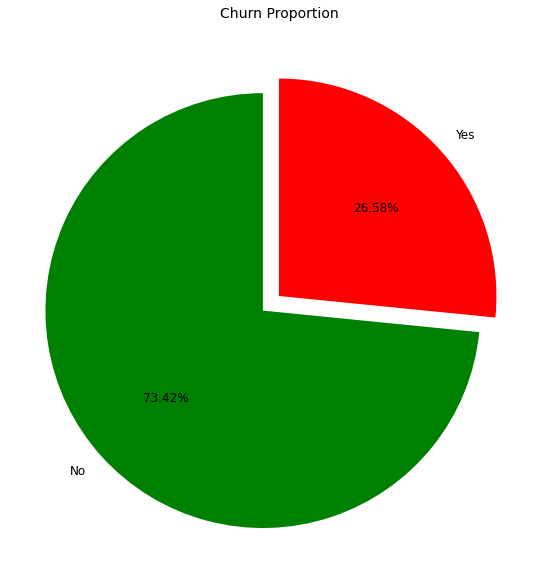

In [10]:
plt.figure(figsize=(15,10))
plt.pie(df["Churn"].value_counts(),labels=df["Churn"].unique(),autopct="%.2f%%",
       colors=["g","r"],explode=[0.1,0],
       startangle=90,textprops={"fontsize":12})
plt.title("Churn Proportion",fontsize=14)
plt.show()

1.73.42% customers or 5162 based on customers which recorded have decide to not churn and 26.58% customer or 1869 based on customers which recorded have decide to churn. <br>
2.the proportion churn "No" and "Yes" is not balanced, in processing step, will perform resample

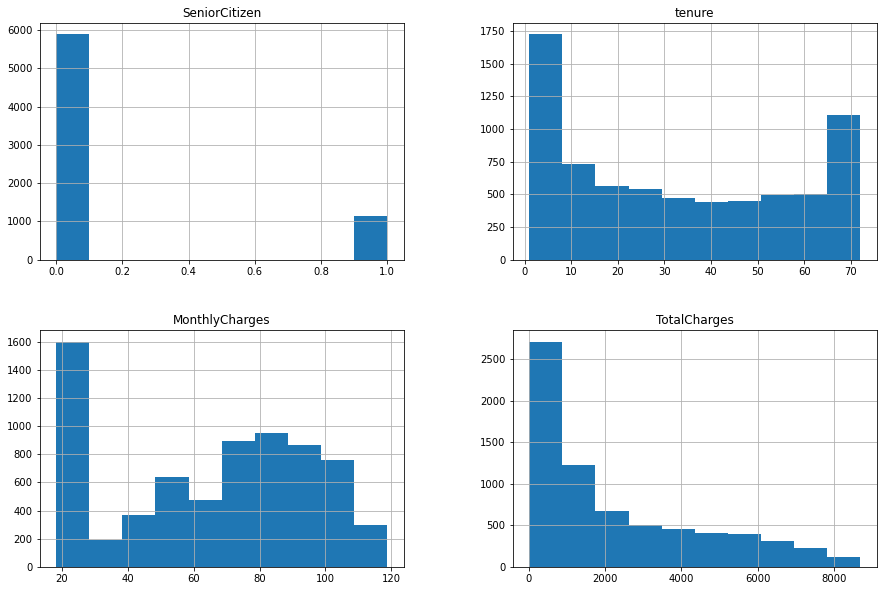

In [11]:
df.hist(figsize=(15,10));

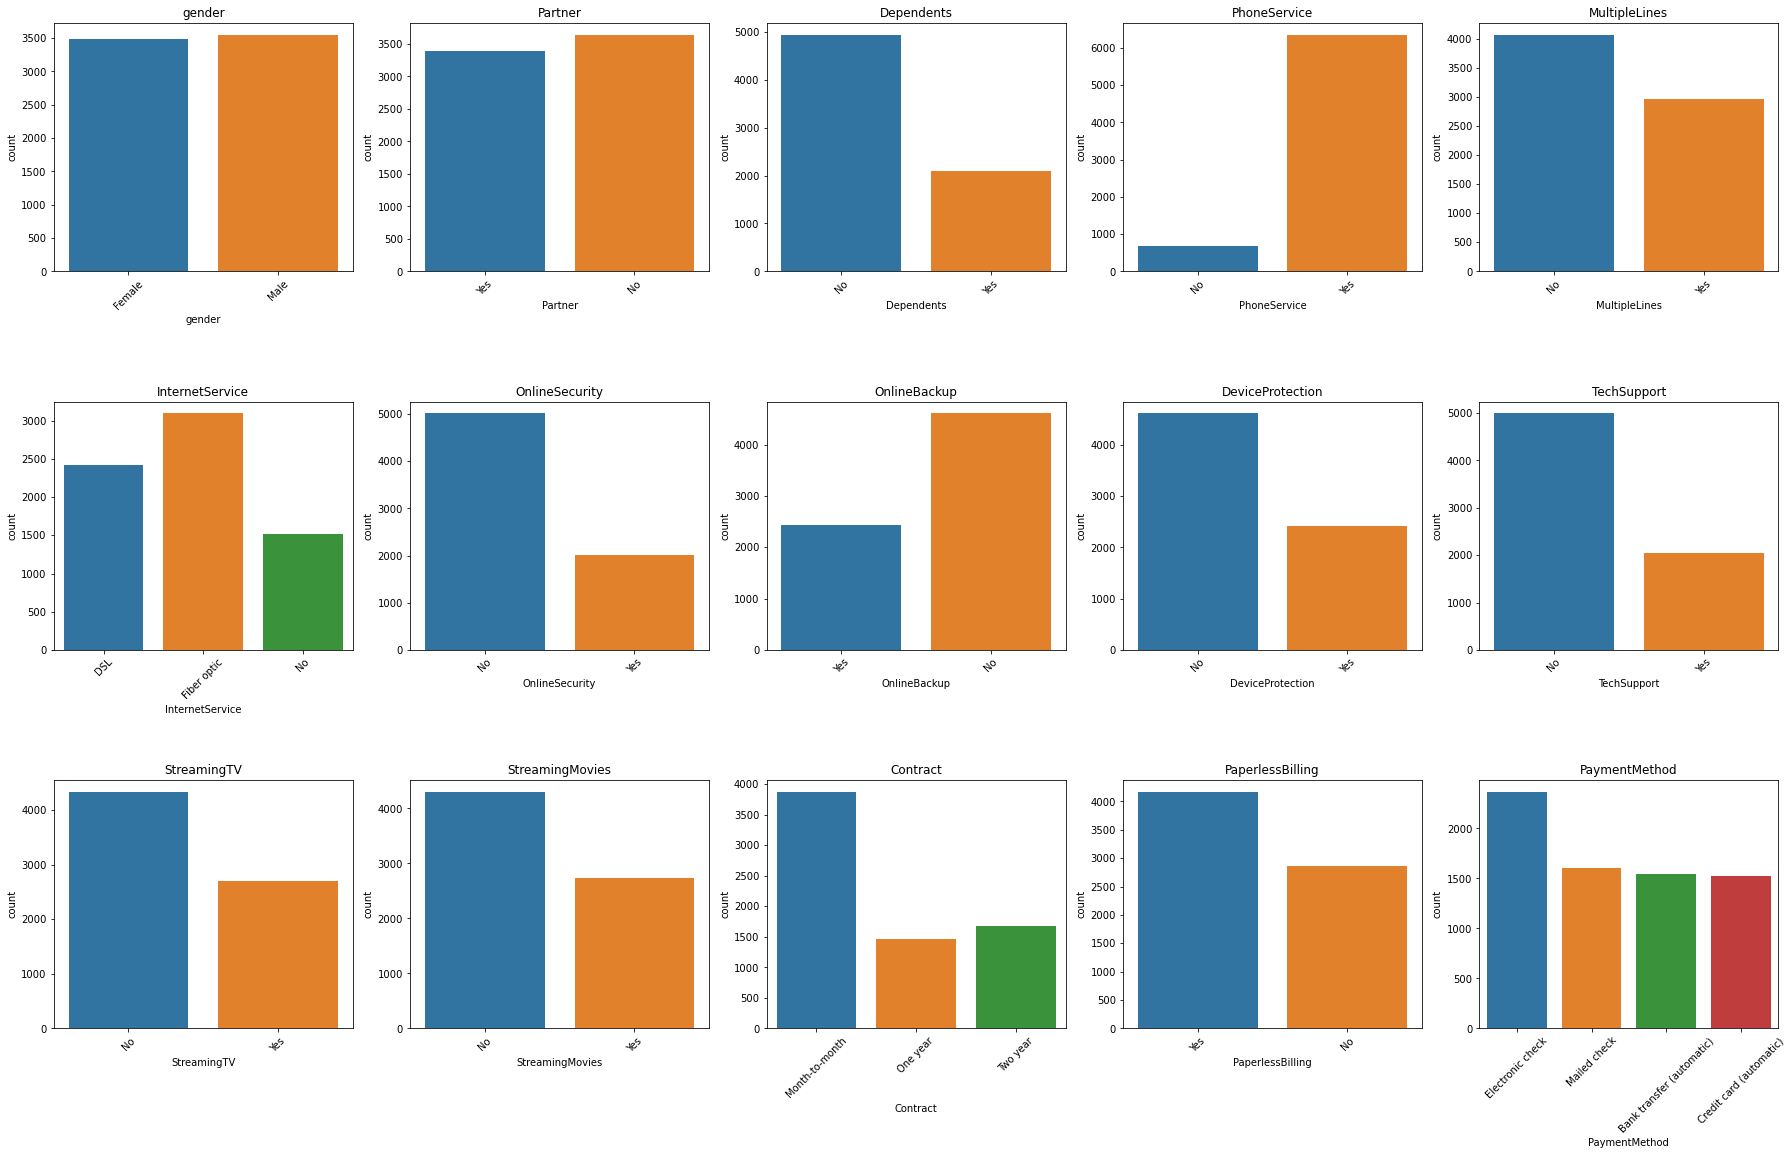

In [12]:
cat  = df.select_dtypes(include="object").columns


plt.figure(figsize=(25,25))
for col in range(0,len(cat)-1):
    plt.subplot(5,len(cat)/3,col+1)
    sns.countplot(data=df,x=df[cat[col]])
    plt.title("{}".format(cat[col]))
    plt.xticks(rotation=45)
    plt.tight_layout()

# Analysis Churn By Gender

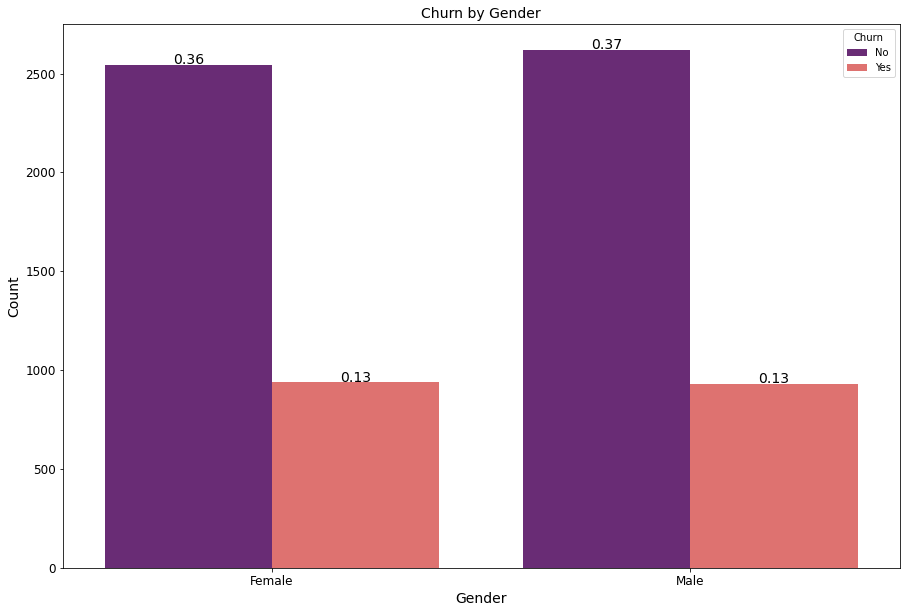

In [13]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df,x="gender",hue="Churn",palette="magma")
plt.title("Churn by Gender",fontsize=14)
plt.xlabel("Gender",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.yticks(fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/df.shape[0]),
           ha='center',fontsize=14)
plt.show()

In [14]:
#contigency table
#H0 : There is not have Correlation between Gender and churn
#H1 :  There is have Correlation between Gender and Churn

gender_chi = pd.crosstab(index=df["gender"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([gender_chi.iloc[0].values,gender_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Fail to reject Hypothesis Null, Because p-value is 0.4904884707065509


berdasarkan dari uji statistik, tidak terdapat hubungan antara gender dengan tingkat churn

# Analysis Churn By Contract and Total Charge

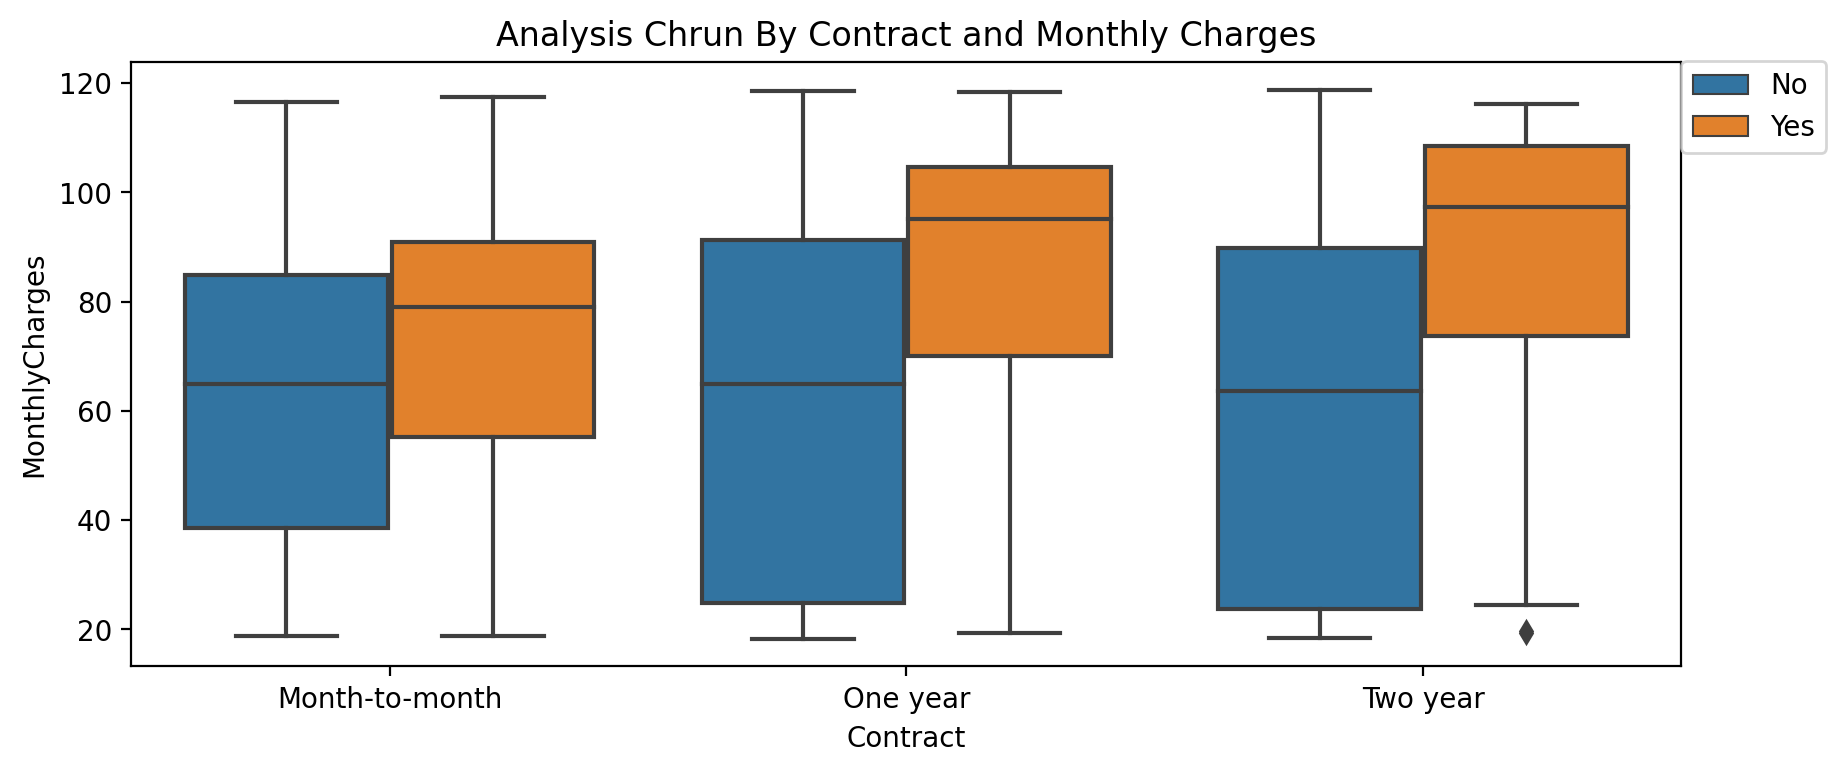

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x="Contract",y="MonthlyCharges",hue="Churn")
plt.title("Analysis Chrun By Contract and Monthly Charges")
plt.legend(loc=(1,0.85));

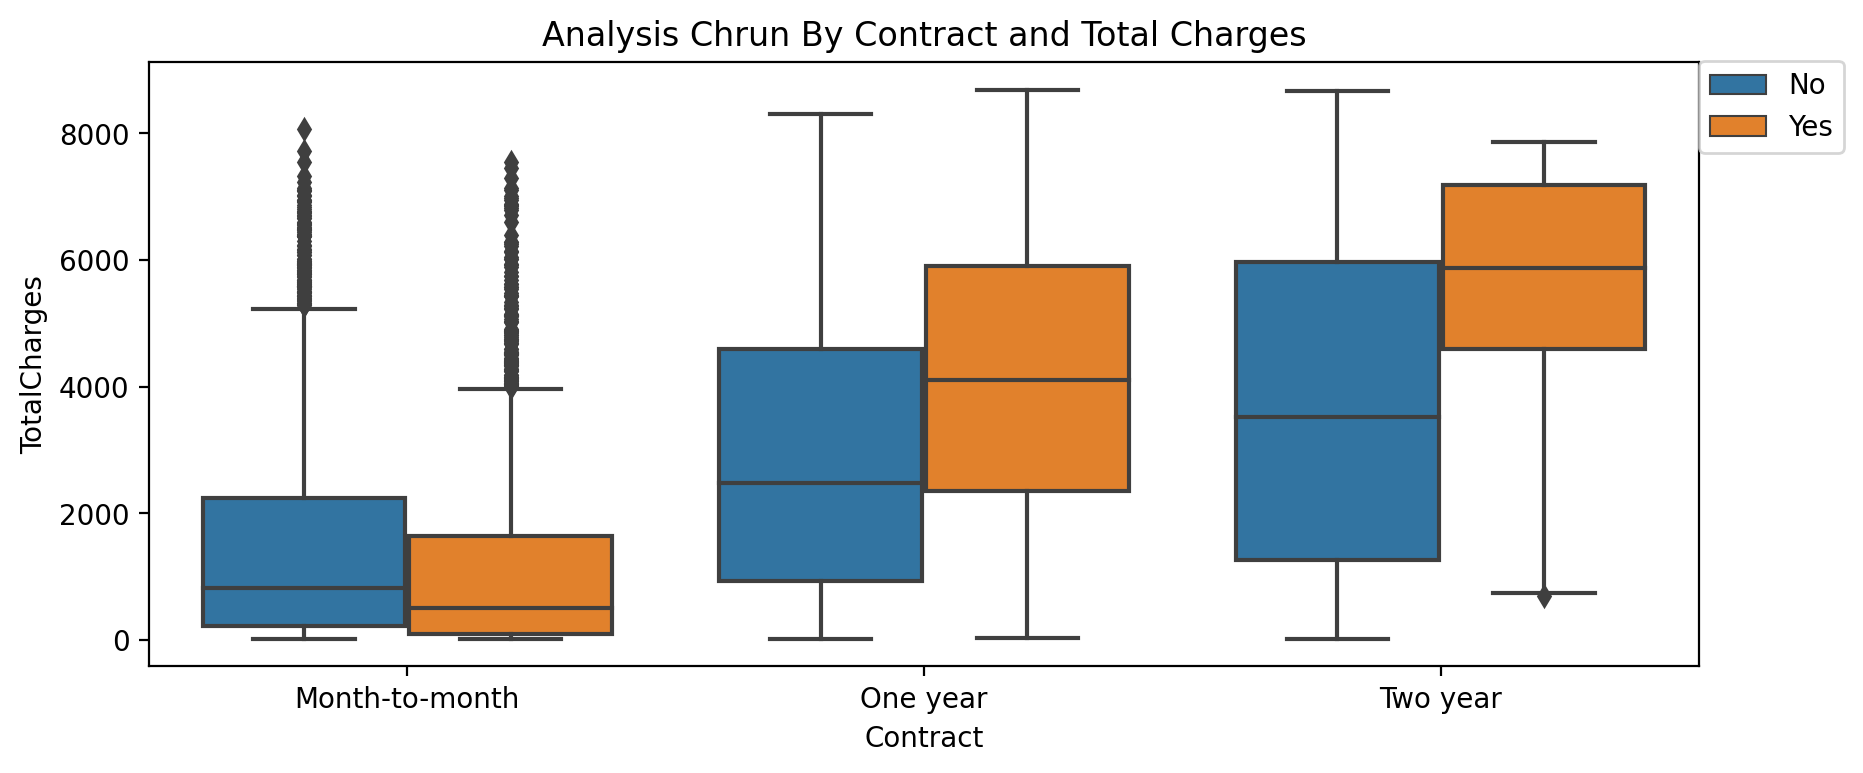

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")
plt.title("Analysis Chrun By Contract and Total Charges")
plt.legend(loc=(1,0.85));

Berdasarjan hubungan antara contract dan Total Charges didapatkan informasi:<br>
1.Untuk contract month to month, total charges dari customer yang churn yang memiliki tingkat yang lebih rendah. Kemungkinan hal yang menjadi penyebab customer yang churn pada contract month to month adalah service yang tidak sesuai dari ekspektasi customer yang bersangkutan. <br>
2.Untuk contract one year dan two year, customer yang churn memiliki total charge yang lebih tinggi dibandingkan dengan customer yang tidak churn.

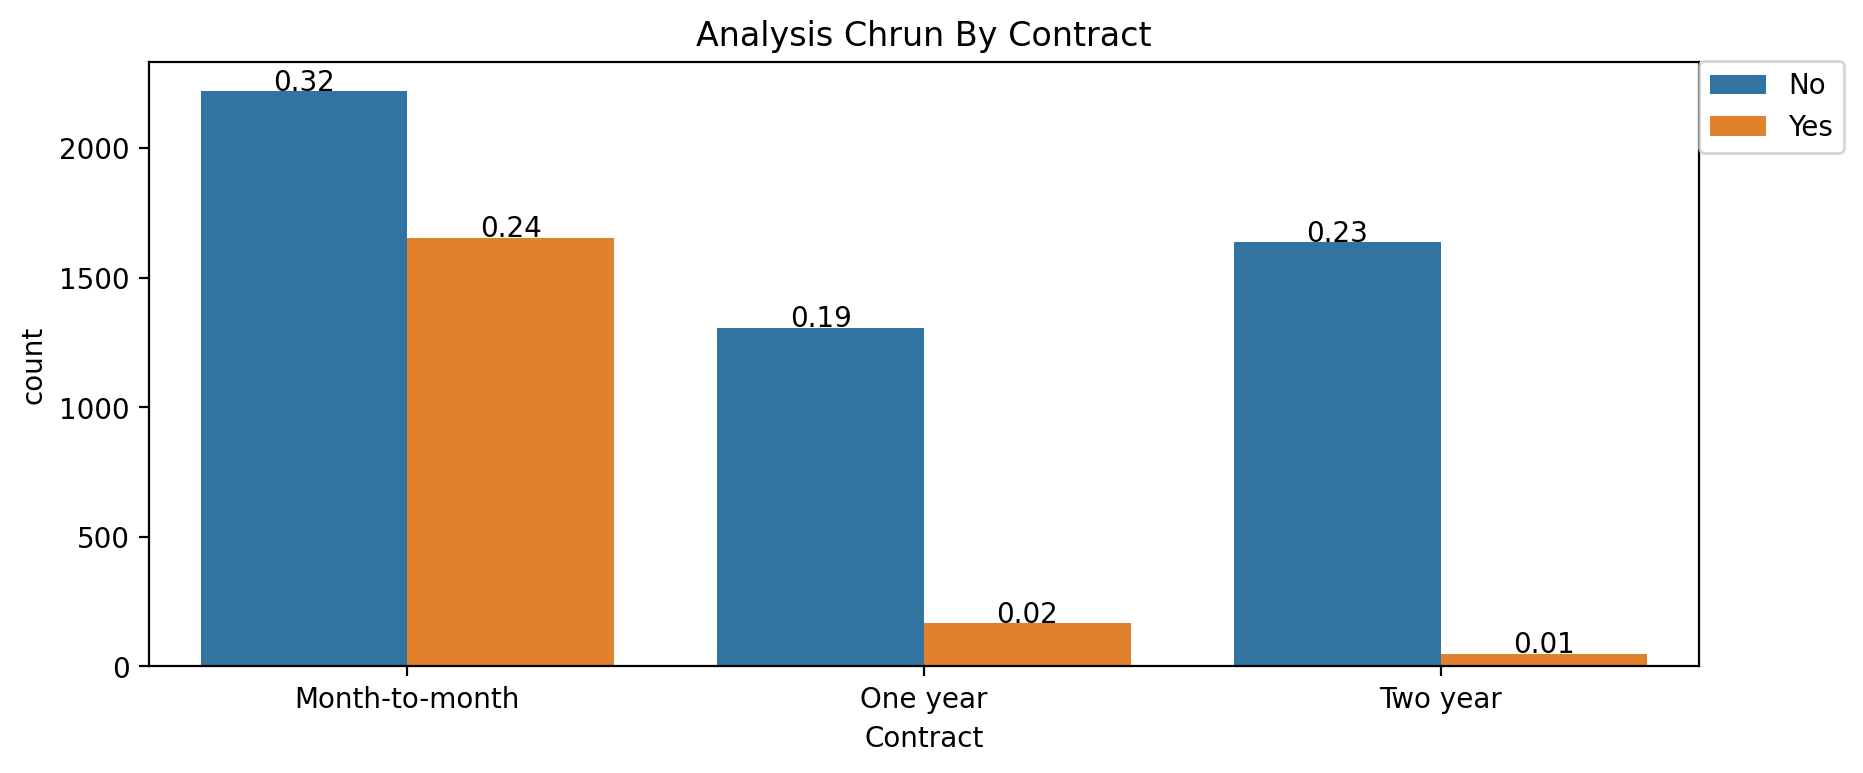

In [17]:
plt.figure(figsize=(10,4),dpi=200)
ax=sns.countplot(data=df,x="Contract",hue="Churn")
plt.title("Analysis Chrun By Contract")
plt.legend(loc=(1,0.85))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/df.shape[0]),
           ha='center')
plt.show();

In [18]:
#contigency table
#H0 : There is not have Correlation between Contract and churn
#H1 :  There is have Correlation between Contract and Churn

contract_chi = pd.crosstab(index=df["Contract"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([contract_chi.iloc[0].values,contract_chi.iloc[1].values,contract_chi.iloc[2].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 7.326182186265472e-257


dari hasil uji statistik terdapat hubungan antara contract dan juga tingkat churn

# Churn Analysis by Senior Citizen

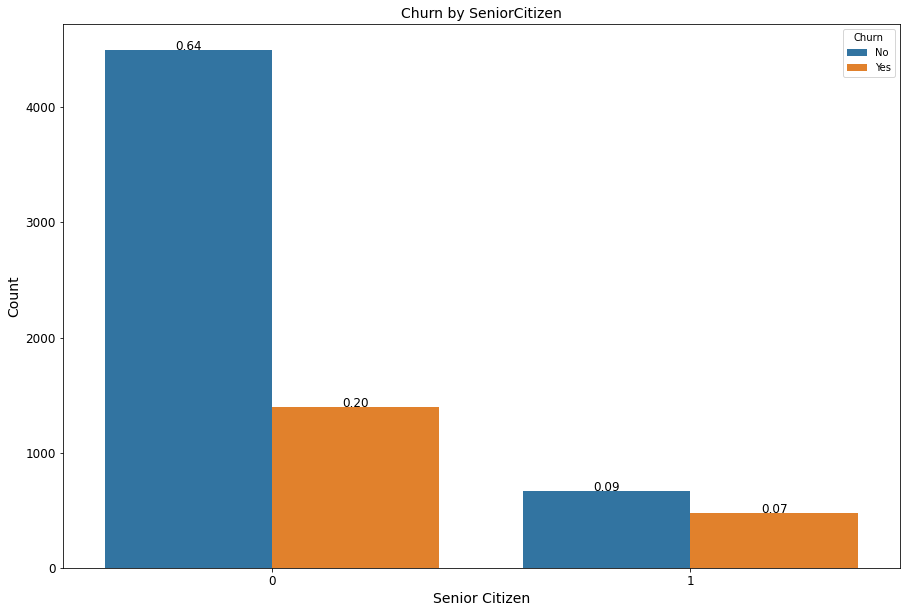

In [19]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df,x="SeniorCitizen",hue="Churn")
plt.title("Churn by SeniorCitizen",fontsize=14)
plt.xlabel("Senior Citizen",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.yticks(fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/df.shape[0]),
           ha='center',fontsize=12)
plt.show()

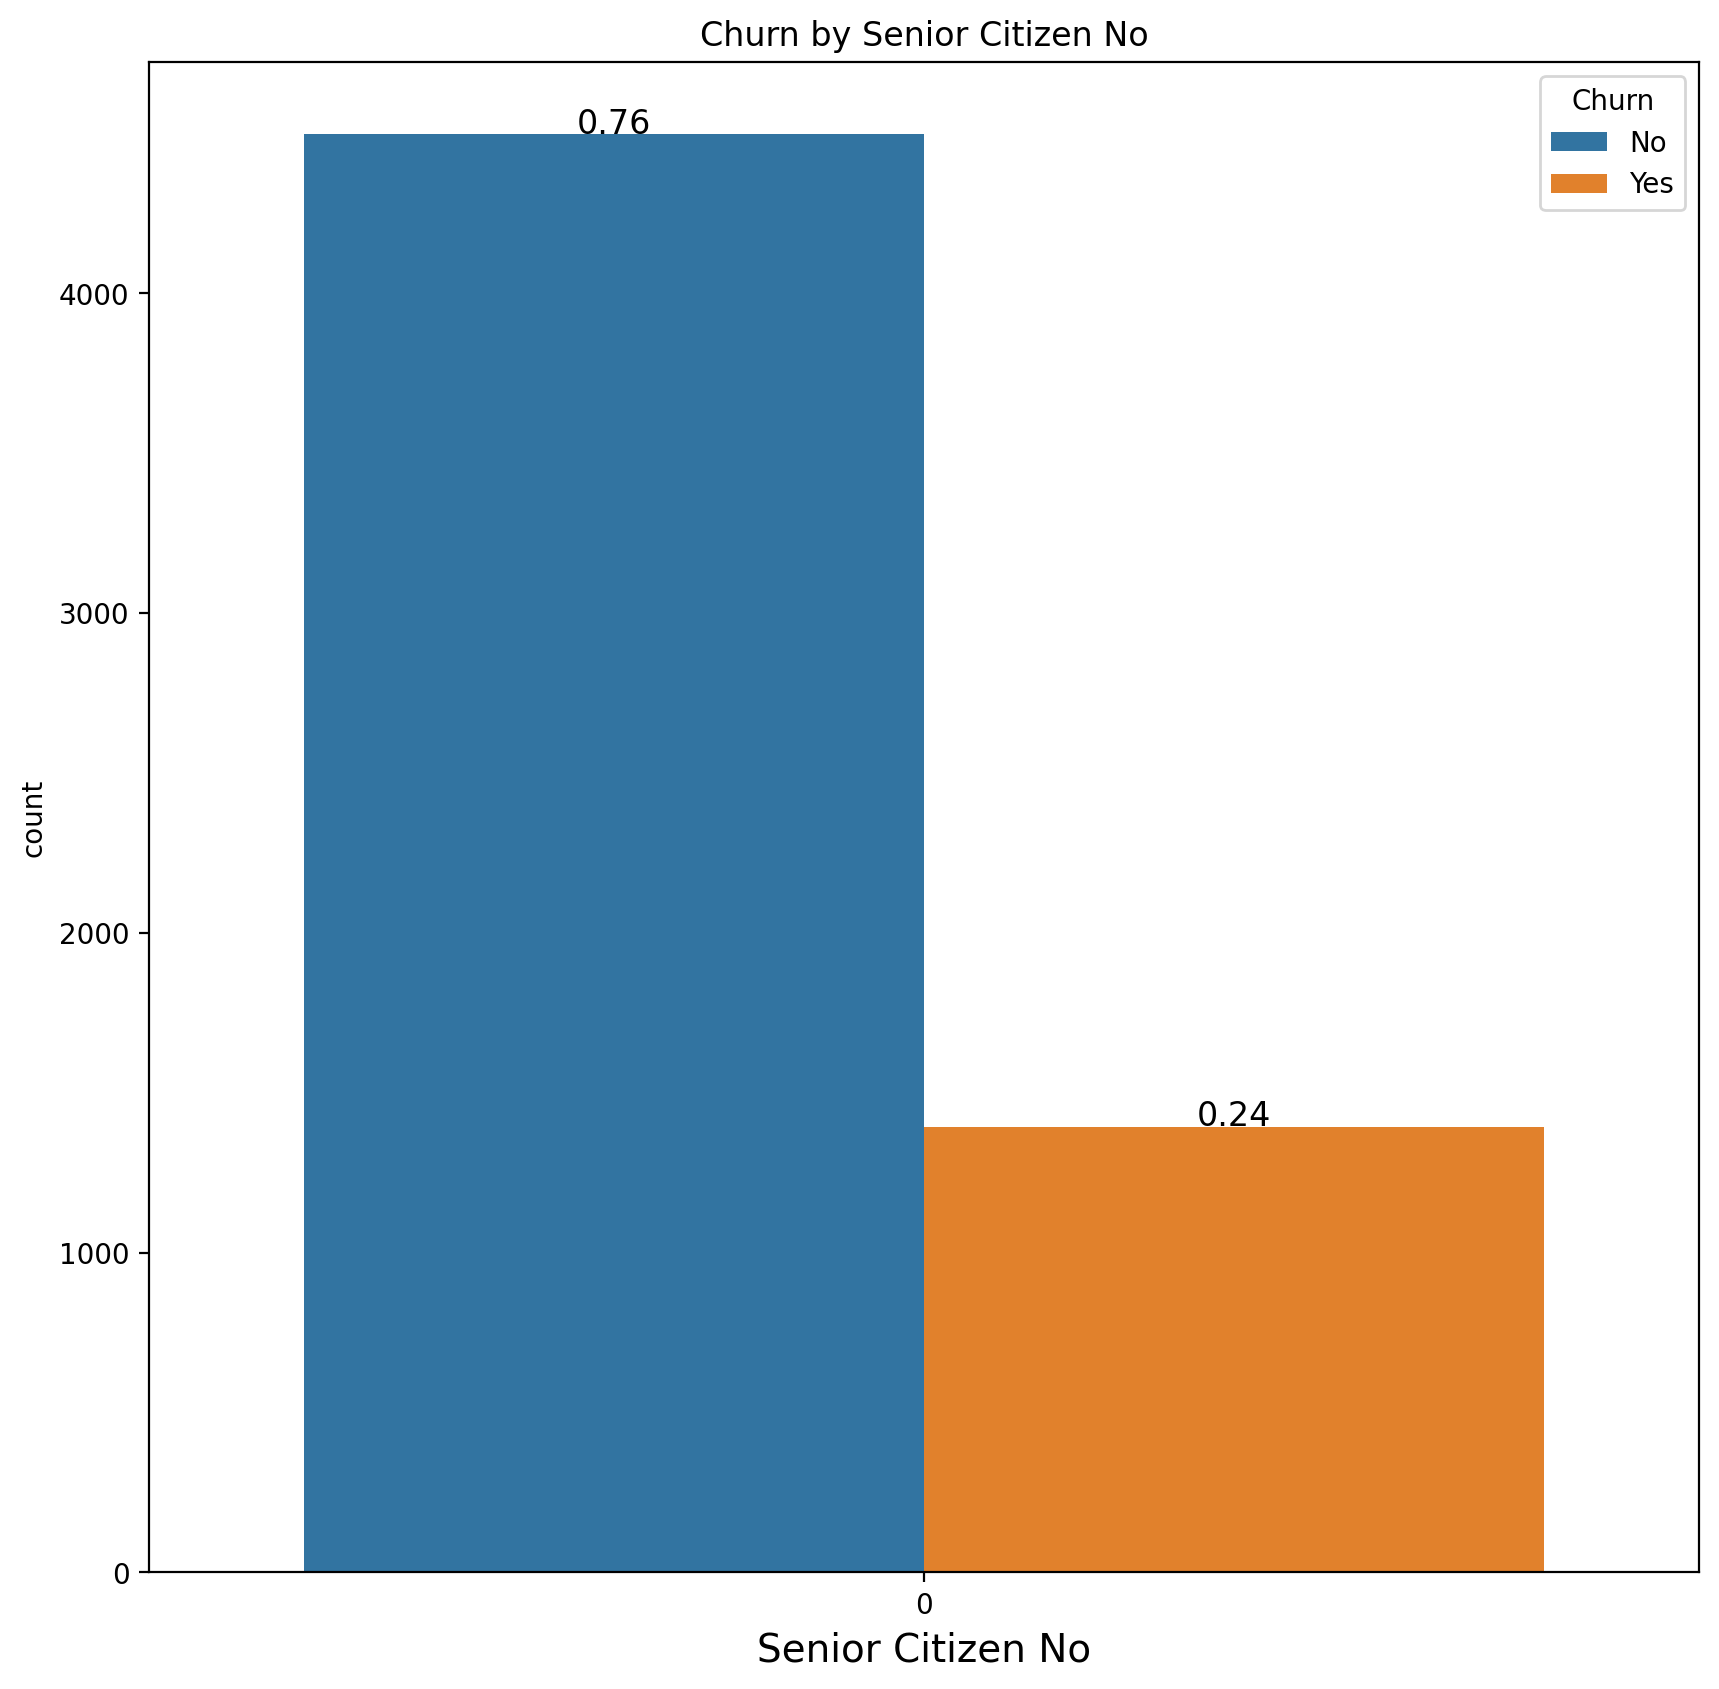

In [20]:
senior_no = df[df["SeniorCitizen"]==0]

plt.figure(figsize=(10,10),dpi=200)
ax = sns.countplot(data=senior_no,x="SeniorCitizen",hue="Churn")
plt.title("Churn by Senior Citizen No",fontsize=12)
plt.xlabel("Senior Citizen No",fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/senior_no.shape[0]),
           ha='center',fontsize=12)
plt.show()

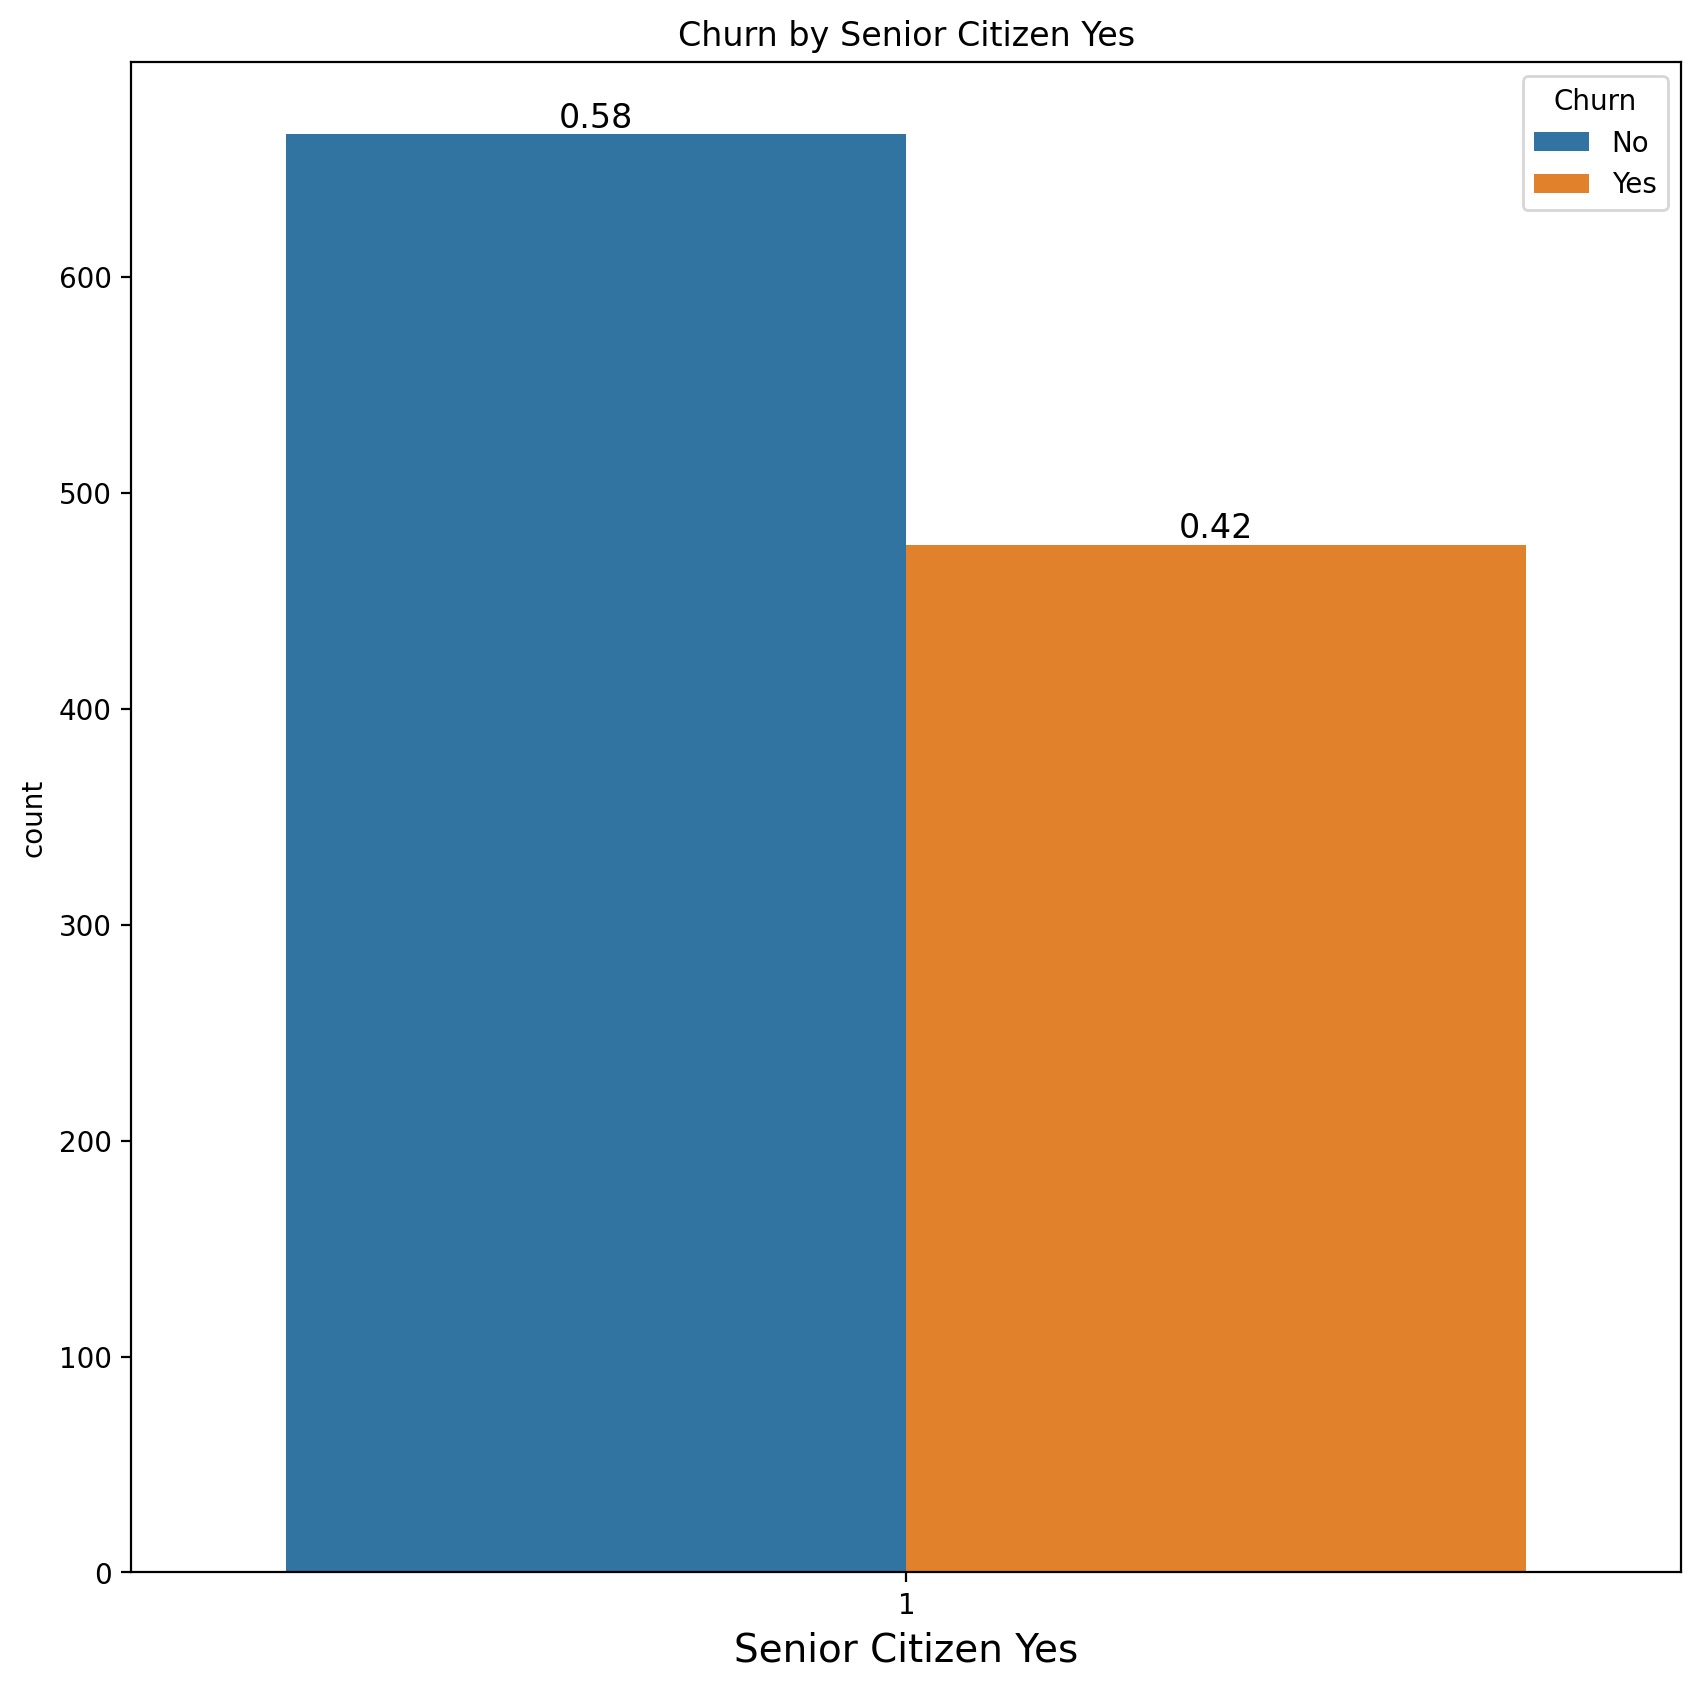

In [21]:
senior = df[df["SeniorCitizen"]==1]

plt.figure(figsize=(10,10),dpi=200)
ax = sns.countplot(data=senior,x="SeniorCitizen",hue="Churn",hue_order=["No","Yes"])
plt.title("Churn by Senior Citizen Yes",fontsize=12)
plt.xlabel("Senior Citizen Yes",fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/senior.shape[0]),
           ha='center',fontsize=12)
plt.show()

In [22]:
#contigency table
#H0 : There is not have relation between Senior Citizen and churn
#H1 :  There is have relation between Senior Citizen and Churn

senior_chi = pd.crosstab(index=df["SeniorCitizen"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([senior_chi.iloc[0].values,senior_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 2.4792557203954705e-36


In [23]:
pd.crosstab(index=df["SeniorCitizen"],columns=df["Churn"])

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476

# Churn Analysis by Partner

In [24]:
def categoric_analysis(df,p):
    plt.figure(figsize=(15,10),dpi=200)
    ax=sns.countplot(data=df,x=df[p],hue="Churn")
    plt.title("Churn by {}".format(p),fontsize=14)
    plt.xlabel(f"{p}",fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Count",fontsize=14)
    plt.yticks(fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
           height+3,'{:.2f}'.format(height/df.shape[0]),
           ha='center',fontsize=12)
    plt.show()

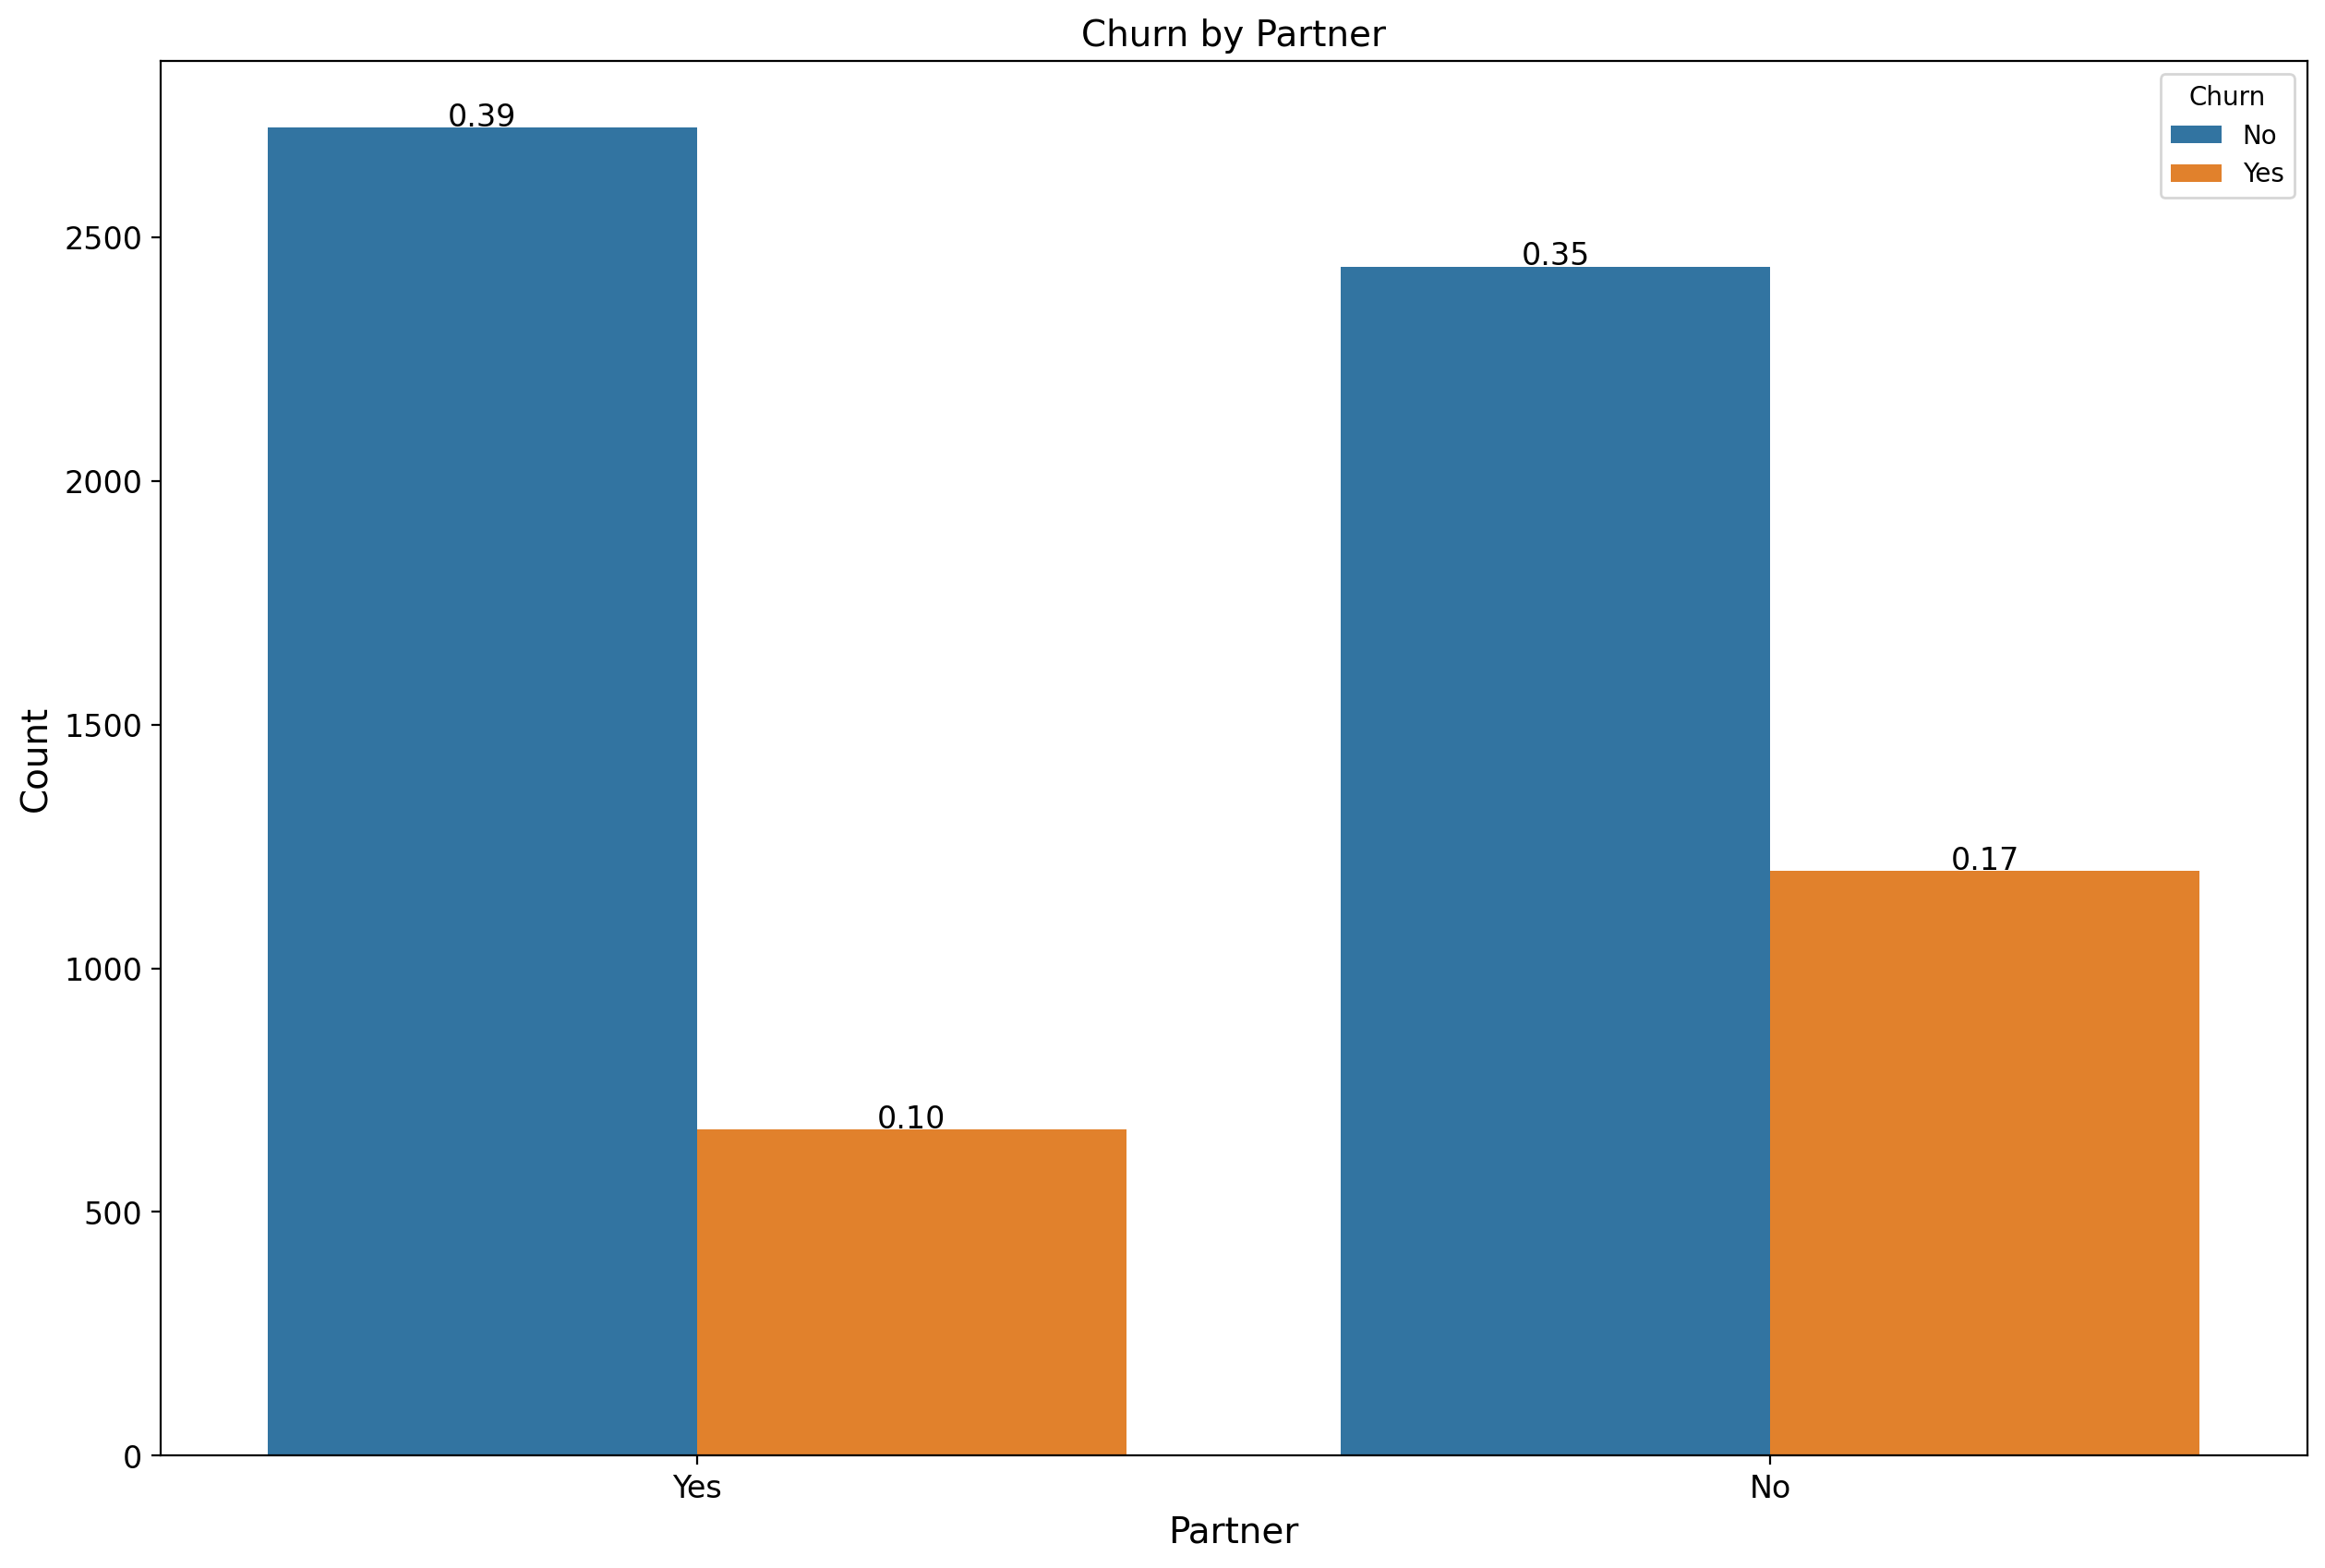

In [25]:
(categoric_analysis(df,"Partner"))

In [26]:
#contigency table
#H0 : There is not have relation between Partner and churn
#H1 :  There is have relation between Partner and Churn

partner_chi = pd.crosstab(index=df["Partner"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([partner_chi.iloc[0].values,partner_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 3.97379757451591e-36


# Churn Analysis By Dependents

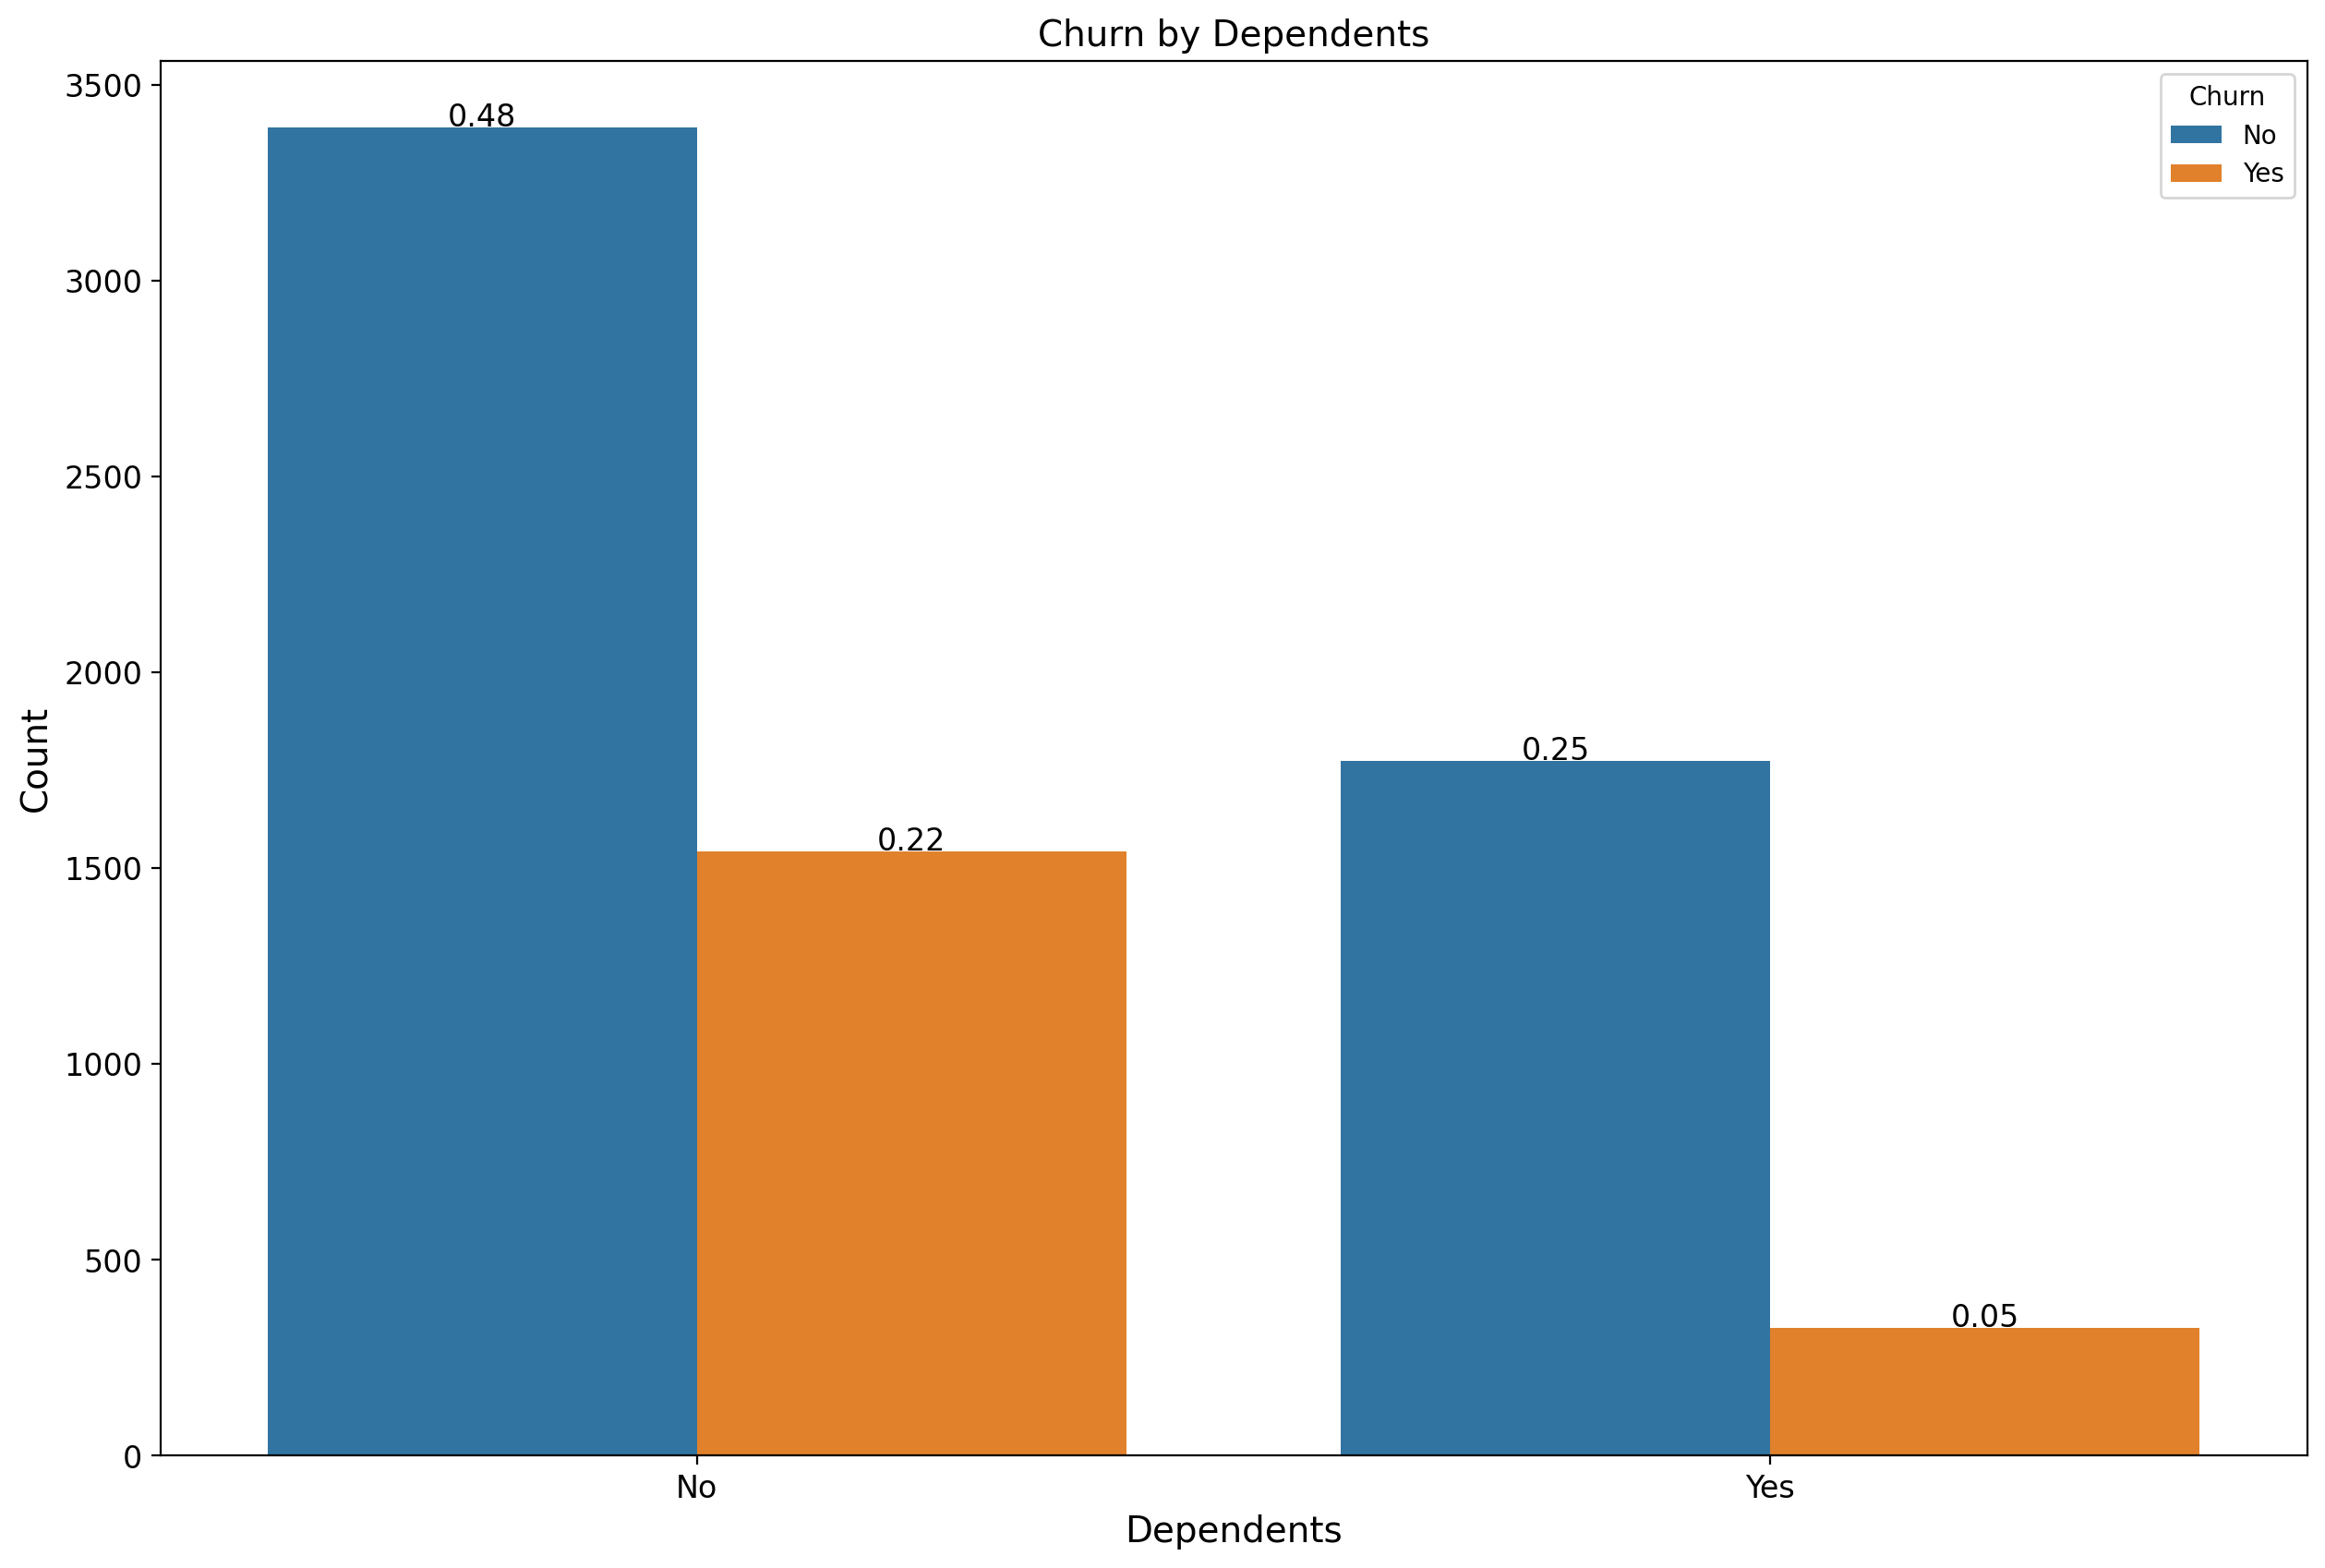

In [27]:
(categoric_analysis(df,"Dependents"))

<Figure size 3000x3000 with 0 Axes>

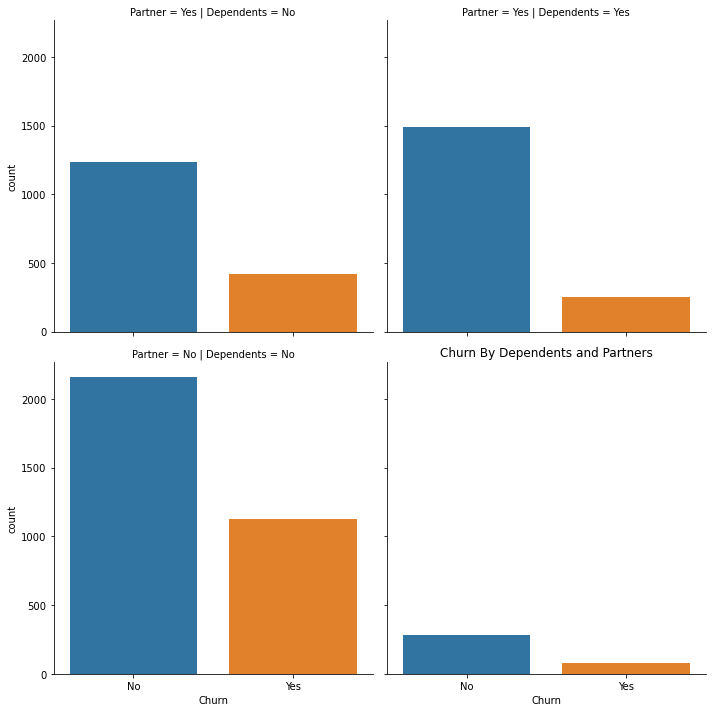

In [28]:
plt.figure(figsize=(15,15),dpi=200)
ax = sns.catplot(data=df,x="Churn",col="Dependents",row="Partner",kind="count")
plt.title("Churn By Dependents and Partners",fontsize=12);

In [29]:
df.groupby(["Partner","Dependents"])["Churn"].sum()

Partner  Dependents
No       No            NoYesNoYesYesNoNoYesNoNoNoYesYesNoNoNoYesNoYes...
         Yes           NoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoN...
Yes      No            NoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYe...
         Yes           NoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...
Name: Churn, dtype: object

In [30]:
#contigency table
#H0 : There is not have relation between dependents and churn
#H1 :  There is have relation between dependents and Churn

dependents_chi = pd.crosstab(index=df["Dependents"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([dependents_chi.iloc[0].values,dependents_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 2.0196592017051303e-42


# Analysis Churn by Paperless Billing And Payment Method

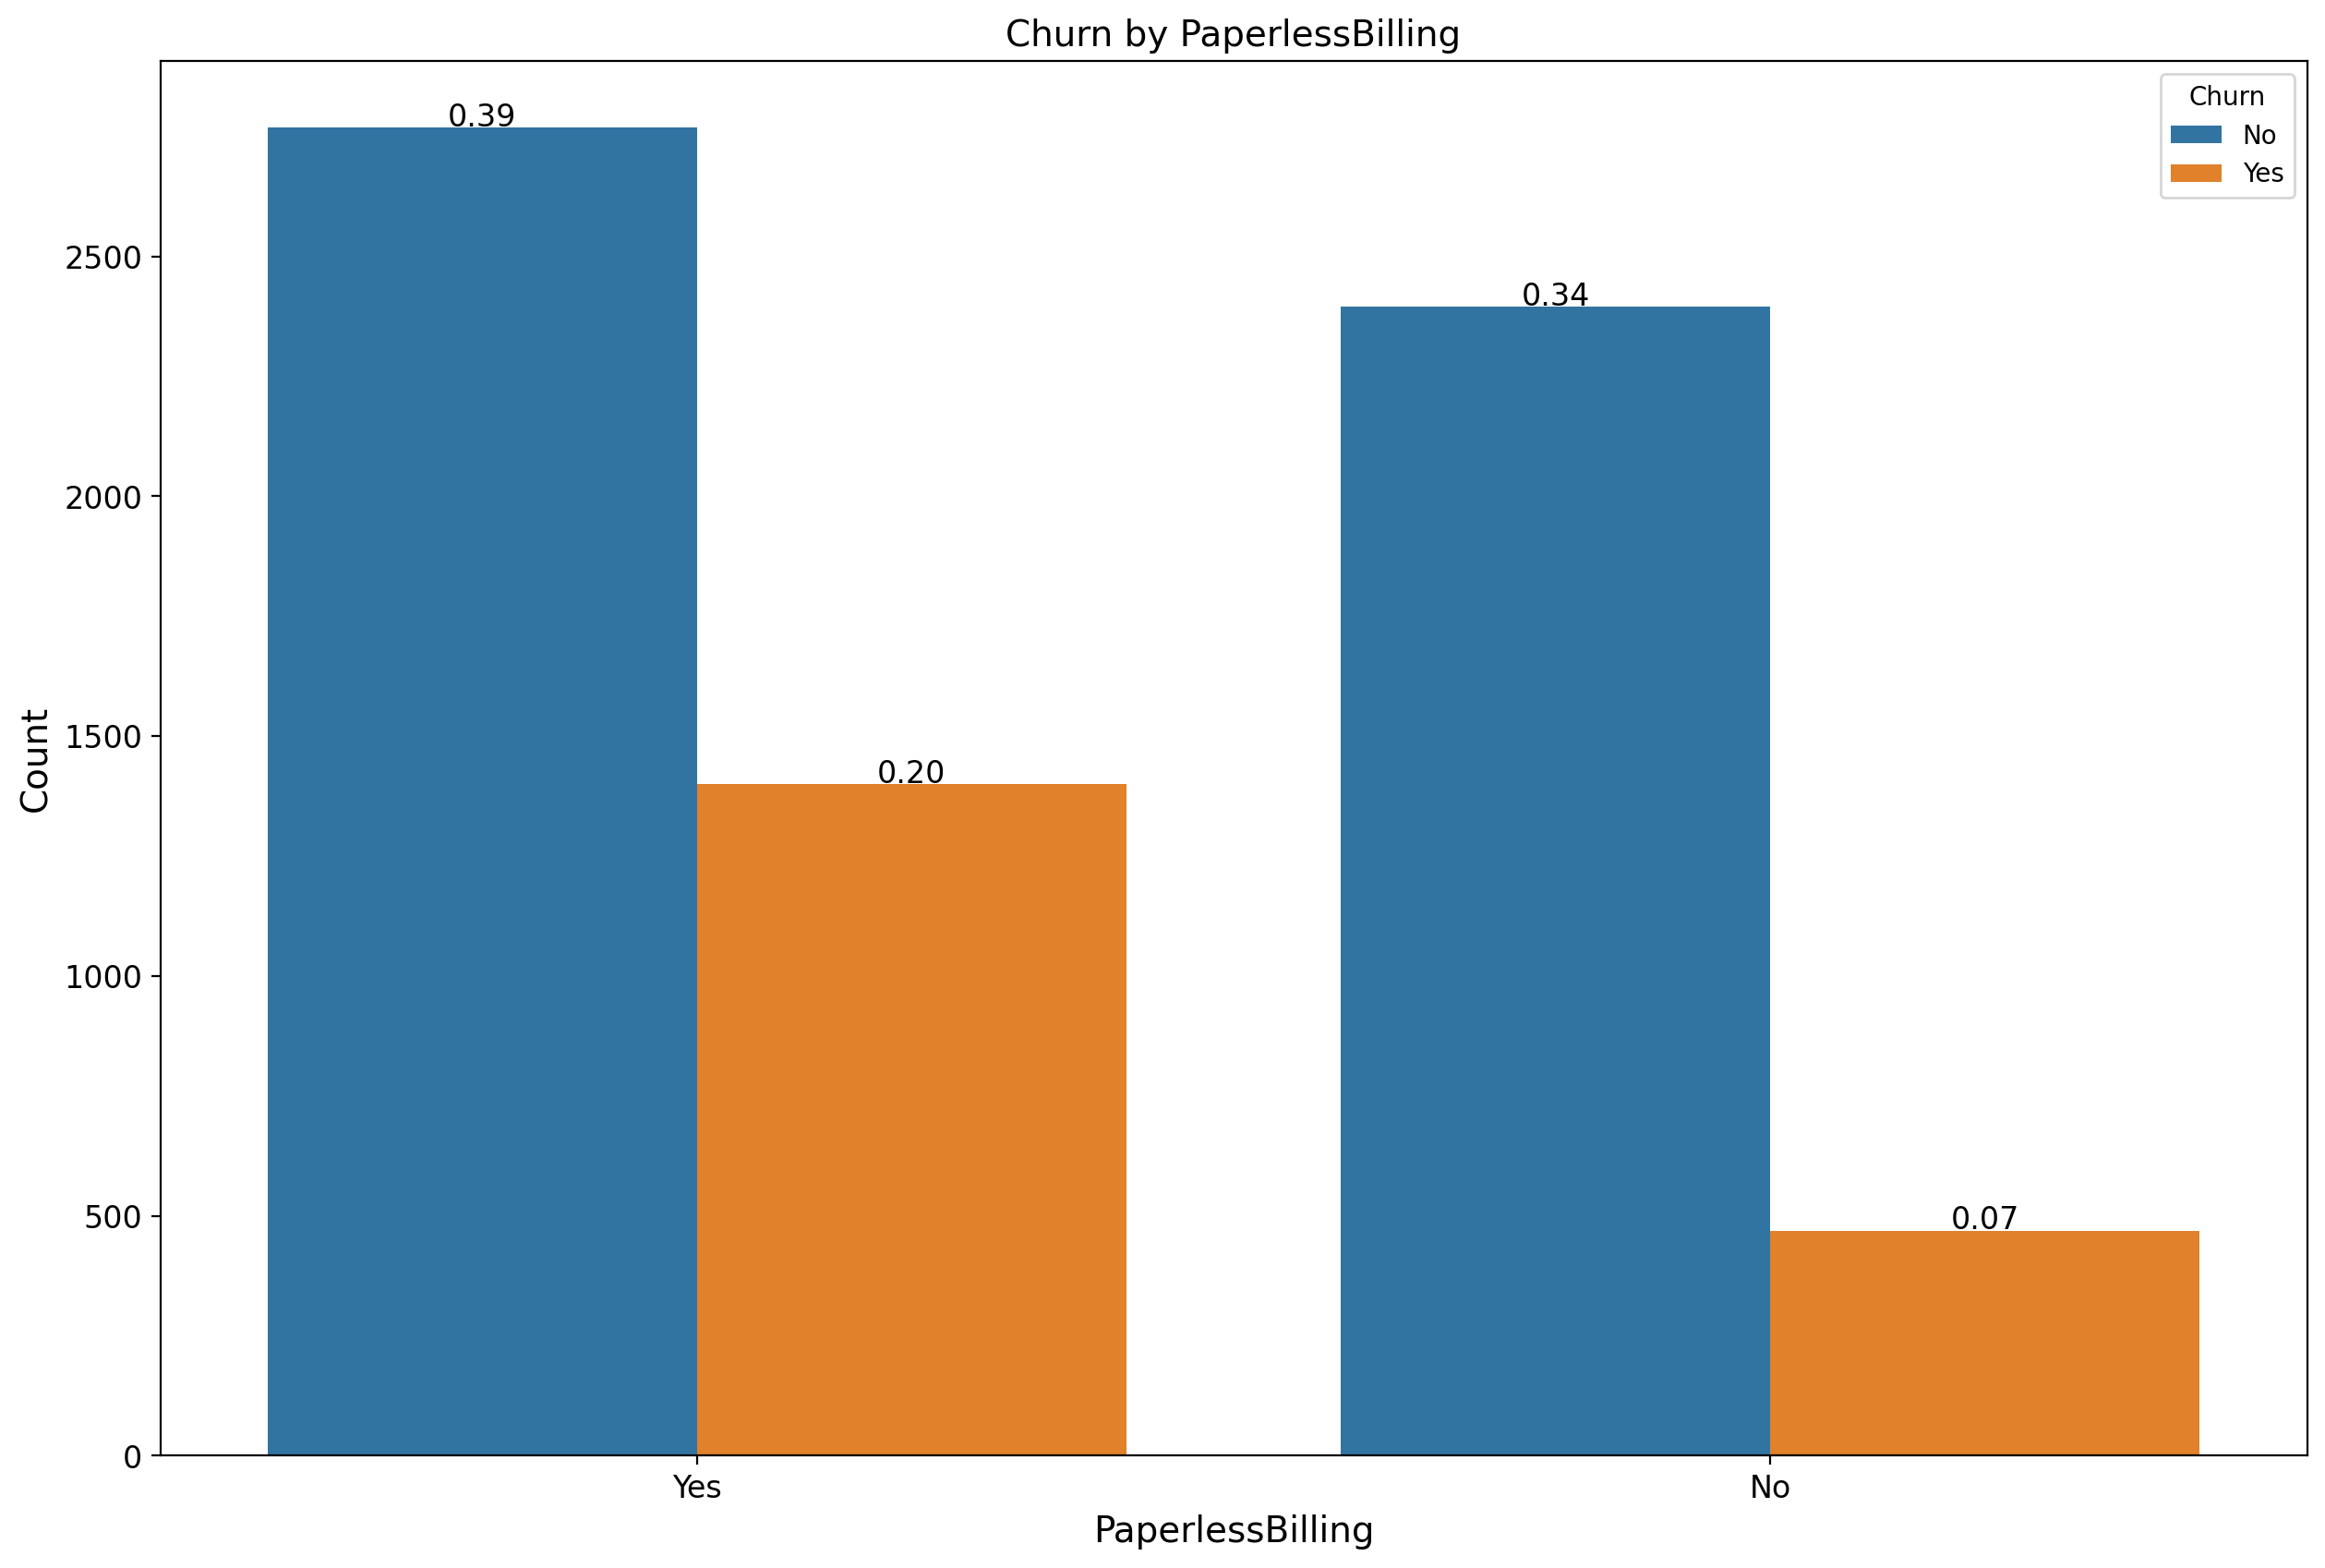

In [31]:
categoric_analysis(df,"PaperlessBilling")

In [32]:
#contigency table
#H0 : There is not have relation between Paperless Billing and churn
#H1 :  There is have relation between Paperless Billing and Churn

paperless_chi = pd.crosstab(index=df["PaperlessBilling"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([paperless_chi.iloc[0].values,paperless_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 8.236203353962564e-58


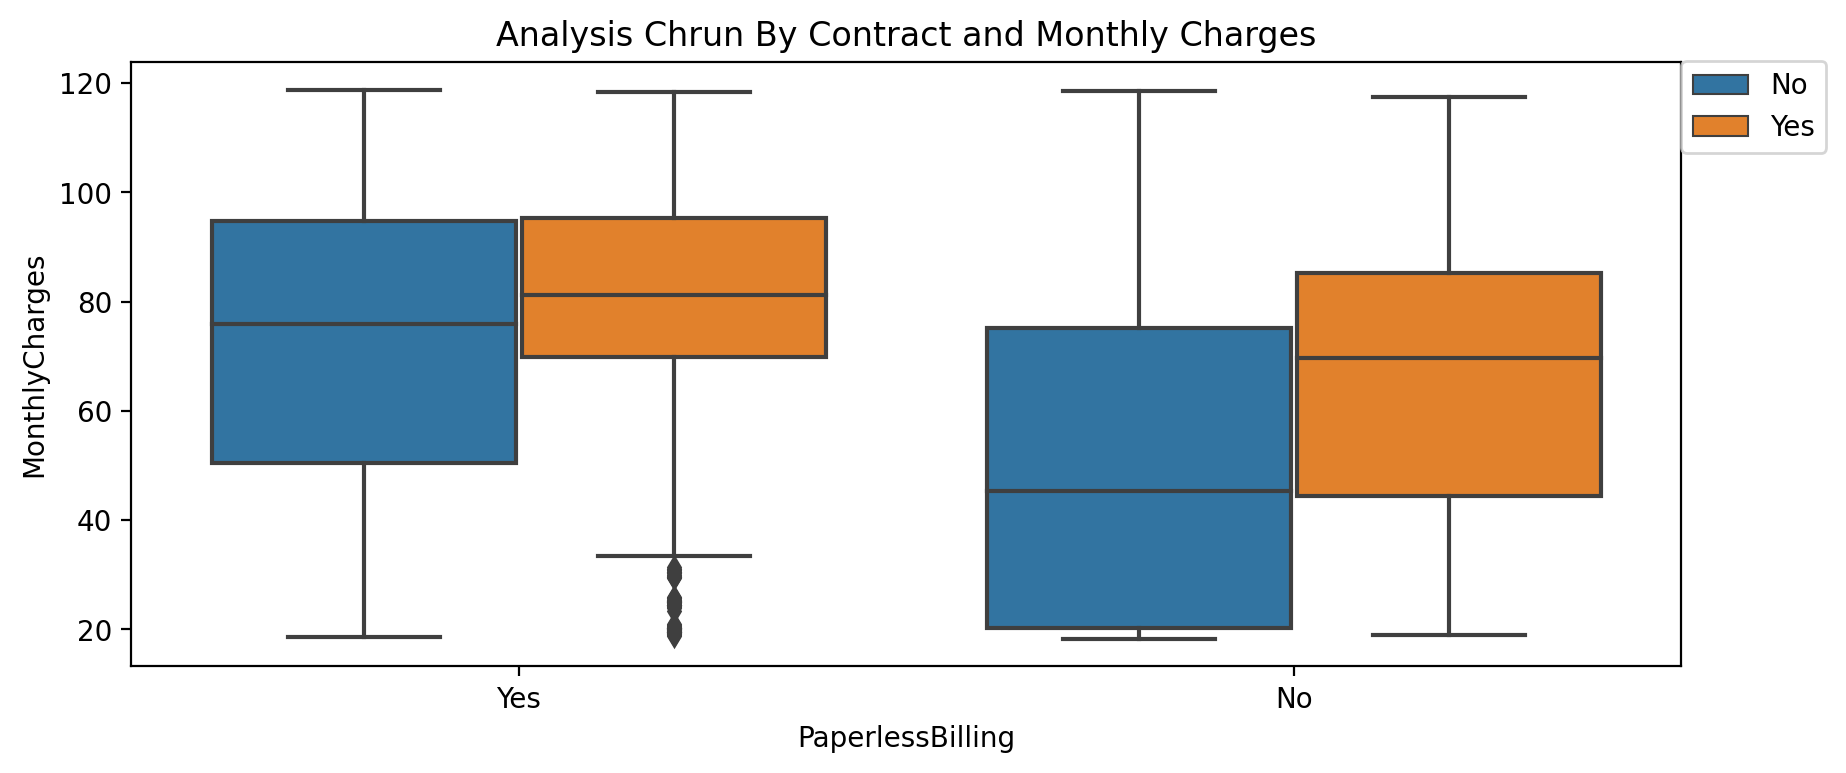

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x="PaperlessBilling",y="MonthlyCharges",hue="Churn")
plt.title("Analysis Chrun By Contract and Monthly Charges")
plt.legend(loc=(1,0.85));

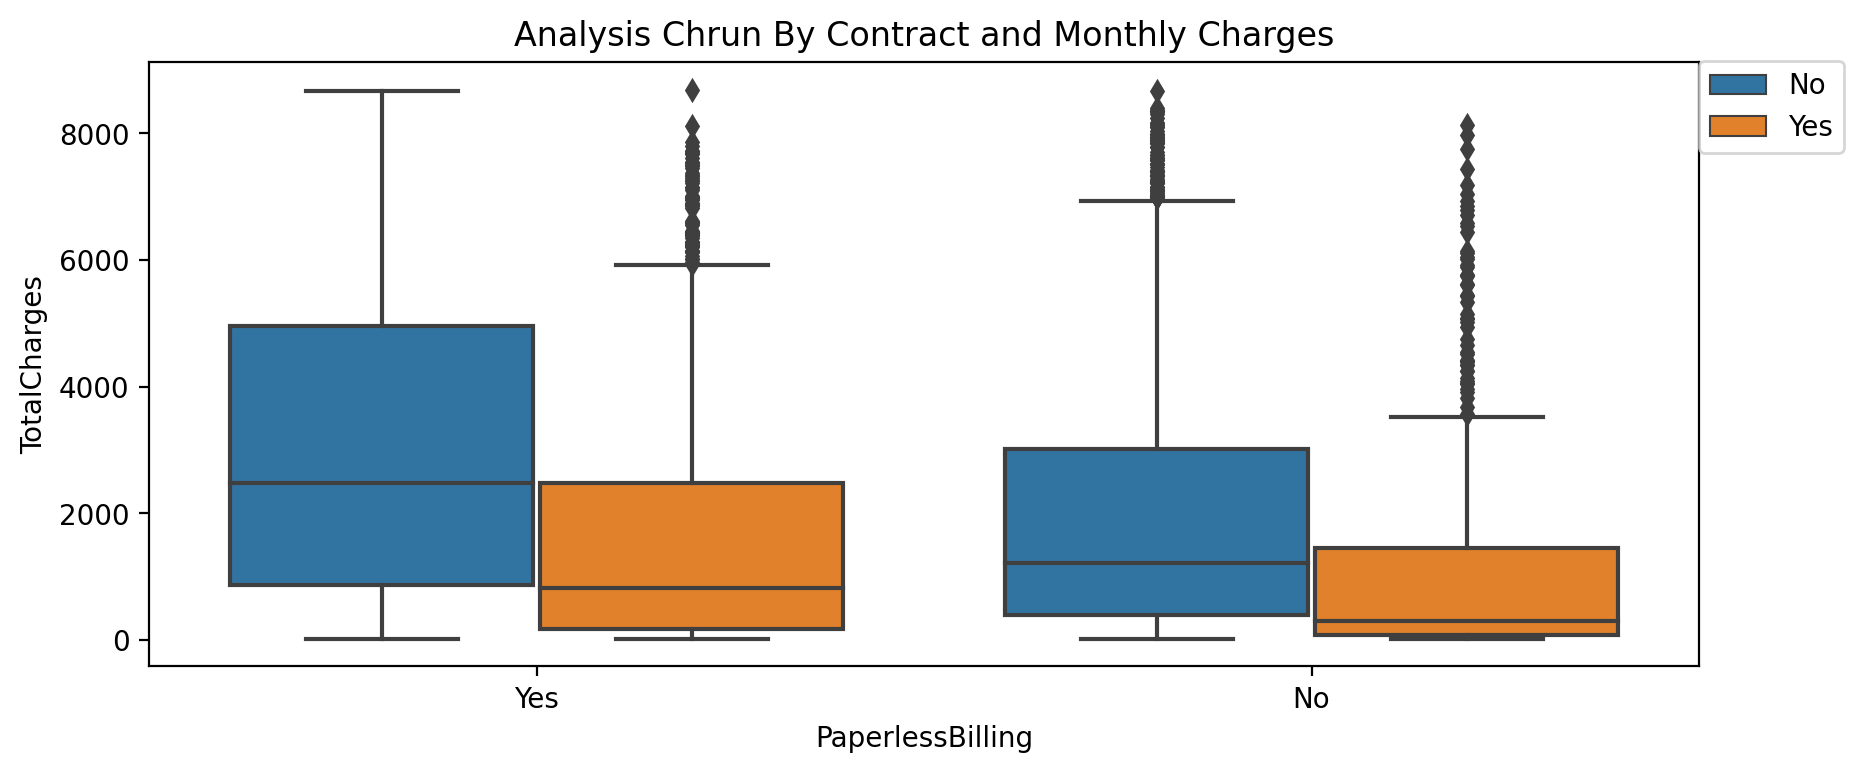

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x="PaperlessBilling",y="TotalCharges",hue="Churn")
plt.title("Analysis Chrun By Contract and Monthly Charges")
plt.legend(loc=(1,0.85));

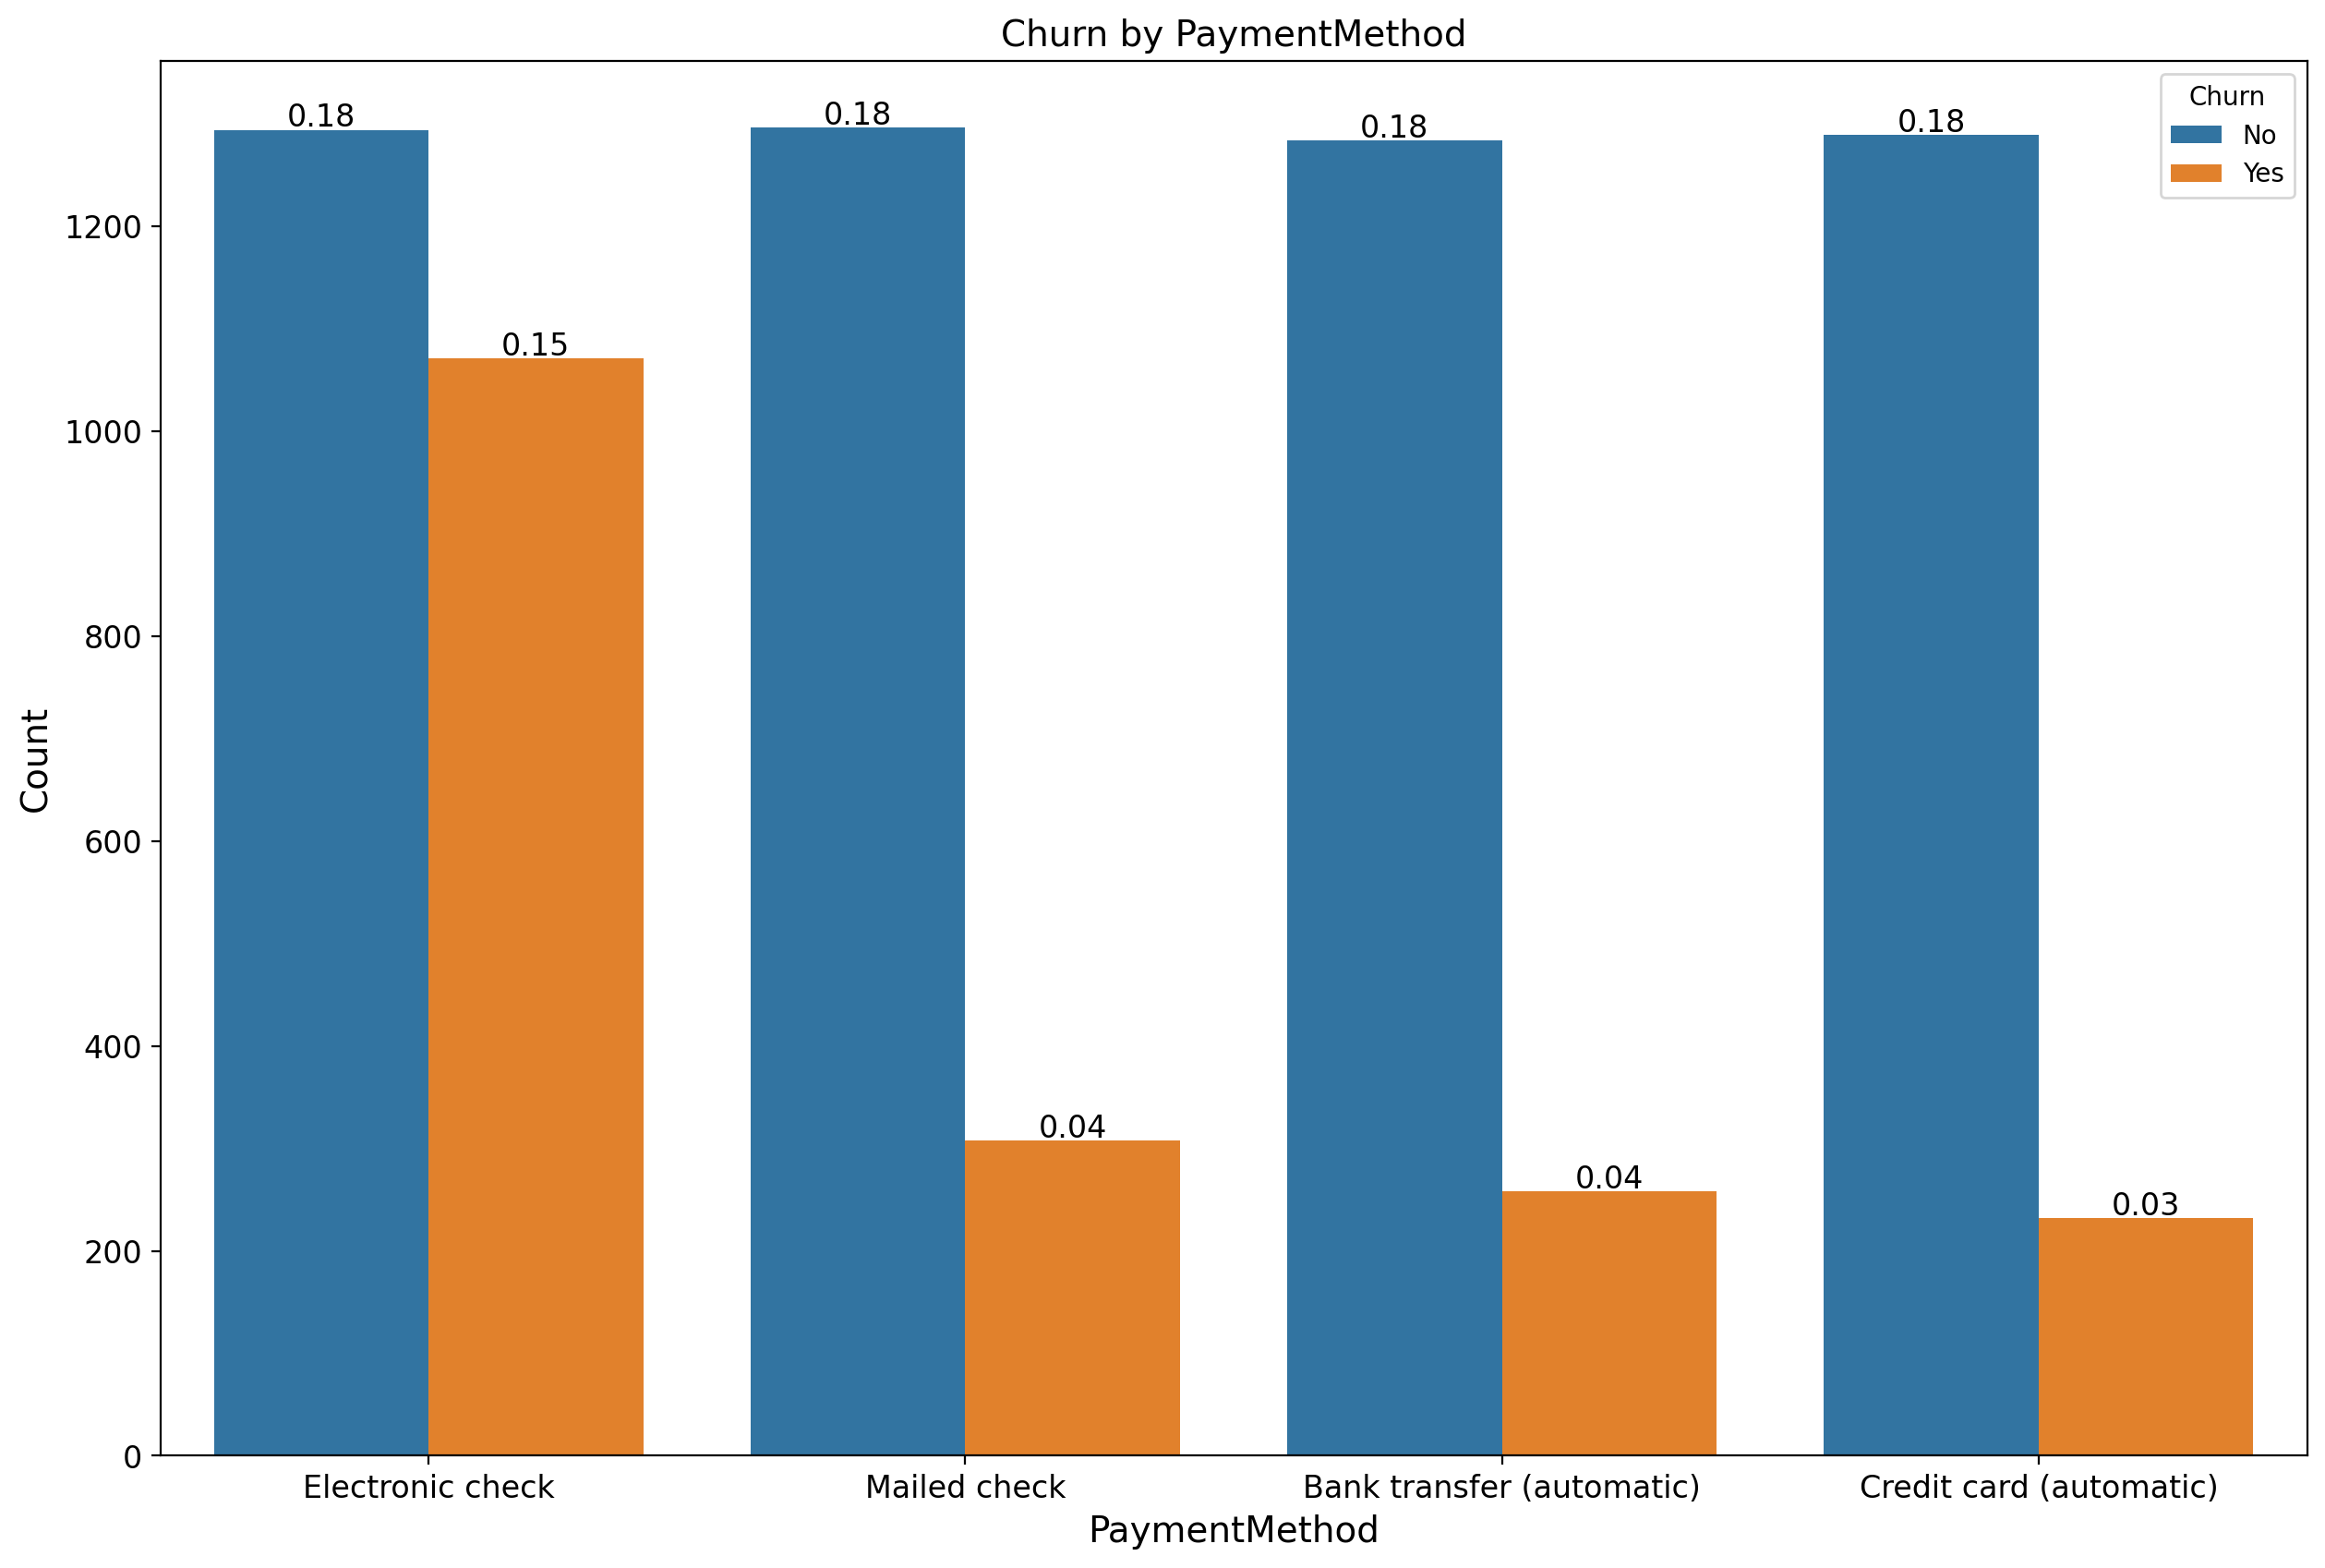

In [35]:
categoric_analysis(df,"PaymentMethod")

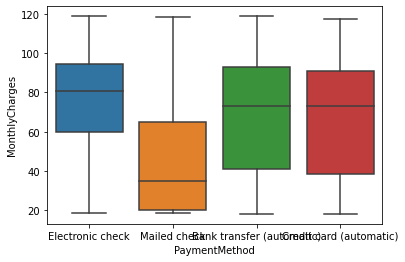

In [36]:
sns.boxplot(data=df,y="MonthlyCharges",x="PaymentMethod");

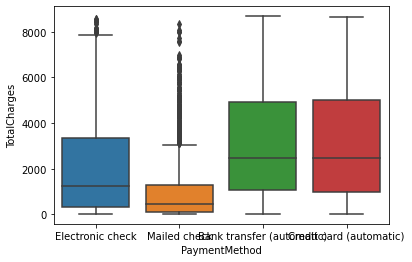

In [37]:
sns.boxplot(data=df,y="TotalCharges",x="PaymentMethod");

In [38]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [39]:
#contigency table
#H0 : There is not have relation between payment method and churn
#H1 :  There is have relation between payment method and Churn

payment_chi = pd.crosstab(index=df["PaymentMethod"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([payment_chi.iloc[0].values,payment_chi.iloc[1].values,payment_chi.iloc[2].values,
                                      payment_chi.iloc[3].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 1.4263098511063342e-139


<Figure size 3000x3000 with 0 Axes>

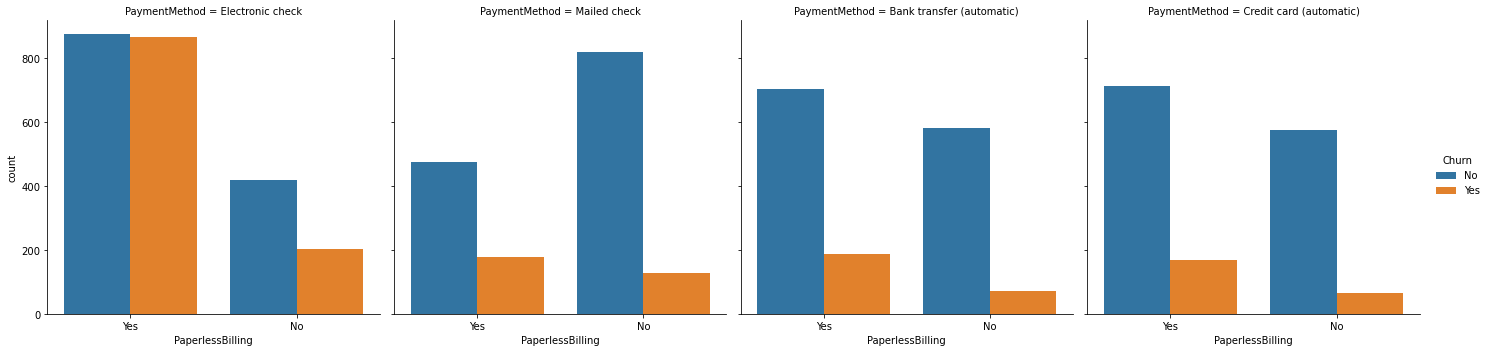

In [40]:
plt.figure(figsize=(15,15),dpi=200)
ax = sns.catplot(data=df,x="PaperlessBilling",col="PaymentMethod",hue="Churn",kind="count")

# Analysis Churn by Service and Technical

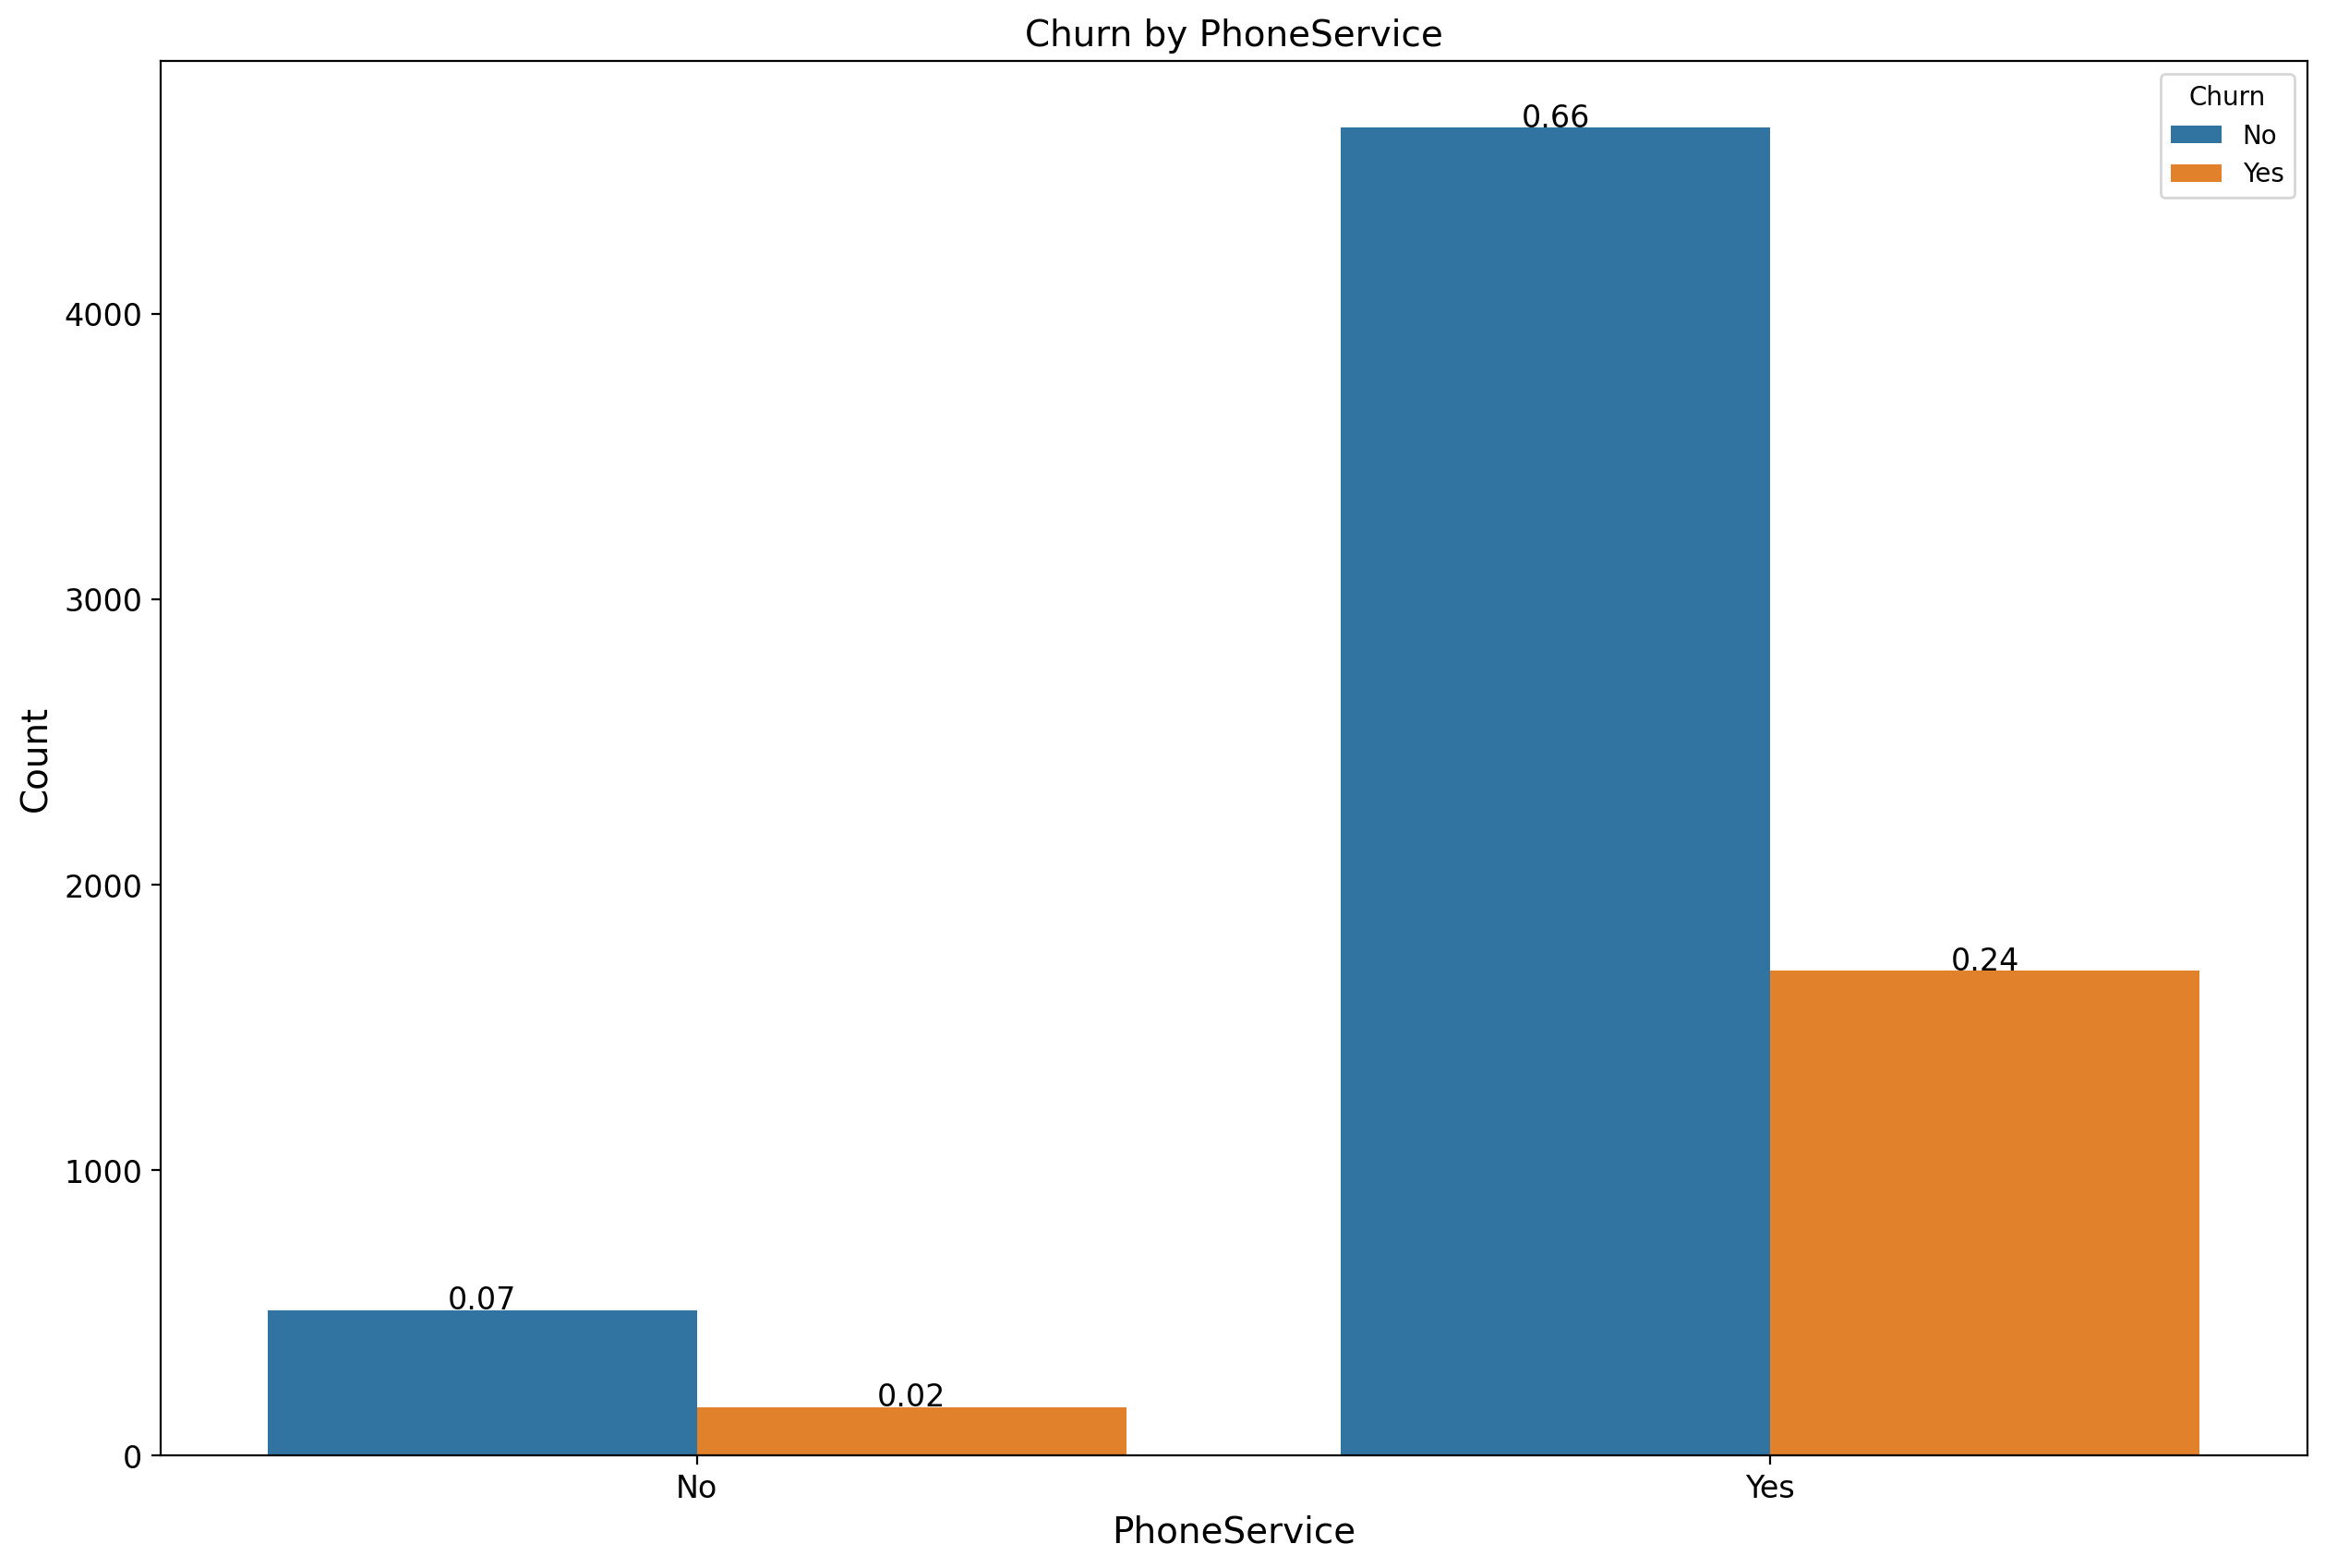

In [41]:
categoric_analysis(df,"PhoneService");

In [42]:
#contigency table
#H0 : There is not have relation between phone serivice and churn
#H1 :  There is have relation between phone service and Churn

phone_chi = pd.crosstab(index=df["PhoneService"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([phone_chi.iloc[0].values,phone_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Fail to reject Hypothesis Null, Because p-value is 0.34992398942431924


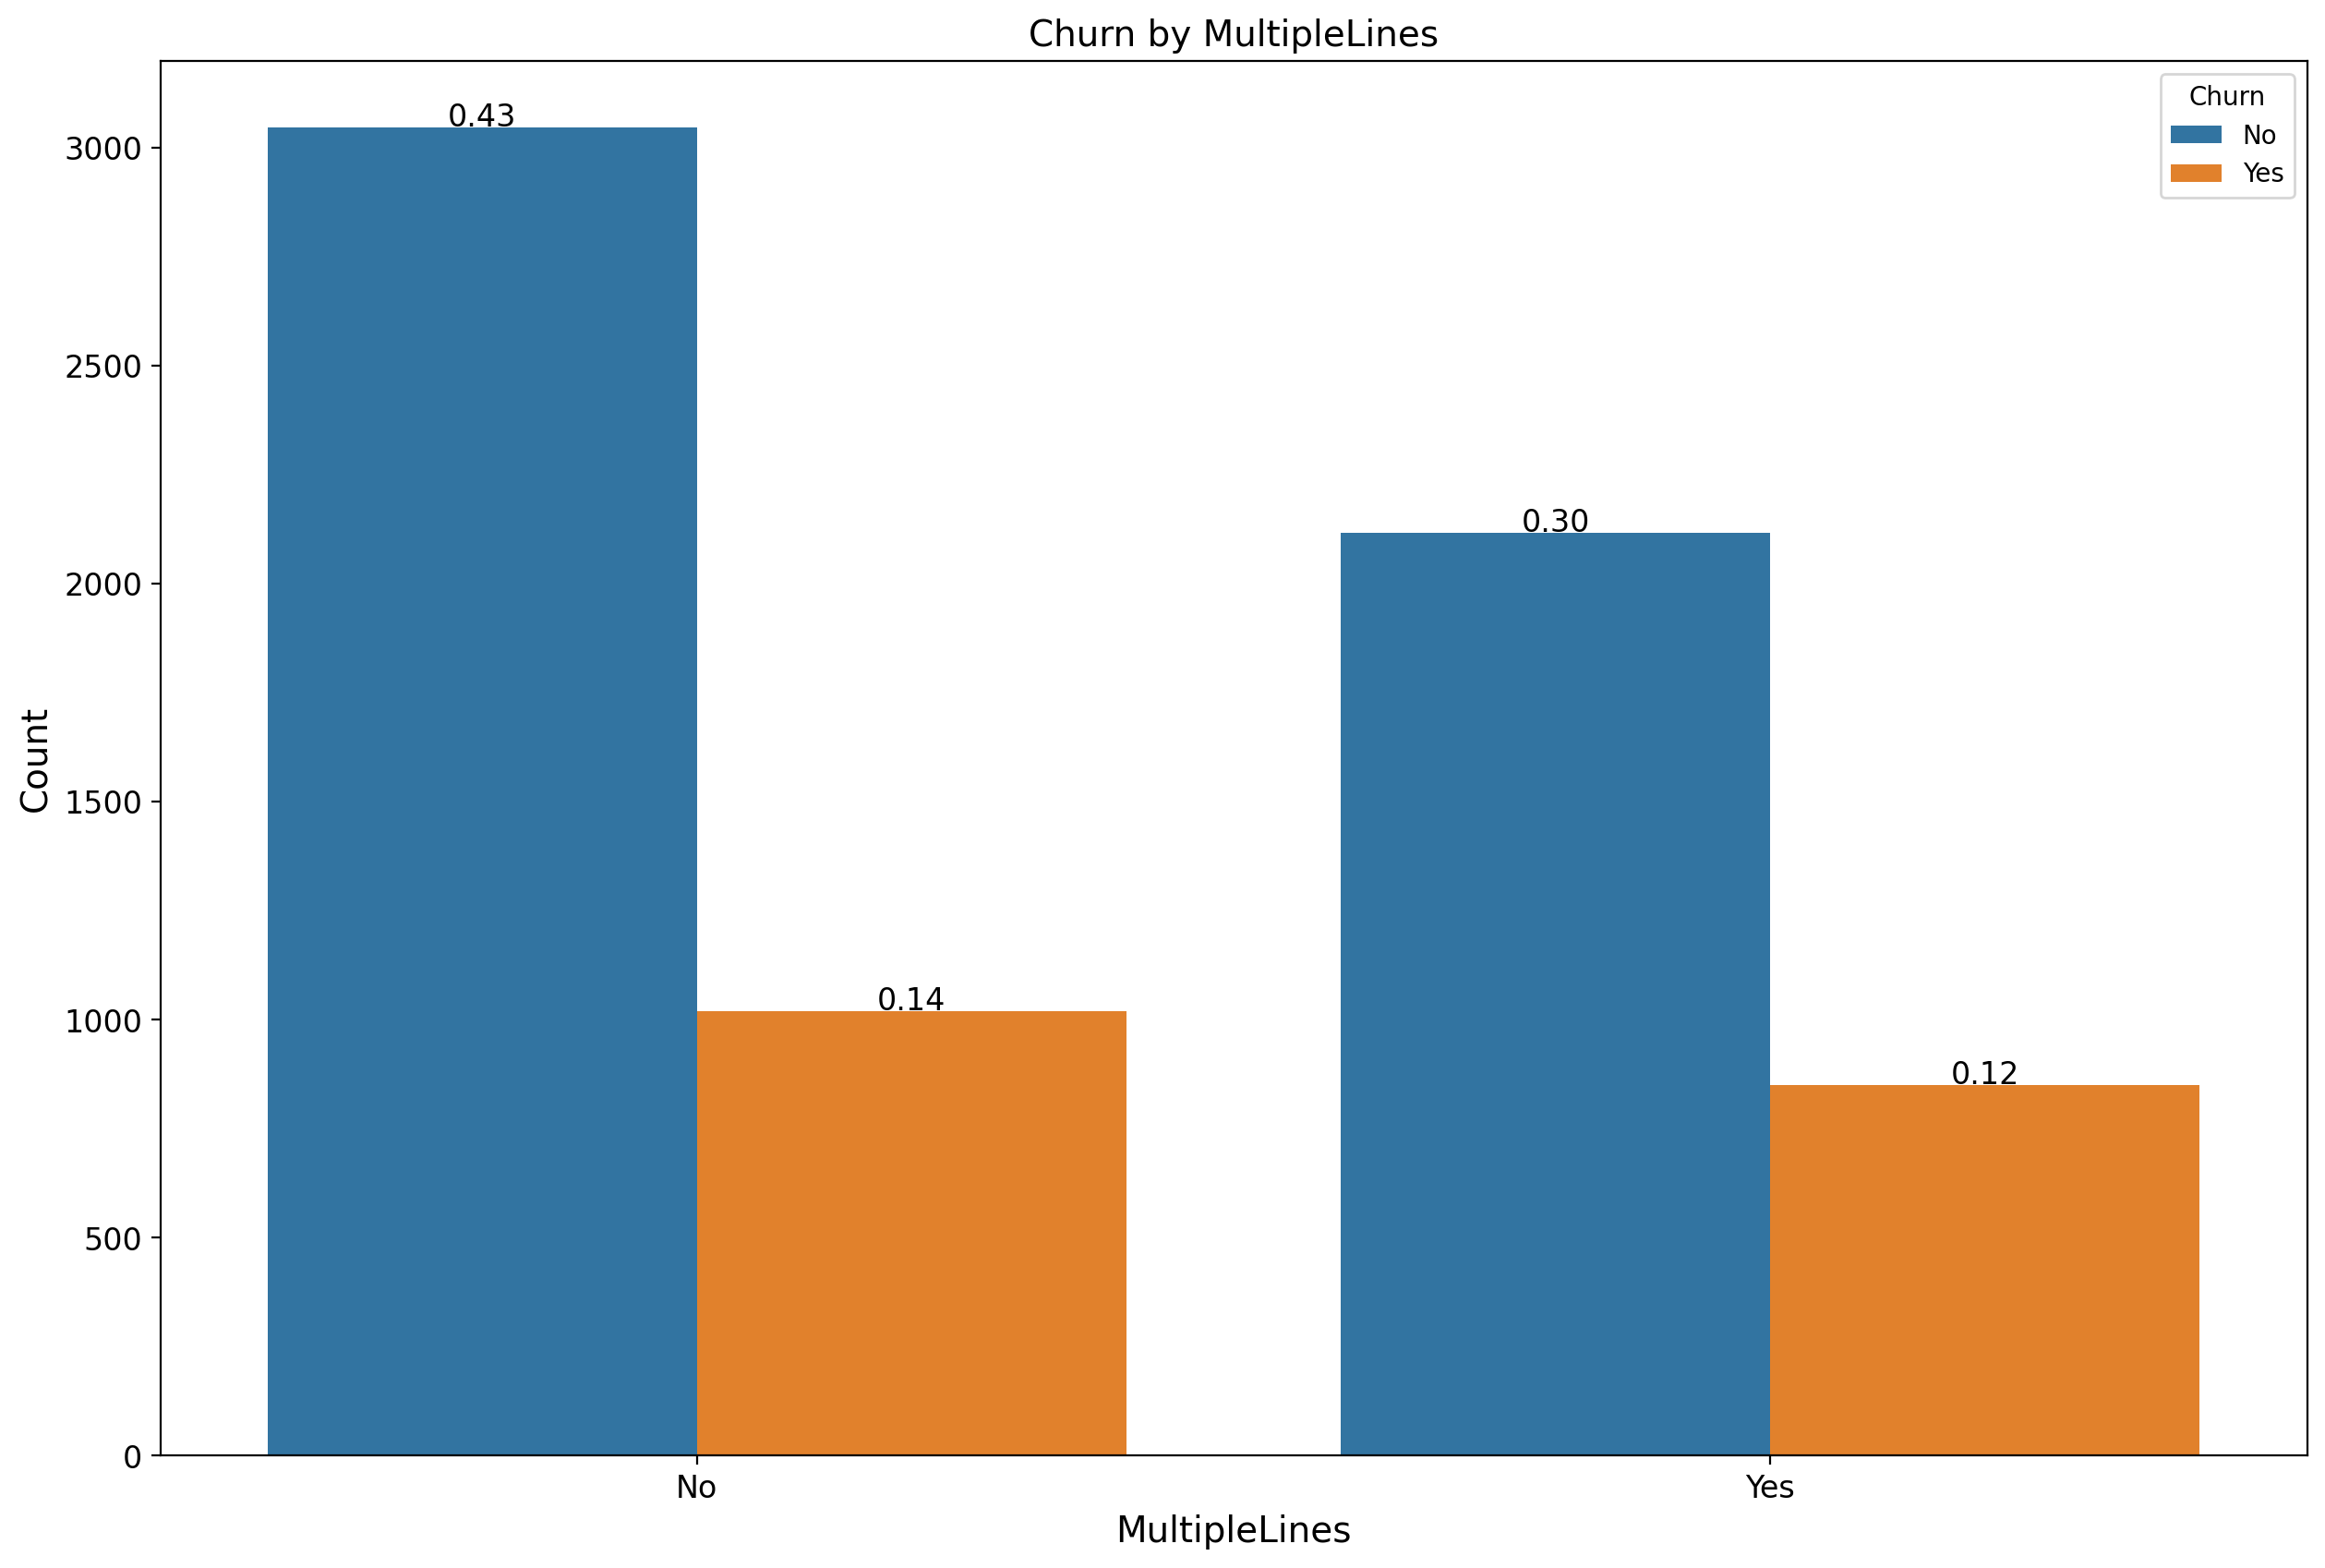

In [43]:
categoric_analysis(df,"MultipleLines");

In [44]:
#contigency table
#H0 : There is not have relation between multiple lines and churn
#H1 :  There is have relation between multiple lines and Churn

multiple_chi = pd.crosstab(index=df["MultipleLines"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([multiple_chi.iloc[0].values,multiple_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 0.0008694082815826175


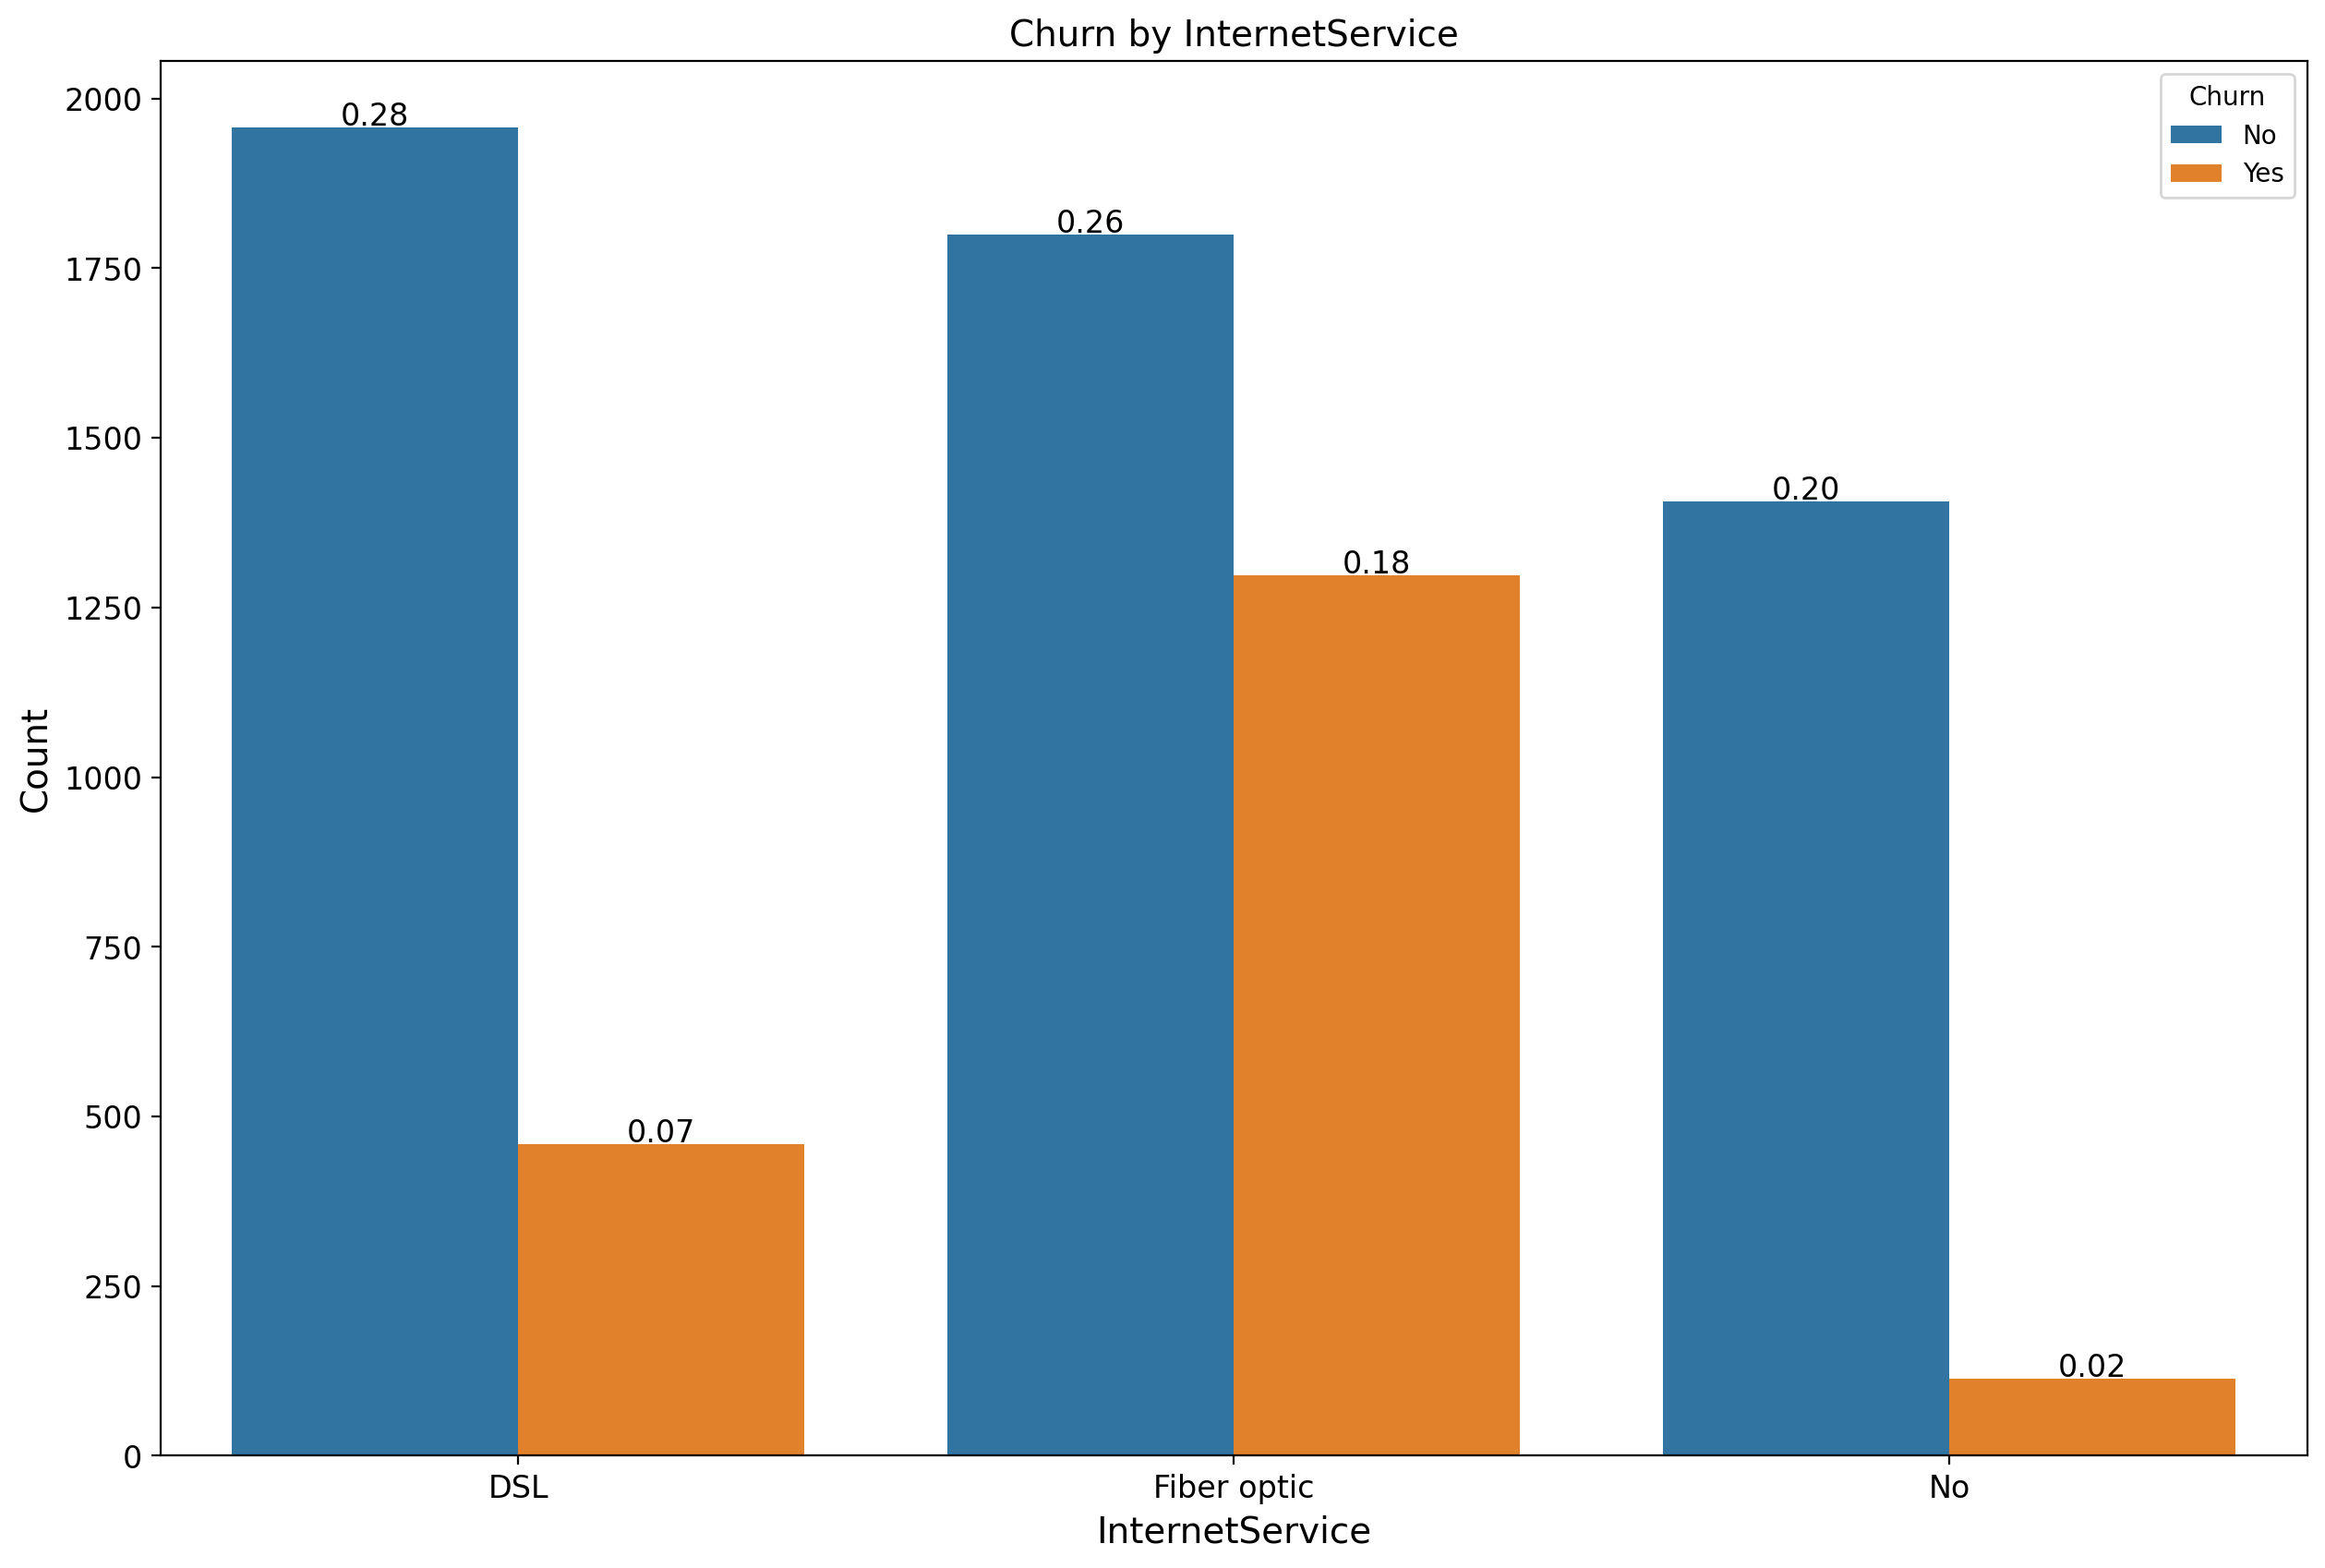

In [45]:
categoric_analysis(df,"InternetService");

In [46]:
#contigency table
#H0 : There is not have relation between Internet Service and churn
#H1 :  There is have relation between Internet Service and Churn

internet_chi = pd.crosstab(index=df["InternetService"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([internet_chi.iloc[0].values,internet_chi.iloc[1].values,
                                      internet_chi.iloc[2].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 5.831198962237274e-159


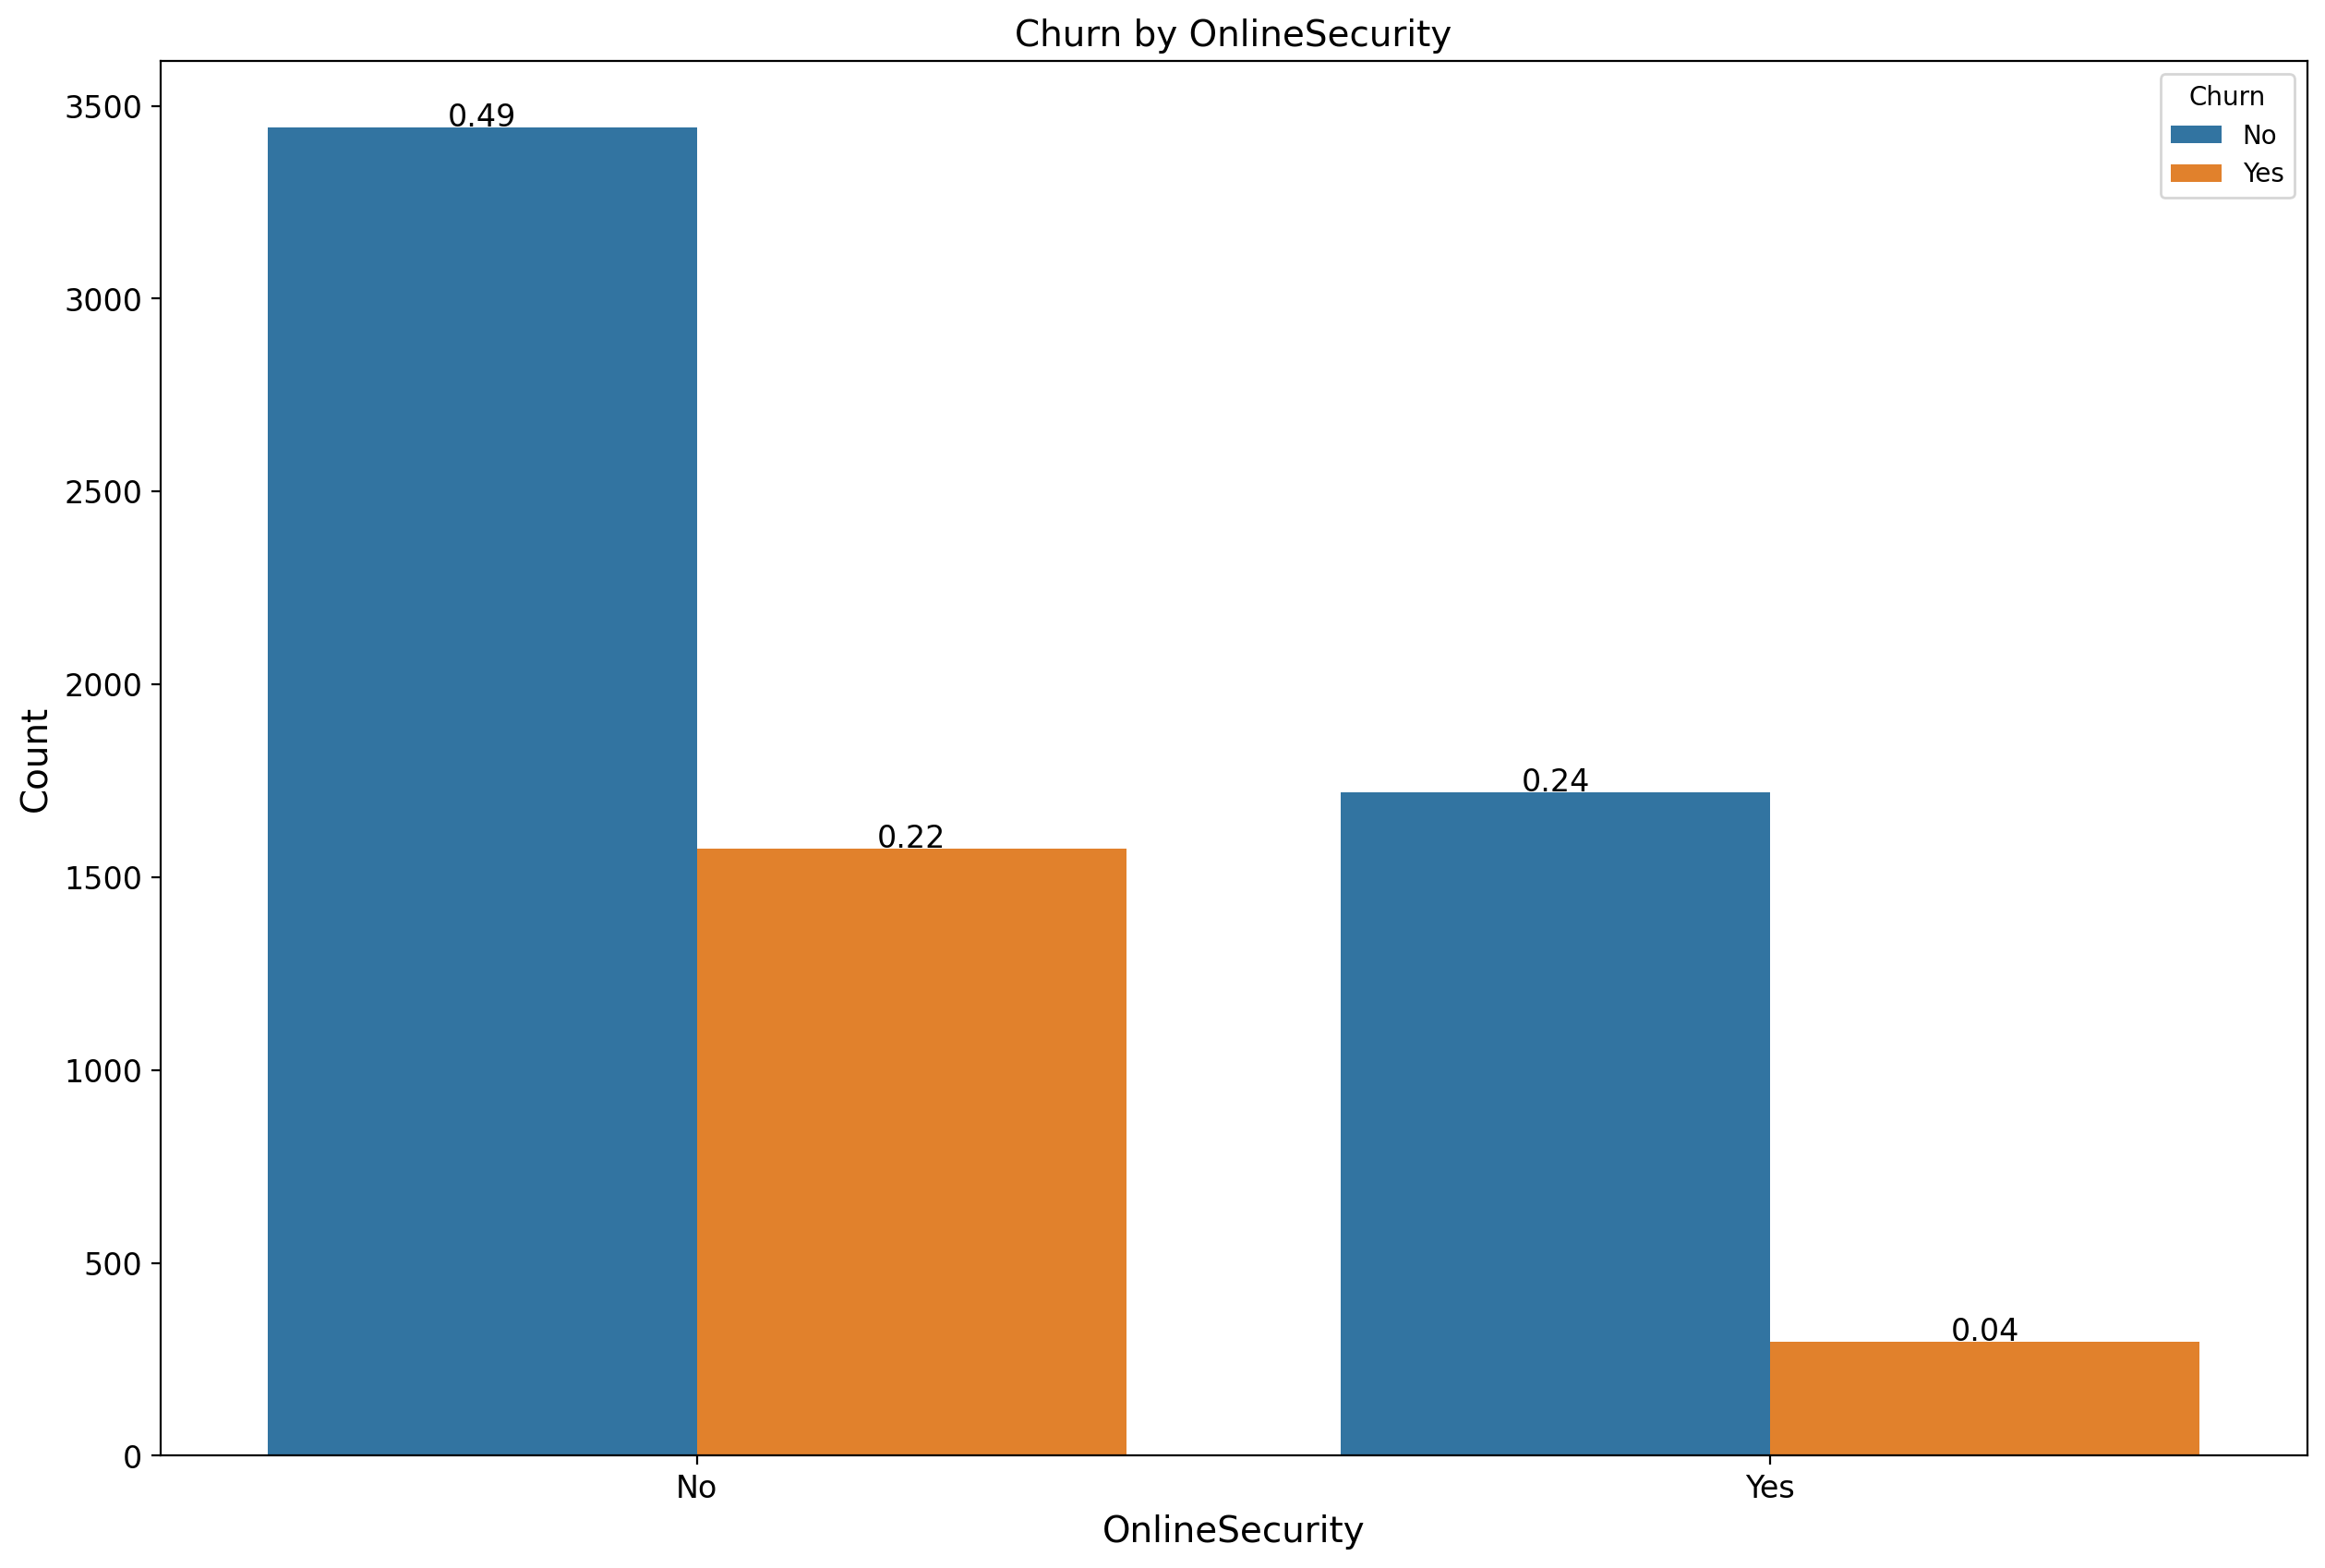

In [47]:
categoric_analysis(df,"OnlineSecurity");

In [48]:
#contigency table
#H0 : There is not have relation between Online Security and churn
#H1 :  There is have relation between Online Security and Churn

OS_chi = pd.crosstab(index=df["OnlineSecurity"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([OS_chi.iloc[0].values,OS_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 1.37424000884718e-46


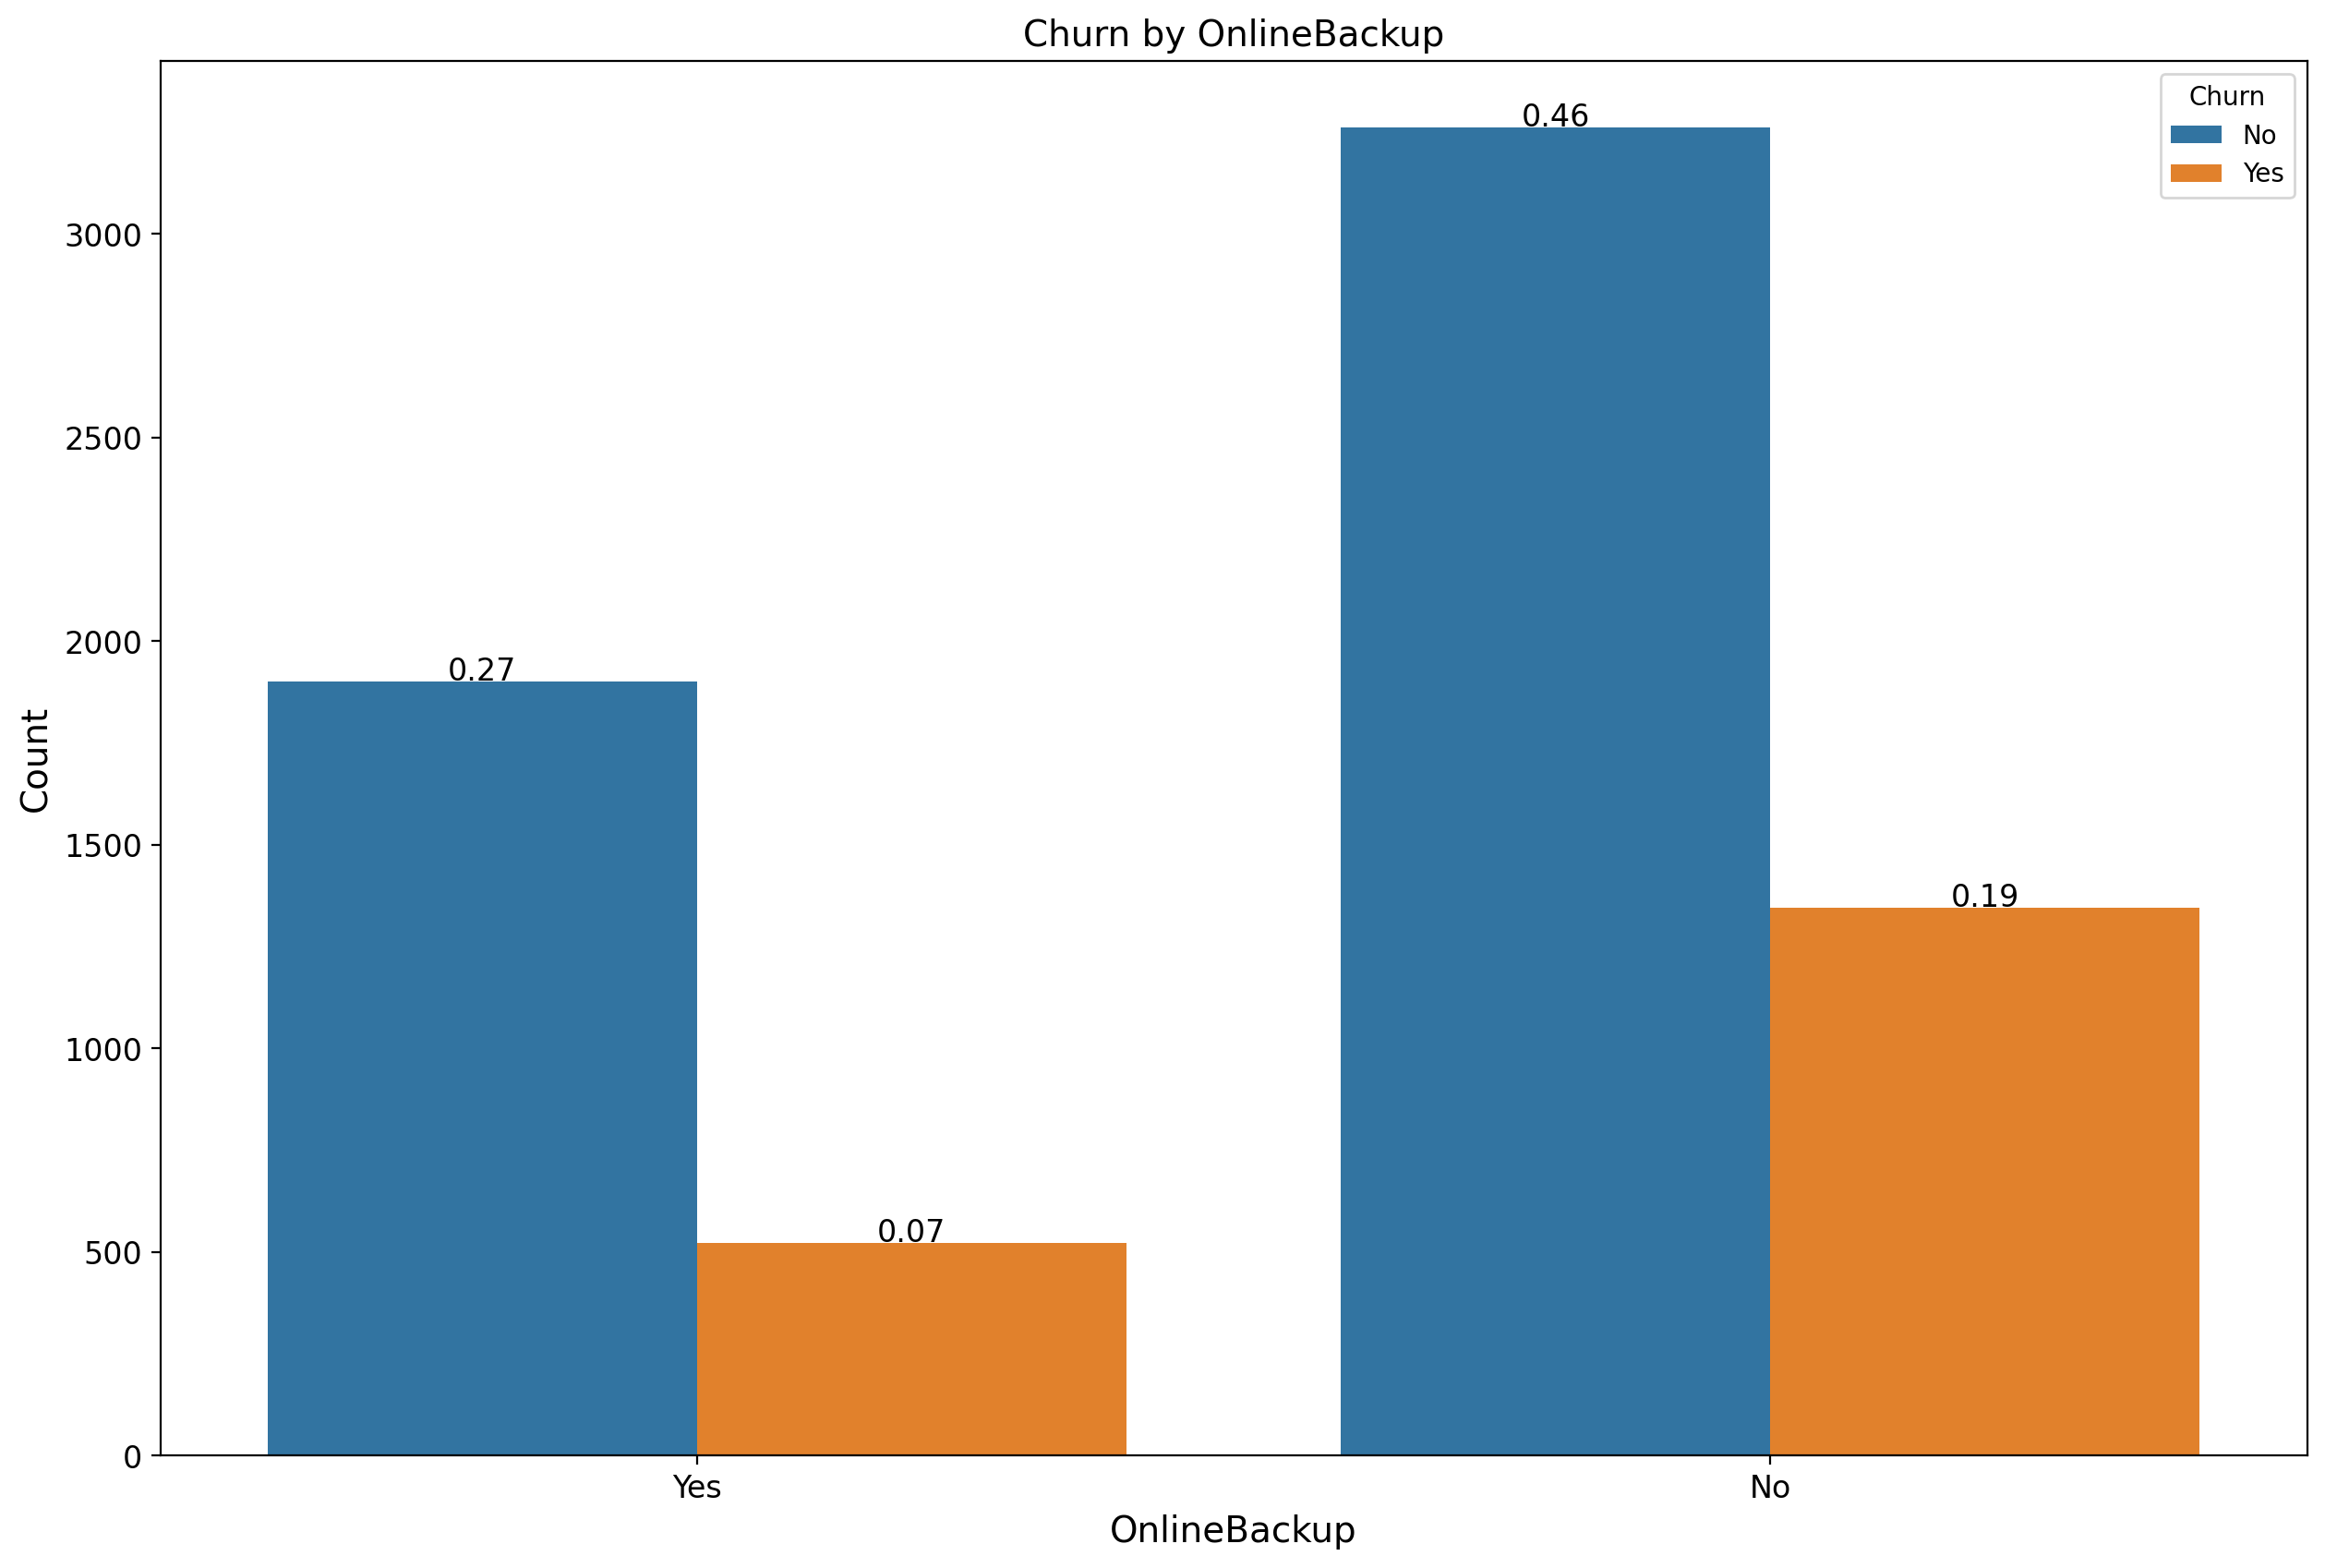

In [49]:
categoric_analysis(df,"OnlineBackup");

In [50]:
#contigency table
#H0 : There is not have relation between Online Backup and churn
#H1 :  There is have relation between Online Backup and Churn

OB_chi = pd.crosstab(index=df["OnlineBackup"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([OB_chi.iloc[0].values,OB_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 6.259257129714726e-12


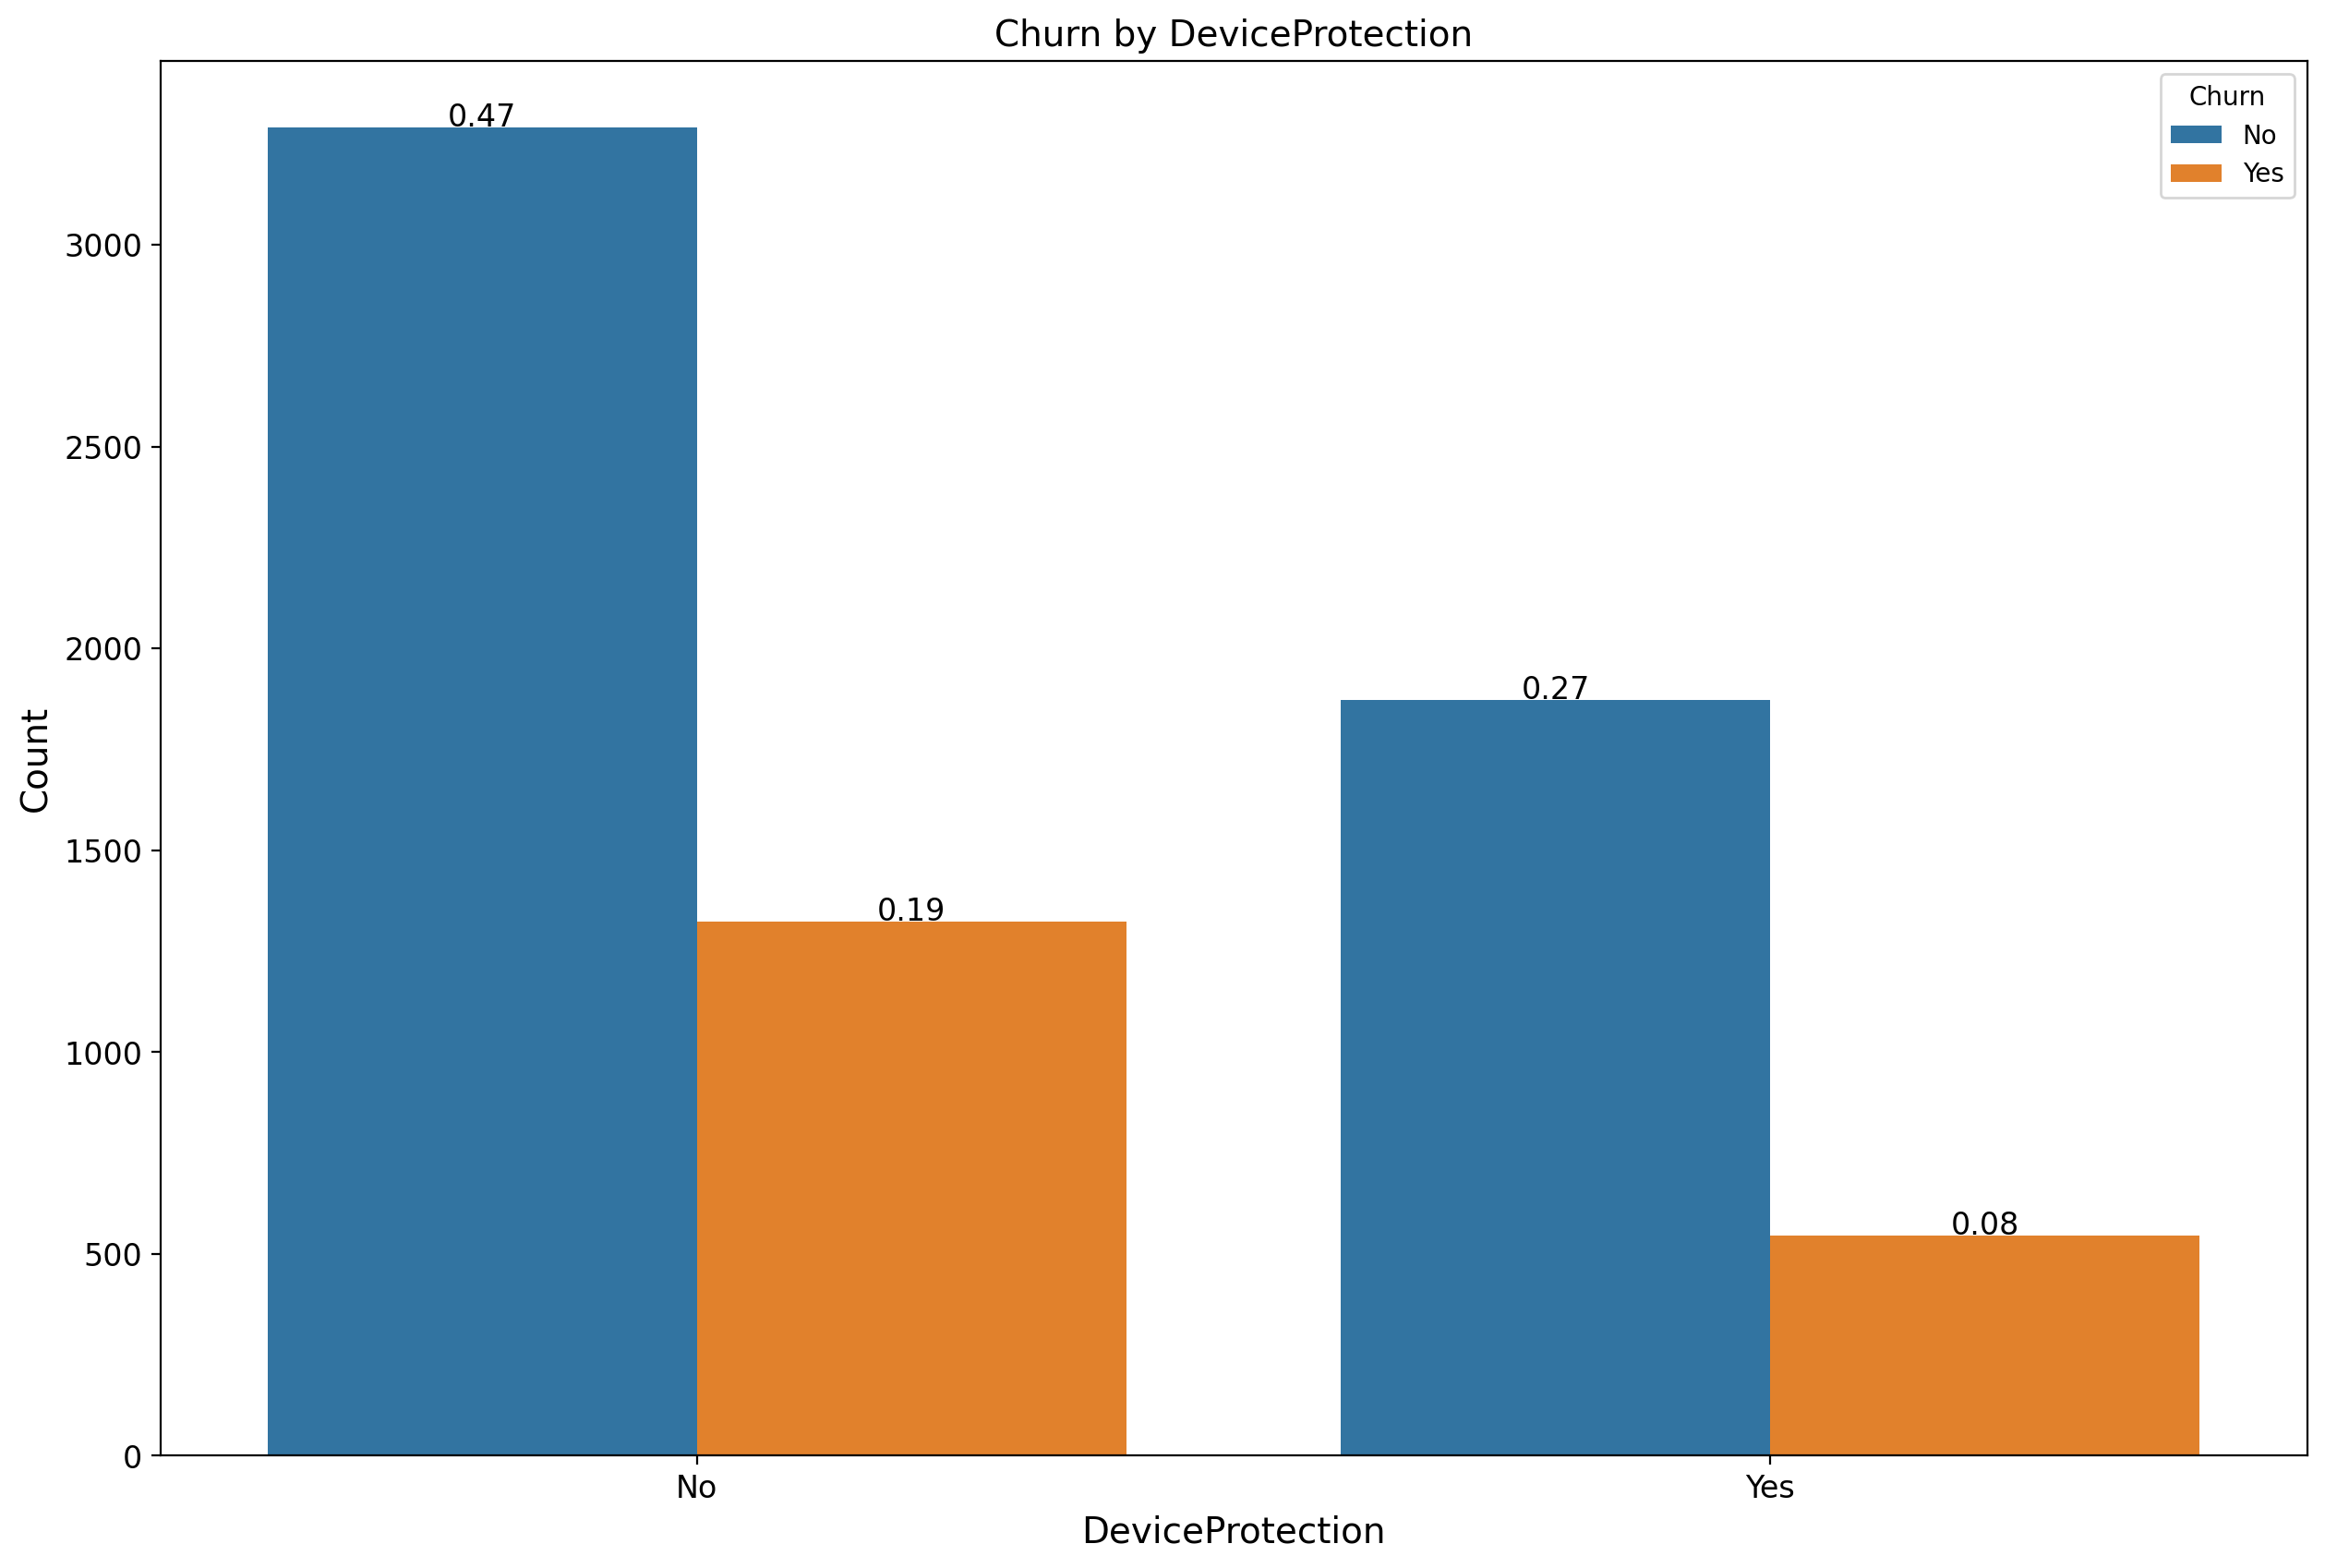

In [51]:
categoric_analysis(df,"DeviceProtection");

In [52]:
#contigency table
#H0 : There is not have relation between Device Protection and churn
#H1 :  There is have relation between Device Protection and Churn

DP_chi = pd.crosstab(index=df["DeviceProtection"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([DP_chi.iloc[0].values,DP_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 3.346074945648779e-08


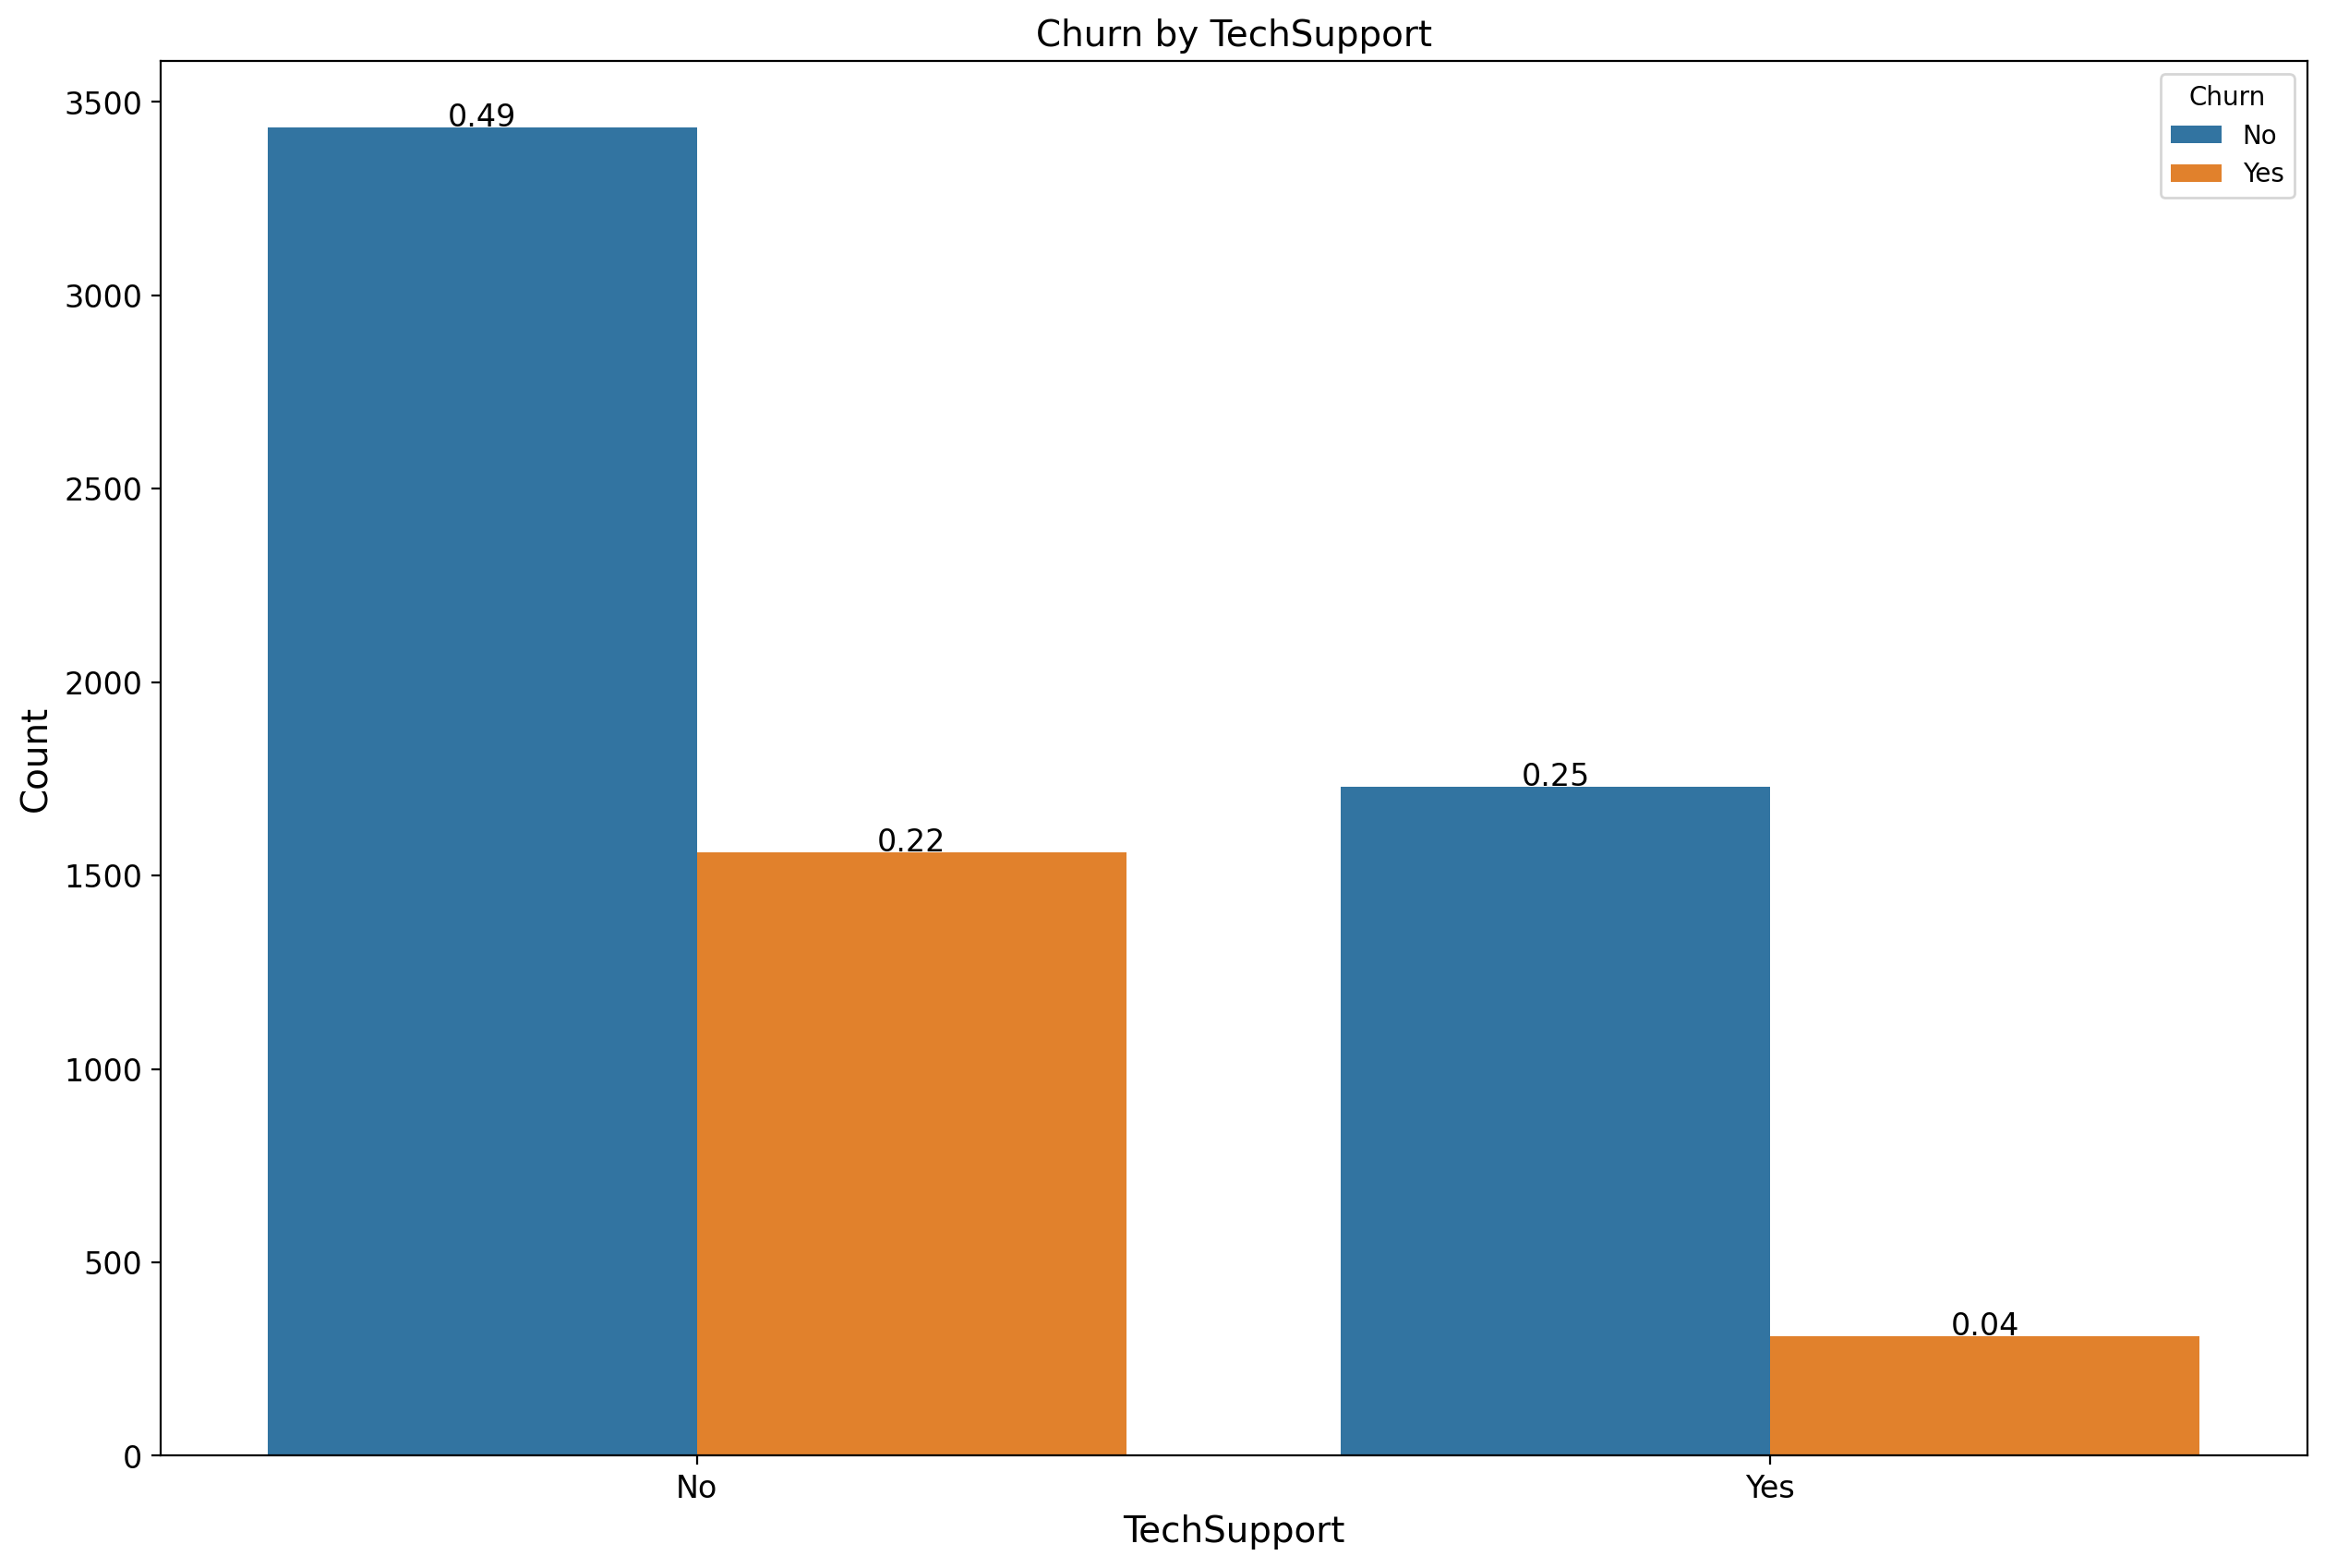

In [53]:
categoric_analysis(df,"TechSupport");

In [54]:
#contigency table
#H0 : There is not have relation between Device Protection and churn
#H1 :  There is have relation between Device Protection and Churn

TC_chi = pd.crosstab(index=df["TechSupport"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([TC_chi.iloc[0].values,TC_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 3.2328683255491206e-43


# Analysis Churn by Streaming

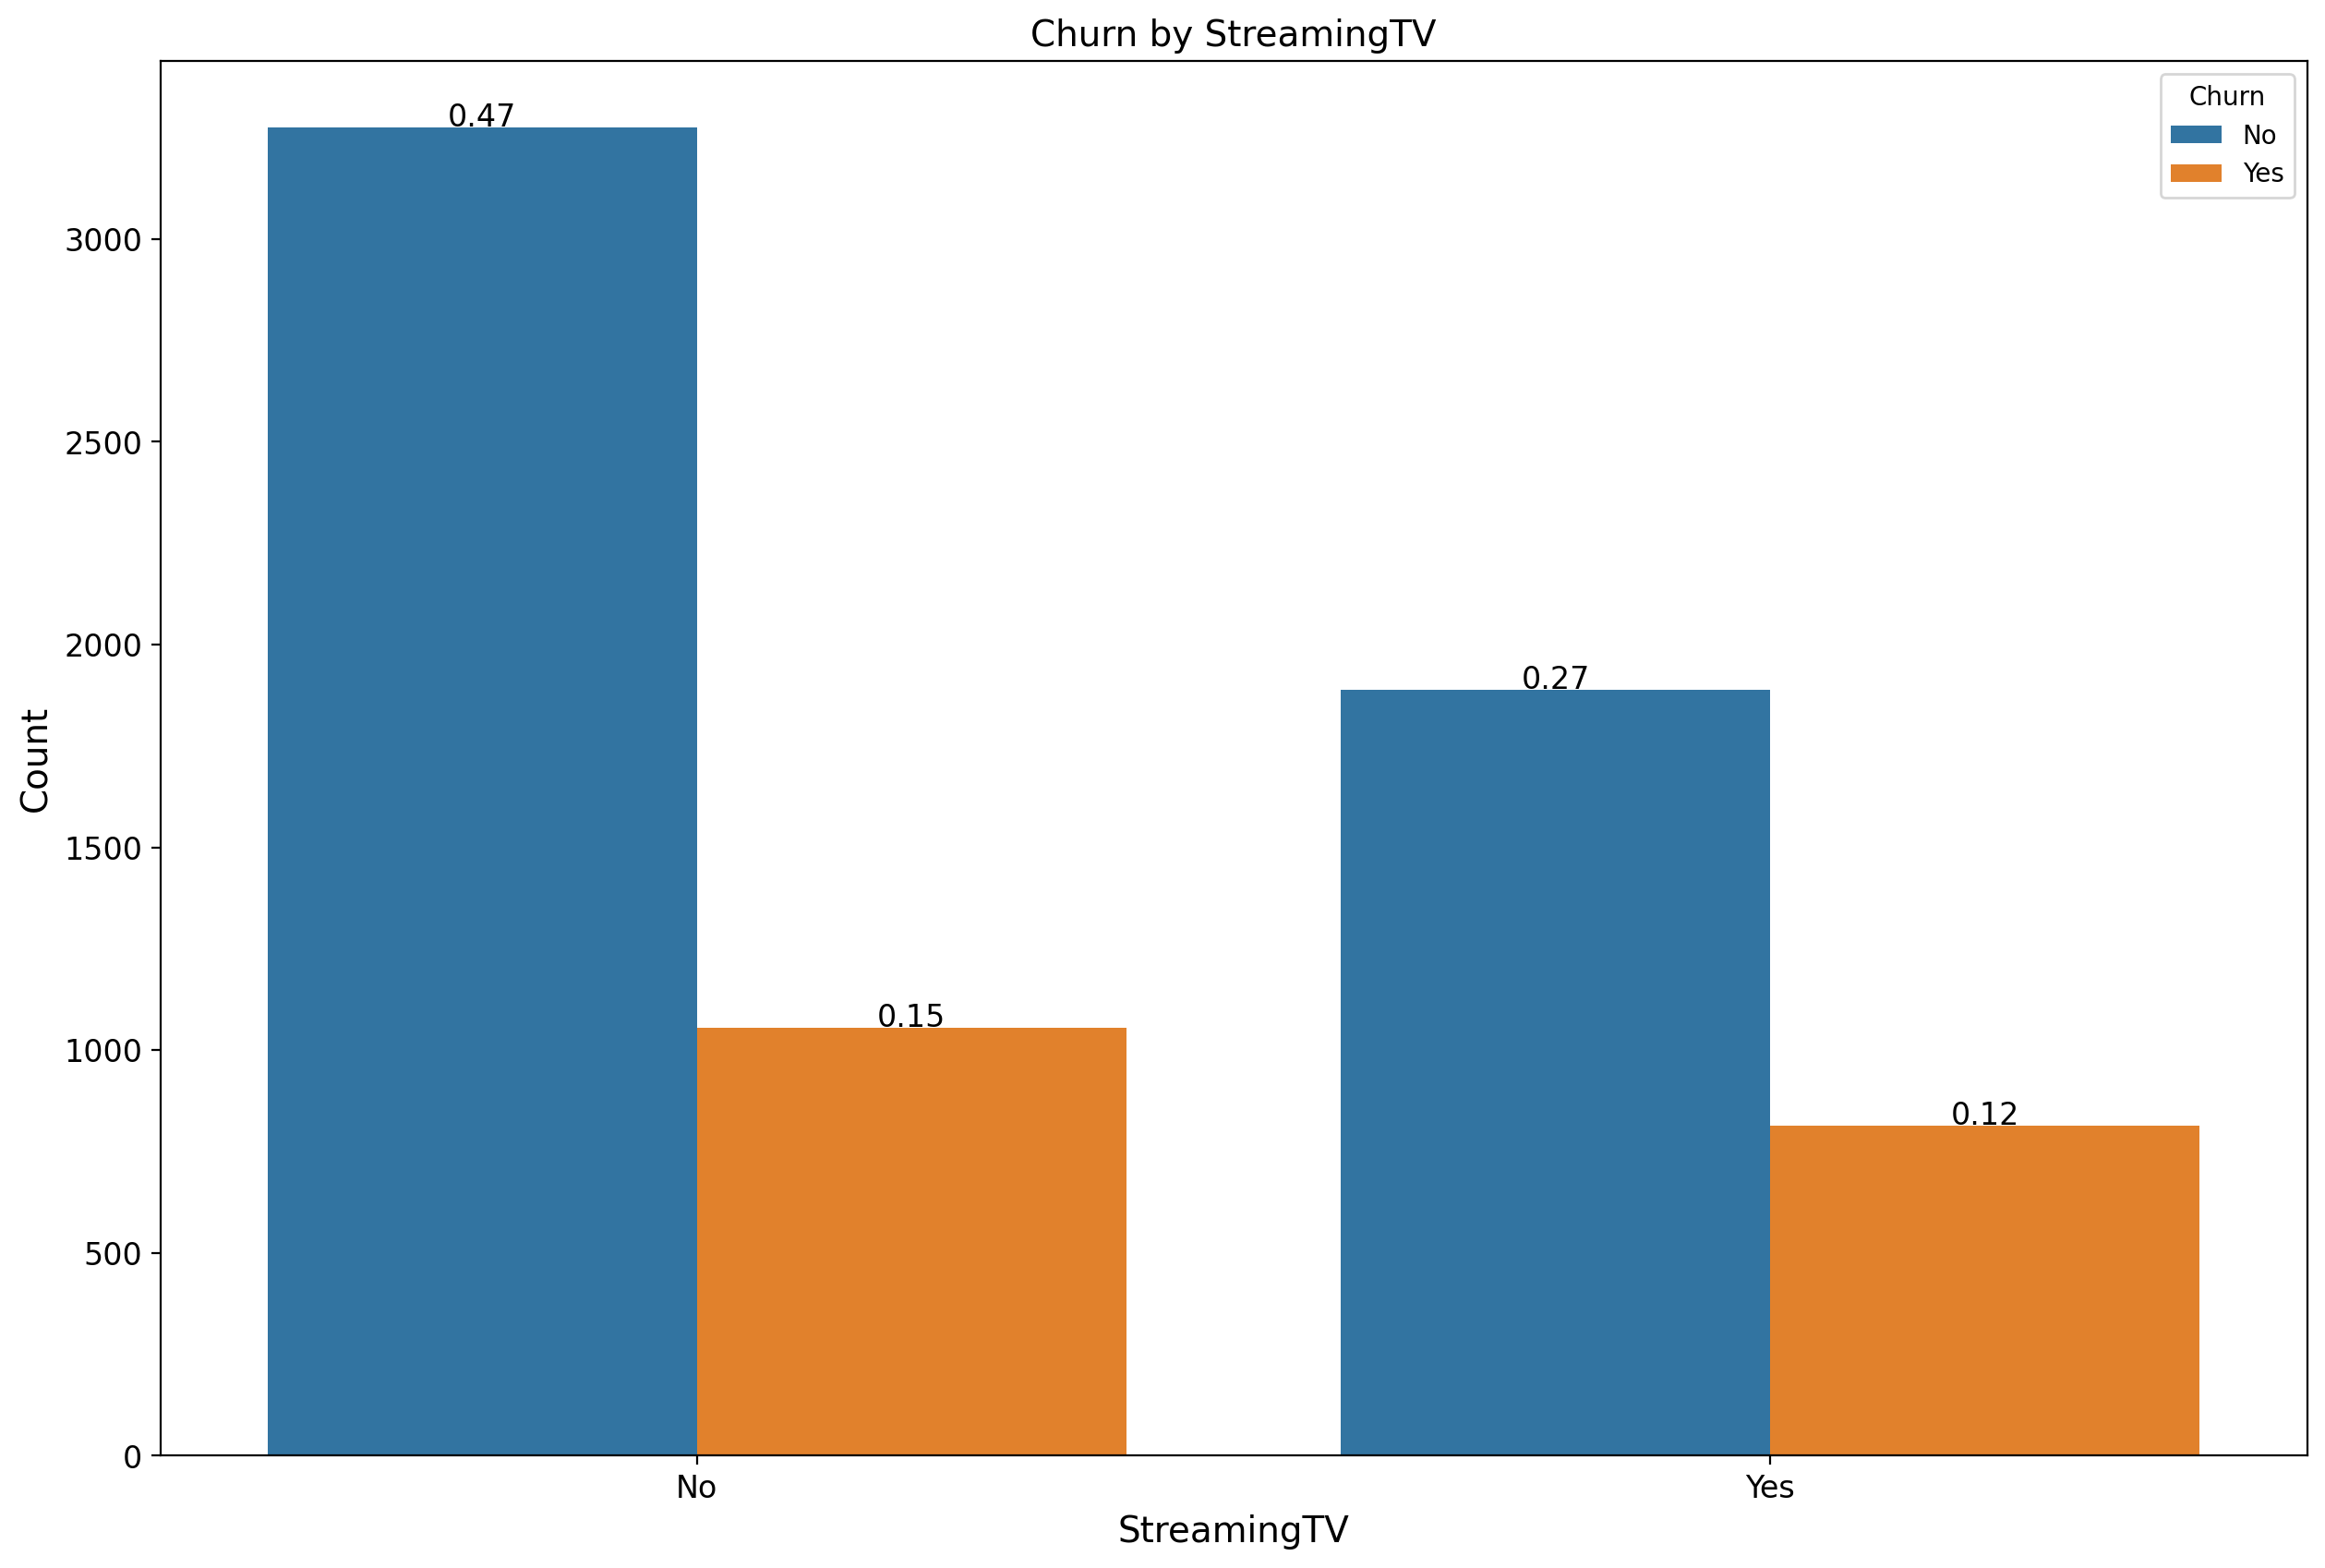

In [55]:
categoric_analysis(df,"StreamingTV");

In [56]:
#contigency table
#H0 : There is not have relation between Streaming TV and churn
#H1 :  There is have relation between Streaming TV and Churn

STV_chi = pd.crosstab(index=df["StreamingTV"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([STV_chi.iloc[0].values,STV_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 1.3164336109407092e-07


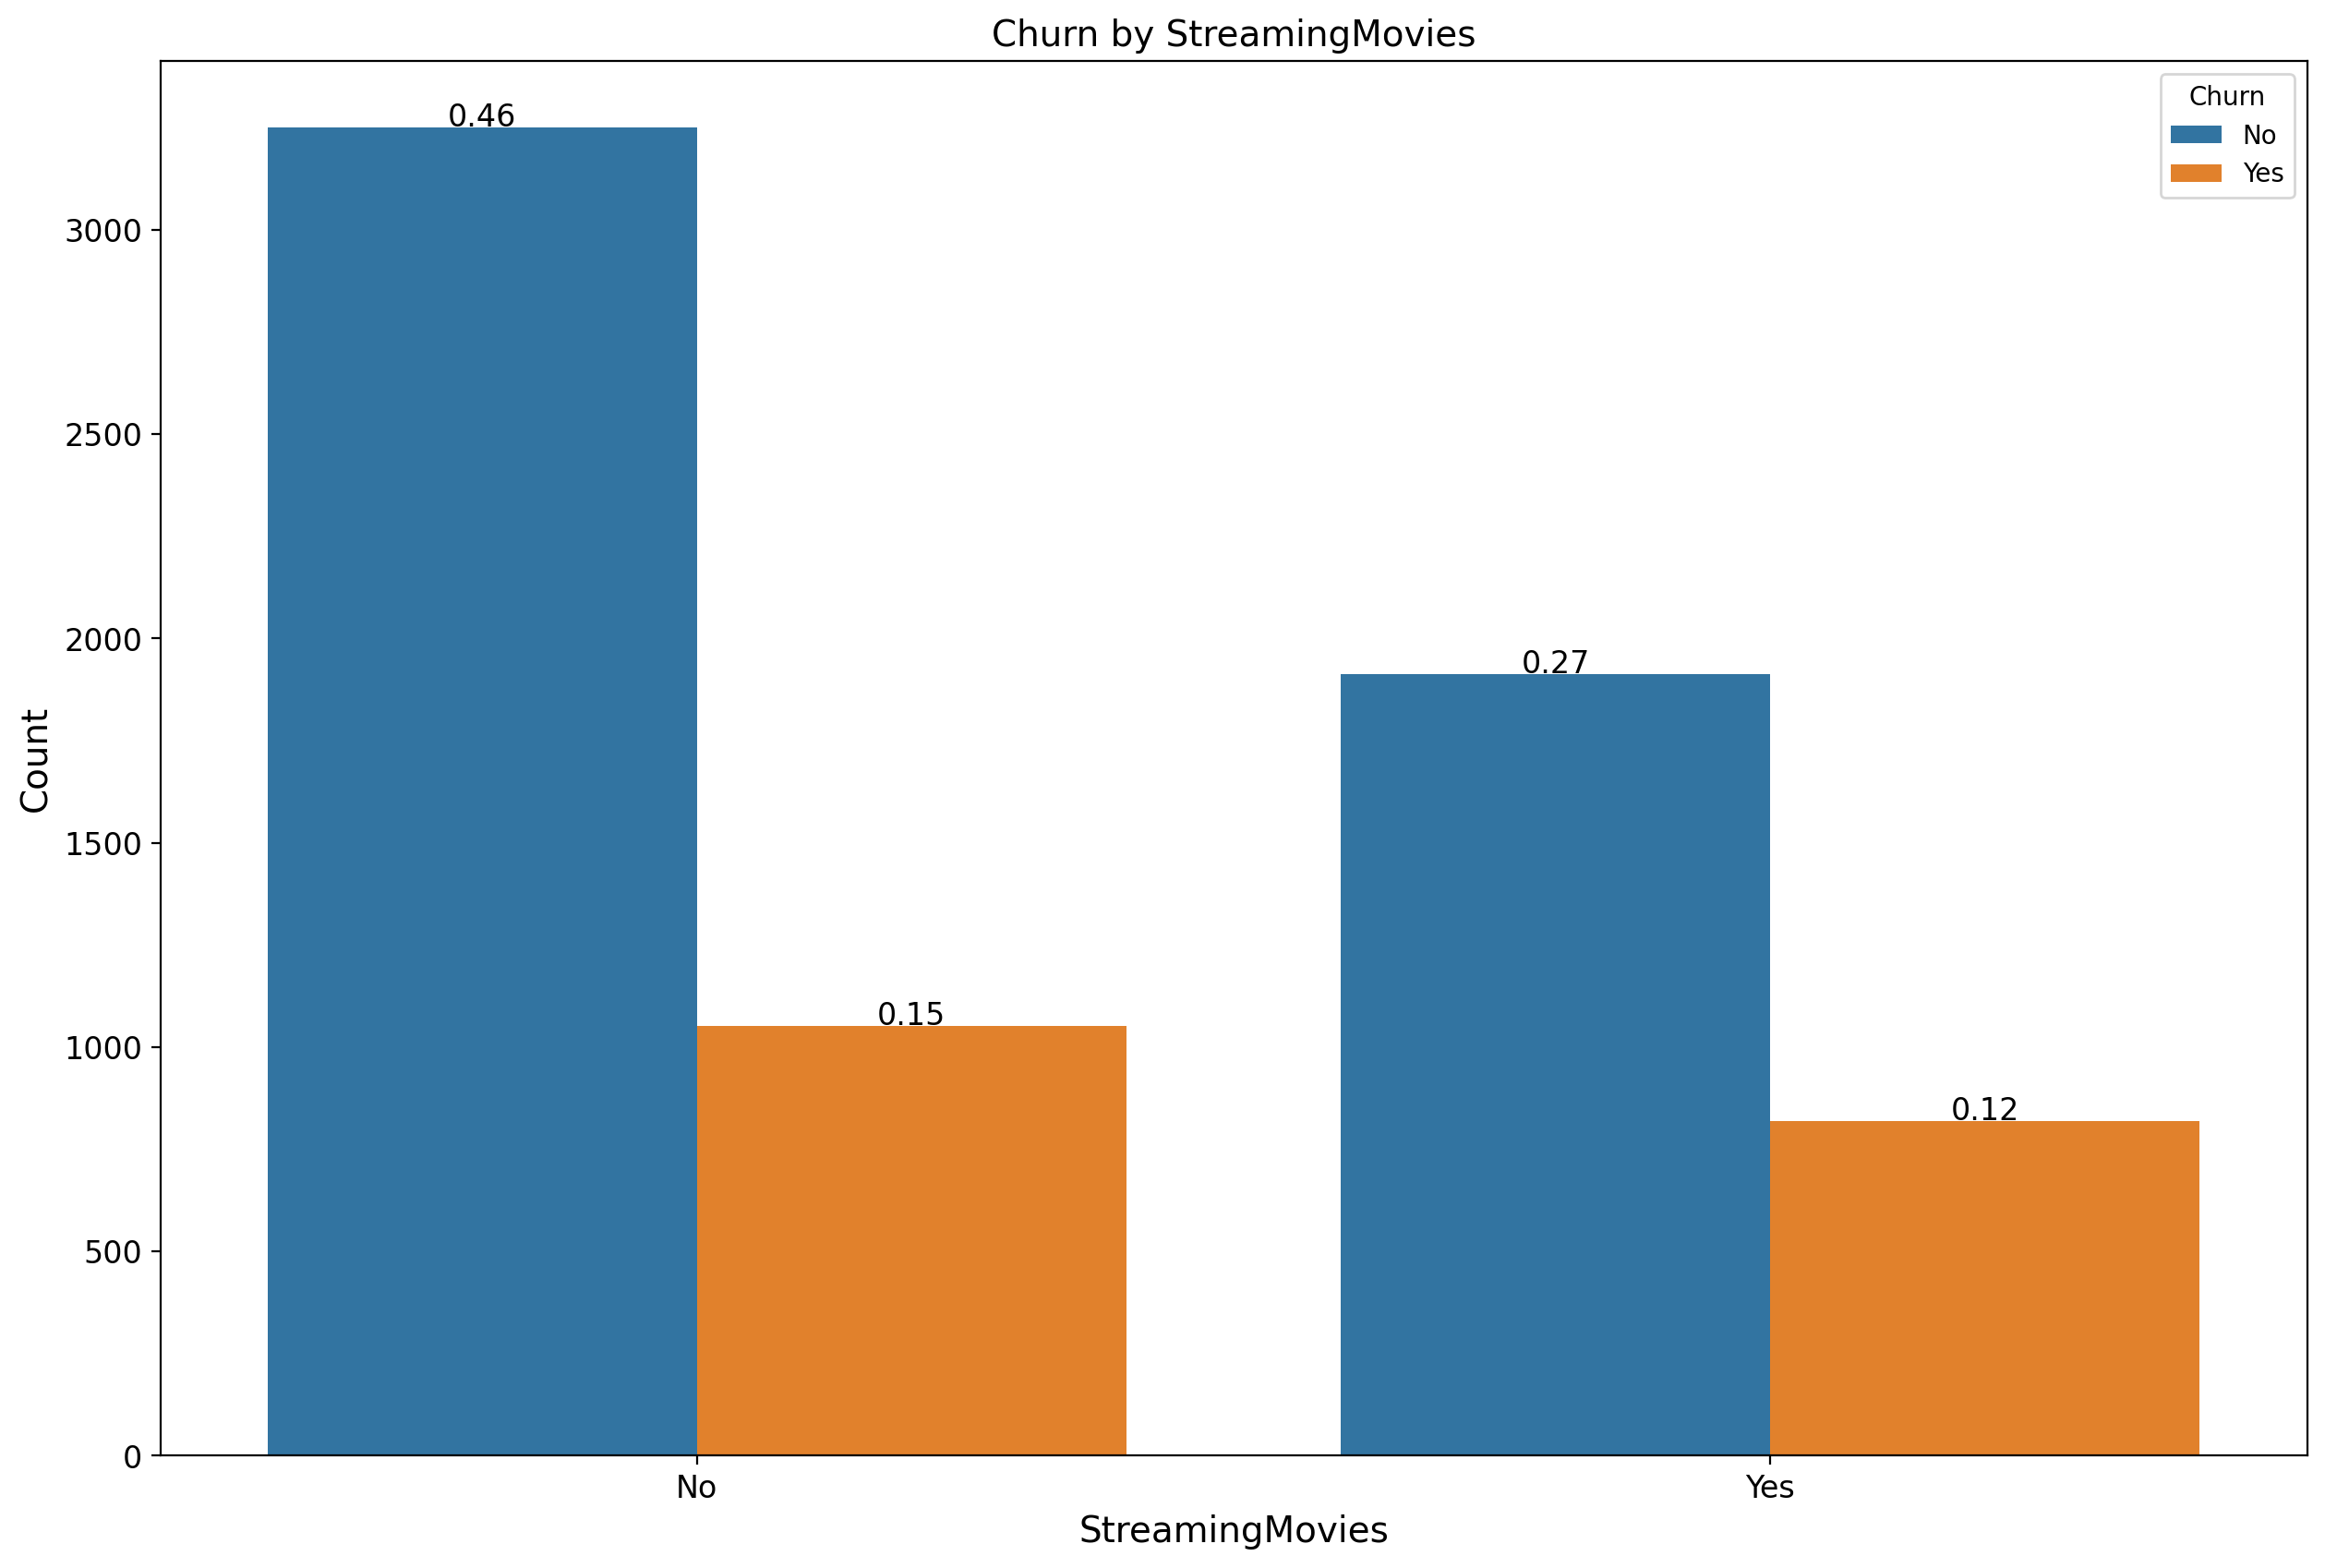

In [57]:
categoric_analysis(df,"StreamingMovies");

In [58]:
#contigency table
#H0 : There is not have relation between Streaming Movies and churn
#H1 :  There is have relation between Streaming Movies and Churn

STM_chi = pd.crosstab(index=df["StreamingMovies"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([STM_chi.iloc[0].values,STM_chi.iloc[1].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 3.857900347663822e-07


# Churn Analysis By Tenure

In [59]:
#convert Churn to numeric, 1=churn and vice versa
df["Churn"] = df["Churn"].apply(lambda x:1 if x =="Yes" else 0)

tenure  = df.groupby("tenure")["Churn"].mean()

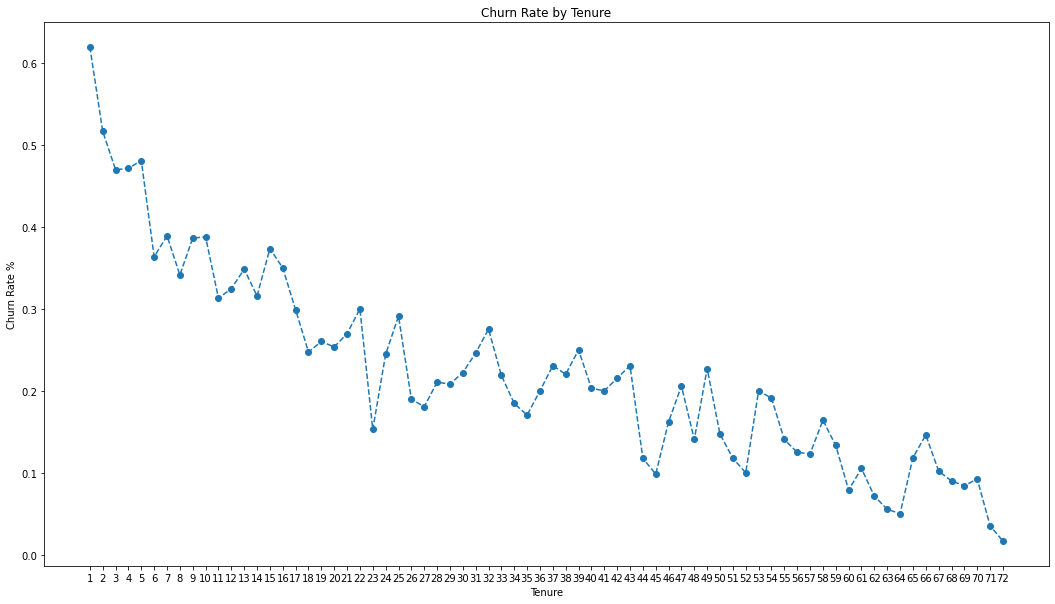

In [60]:
tenure.plot(figsize=(18,10),
            marker="o",
            linestyle="--",
            title="Churn Rate by Tenure",ylabel="Churn Rate %",xlabel="Tenure")
plt.xticks(tenure.index);

Tenure memiliki hubungan dengan churn, terlihat dari grafik lineplot bahwa ketika customer memiliki tenure yang lama dengan perusahaan, maka churn rate akan mengalami penurunan

In [61]:
#binning Tenure
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Month'

In [62]:
df["Tenure Group"] = df["tenure"].apply(cohort)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7027           Yes             DSL            Yes           No   
7028           Yes     Fiber optic             No          Yes   
7029            No             DSL            Yes           No   
7030           Yes     Fiber optic             No           No   
7031            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7027              Yes               Mailed check           84.80   
7028              Yes    Credit card (automatic)          103.20   
7029              Yes           Electronic check           29.60   
7030              Yes               Mailed check           74.40   
7031              Yes  Bank transfer (automatic)          105.65   

      TotalCharges  Churn   Tenure Group  
0            29.85      0    0-12 Months  
1          1889.50      0   24-48 Months  
2           108.15      1    0-12 Months  
3          1840.75      0   24-48 Months  
4           151.65      1    0-12 Months  
...            ...    ...            ...  
7027       1990.50      0   12-24 Months  
7028       7362.90      0  Over 48 Month  
7029        346.45      0    0-12 Months  
7030        306.60      1    0-12 Months  
7031       6844.50      0  Over 48 Month  

[7032 rows x 21 columns]

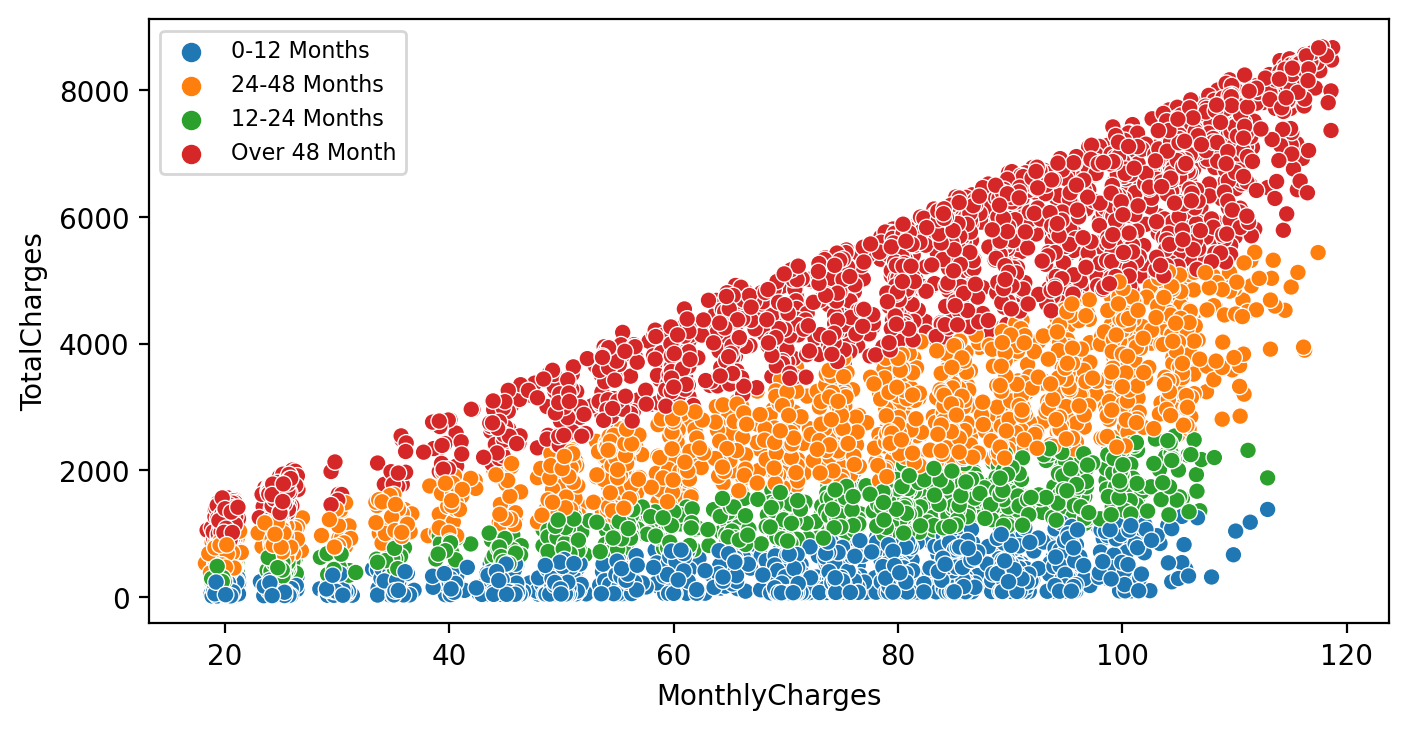

In [63]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue="Tenure Group")
plt.legend(fontsize=8)

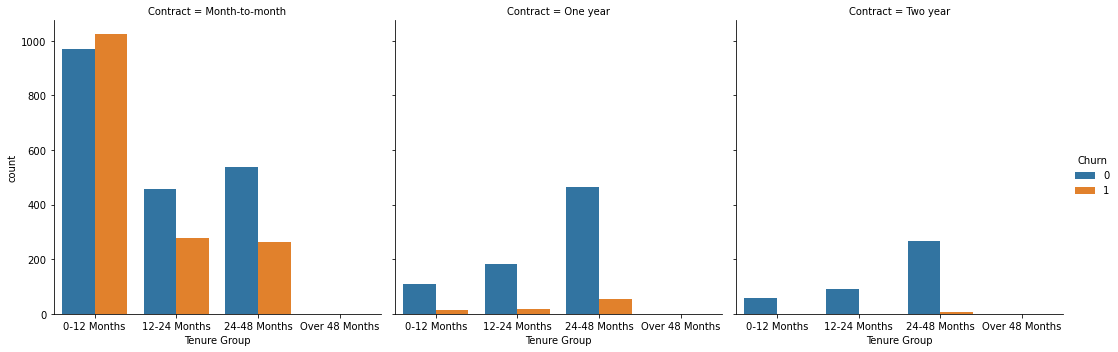

In [64]:
sns.catplot(data=df,x="Tenure Group",hue="Churn",kind='count',
           col="Contract",order=['0-12 Months','12-24 Months','24-48 Months','Over 48 Months'])

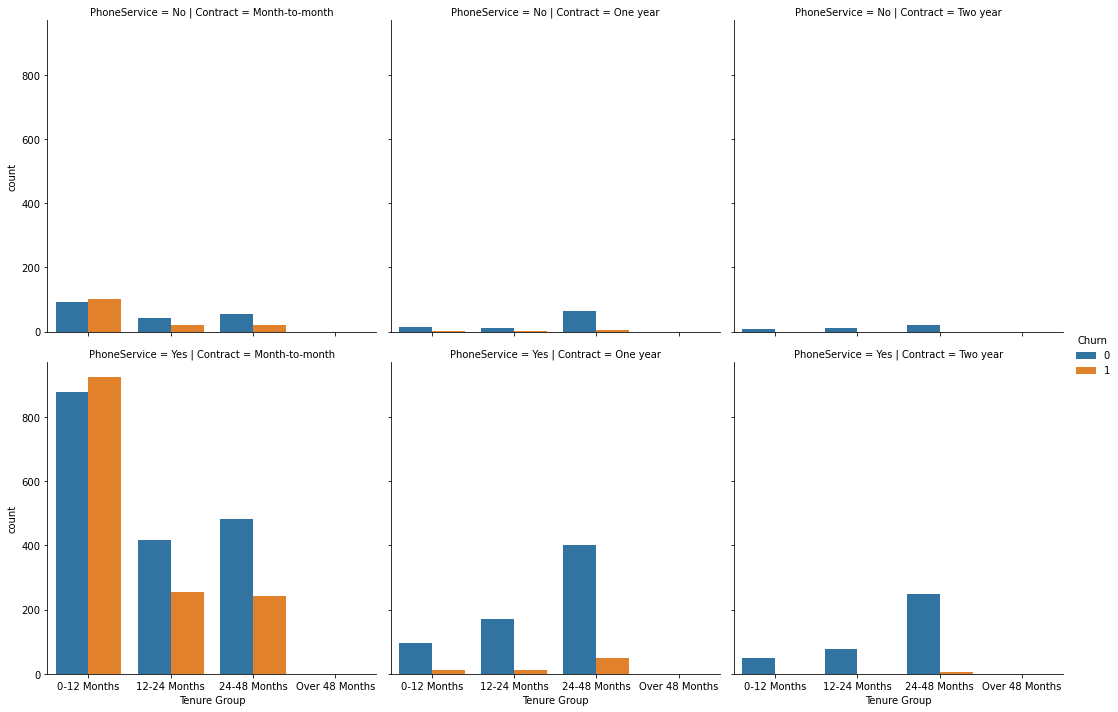

In [65]:
sns.catplot(data=df,x="Tenure Group",hue="Churn",kind='count',
           col="Contract",
            row="PhoneService",
            order=['0-12 Months','12-24 Months','24-48 Months','Over 48 Months'])

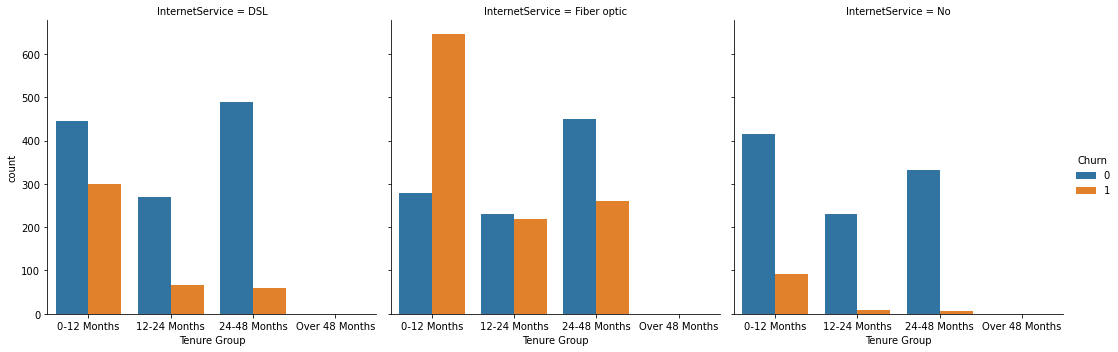

In [66]:
sns.catplot(data=df,x="Tenure Group",hue="Churn",kind='count',
           col="InternetService",
            order=['0-12 Months','12-24 Months','24-48 Months','Over 48 Months'])

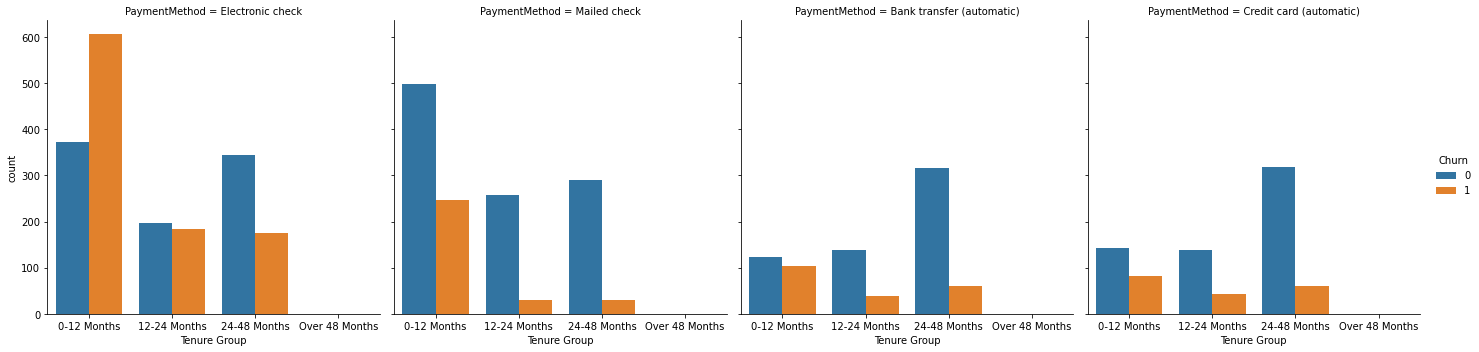

In [67]:
sns.catplot(data=df,x="Tenure Group",hue="Churn",kind='count',
           col="PaymentMethod",
            order=['0-12 Months','12-24 Months','24-48 Months','Over 48 Months'])

<AxesSubplot:>

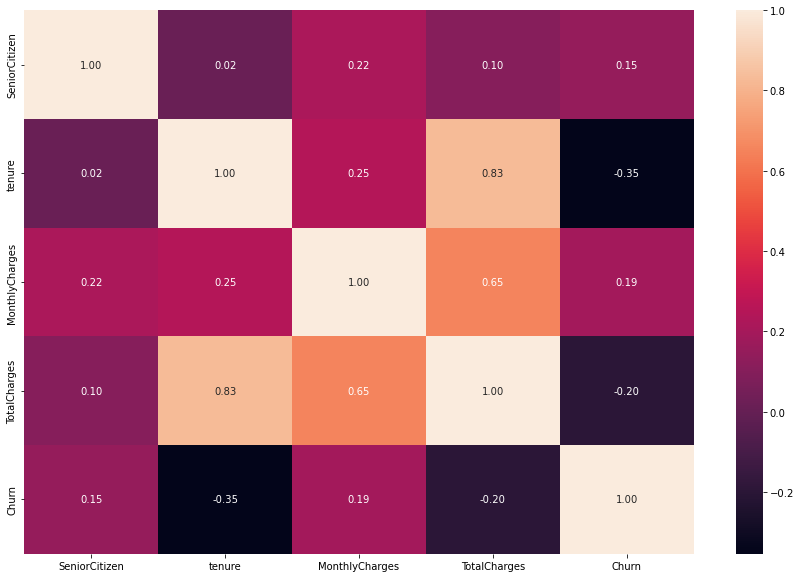

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# Data Preprocessing

In [69]:
#automating calculations
def woe_discrete(df,discrete_variable_name,churn_yes_no_variable_df):
    df = pd.concat([df[discrete_variable_name],churn_yes_no_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                     df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_churn']
    df['prop_n_obs'] = df["n_obs"]/df["n_obs"].sum()
    df["n_churn_yes"] = df["prop_churn"]*df["n_obs"]
    df["n_churn_no"] = (1-df["prop_churn"])*df["n_obs"]
    df["prop_n_churn_yes"] = df["n_churn_yes"]/df["n_churn_yes"].sum()
    df["prop_n_churn_no"] = df["n_churn_no"]/df["n_churn_no"].sum()
    df["WoE"] = np.log(df["prop_n_churn_yes"]/df["prop_n_churn_no"])
    df = df.sort_values(["WoE"])
    df = df.reset_index(drop=True)
    df["diff_prop_churn_yes"] = df["prop_churn"].diff().abs()
    df["diff_woe"] = df["WoE"].diff().abs()
    df["IV"] = (df["prop_n_churn_yes"]-df["prop_n_churn_no"])*df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

def plot_woe(df_woe,rotation_of_x_axis_labels=45):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels);

In [70]:
#internet service
internet_service_count = df.groupby("InternetService",as_index=False)["Churn"].count()
internet_service_average = df.groupby("InternetService",as_index=False)["Churn"].mean()

internet_service = pd.concat([internet_service_count,internet_service_average],axis=1).iloc[:,[0,1,3]]

In [71]:
internet_service.columns = ["Internet Service","n_obs","prop_churn"]
internet_service

Internet Service  n_obs  prop_churn
0              DSL   2416    0.189983
1      Fiber optic   3096    0.418928
2               No   1520    0.074342

In [72]:
#proportion observation for internet service
internet_service["prop_n_obs"] = internet_service["n_obs"]/internet_service["n_obs"].sum()
internet_service

Internet Service  n_obs  prop_churn  prop_n_obs
0              DSL   2416    0.189983    0.343572
1      Fiber optic   3096    0.418928    0.440273
2               No   1520    0.074342    0.216155

In [73]:
internet_service["n_churn_yes"] = internet_service["n_obs"]*internet_service["prop_churn"]
internet_service["n_churn_no"] = (1-internet_service["prop_churn"])*internet_service["n_obs"]
internet_service["prop_n_churn_yes"] = internet_service["n_churn_yes"]/internet_service["n_churn_yes"].sum()
internet_service["prop_n_churn_no"] = internet_service["n_churn_no"]/internet_service["n_churn_no"].sum()
internet_service

Internet Service  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0              DSL   2416    0.189983    0.343572        459.0      1957.0   
1      Fiber optic   3096    0.418928    0.440273       1297.0      1799.0   
2               No   1520    0.074342    0.216155        113.0      1407.0   

   prop_n_churn_yes  prop_n_churn_no  
0          0.245586         0.379043  
1          0.693954         0.348441  
2          0.060460         0.272516

In [74]:
internet_service["WoE"] = np.log(internet_service["prop_n_churn_yes"]/internet_service["prop_n_churn_no"])
internet_service = internet_service.sort_values(["WoE"])
internet_service = internet_service.reset_index(drop=True)
internet_service

Internet Service  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0               No   1520    0.074342    0.216155        113.0      1407.0   
1              DSL   2416    0.189983    0.343572        459.0      1957.0   
2      Fiber optic   3096    0.418928    0.440273       1297.0      1799.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  
0          0.060460         0.272516 -1.505713  
1          0.245586         0.379043 -0.434003  
2          0.693954         0.348441  0.688937

In [75]:
internet_service["diff_prop_churn_yes"] = internet_service["prop_churn"].diff().abs()
internet_service["diff_WoE"] = internet_service["WoE"].diff().abs()
internet_service

Internet Service  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0               No   1520    0.074342    0.216155        113.0      1407.0   
1              DSL   2416    0.189983    0.343572        459.0      1957.0   
2      Fiber optic   3096    0.418928    0.440273       1297.0      1799.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  diff_prop_churn_yes  diff_WoE  
0          0.060460         0.272516 -1.505713                  NaN       NaN  
1          0.245586         0.379043 -0.434003             0.115641  1.071709  
2          0.693954         0.348441  0.688937             0.228944  1.122941

In [76]:
internet_service["IV"] =  (internet_service["prop_n_churn_yes"]-internet_service["prop_n_churn_no"])*internet_service["WoE"]
internet_service["IV"] = internet_service["IV"].sum()
internet_service

Internet Service  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0               No   1520    0.074342    0.216155        113.0      1407.0   
1              DSL   2416    0.189983    0.343572        459.0      1957.0   
2      Fiber optic   3096    0.418928    0.440273       1297.0      1799.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  diff_prop_churn_yes  diff_WoE  \
0          0.060460         0.272516 -1.505713                  NaN       NaN   
1          0.245586         0.379043 -0.434003             0.115641  1.071709   
2          0.693954         0.348441  0.688937             0.228944  1.122941   

         IV  
0  0.615253  
1  0.615253  
2  0.615253

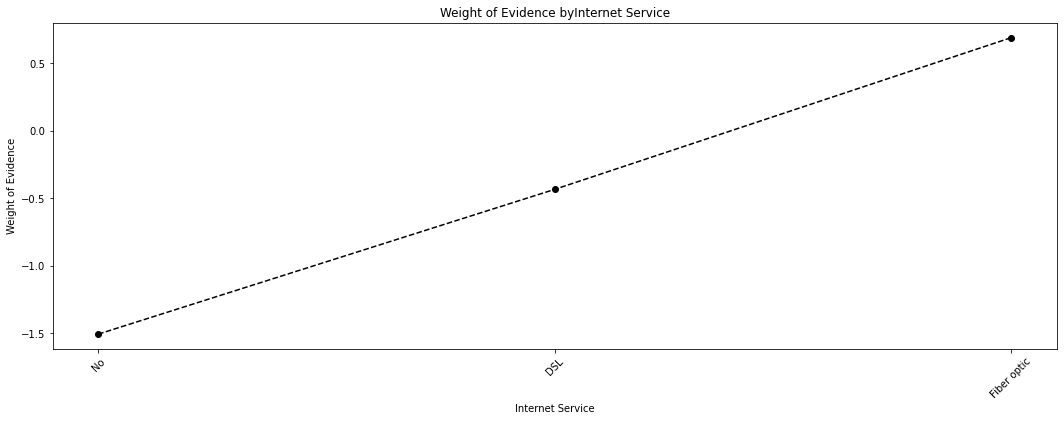

In [77]:
plot_woe(internet_service)

         Contract  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0        Two year   1685    0.028487    0.239619         48.0      1637.0   
1        One year   1472    0.112772    0.209329        166.0      1306.0   
2  Month-to-month   3875    0.427097    0.551052       1655.0      2220.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  diff_prop_churn_yes  diff_woe  \
0          0.025682         0.317064 -2.513305                  NaN       NaN   
1          0.088818         0.252954 -1.046622             0.084285  1.466683   
2          0.885500         0.429983  0.722408             0.314325  1.769030   

         IV  
0  1.233189  
1  1.233189  
2  1.233189  


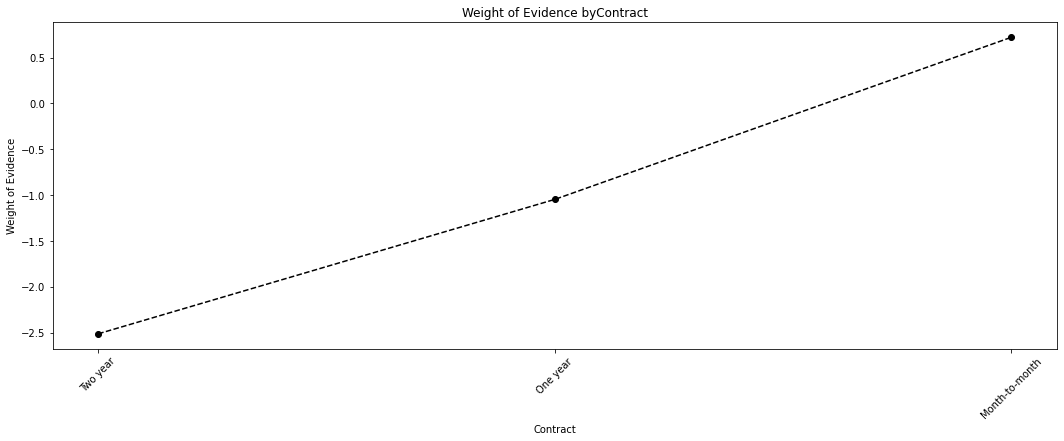

In [78]:
#contract
contract = woe_discrete(df,'Contract',df["Churn"])
print(contract)
plot_woe(contract)

               PaymentMethod  n_obs
0    Credit card (automatic)   1521
1  Bank transfer (automatic)   1542
2               Mailed check   1604
3           Electronic check   2365


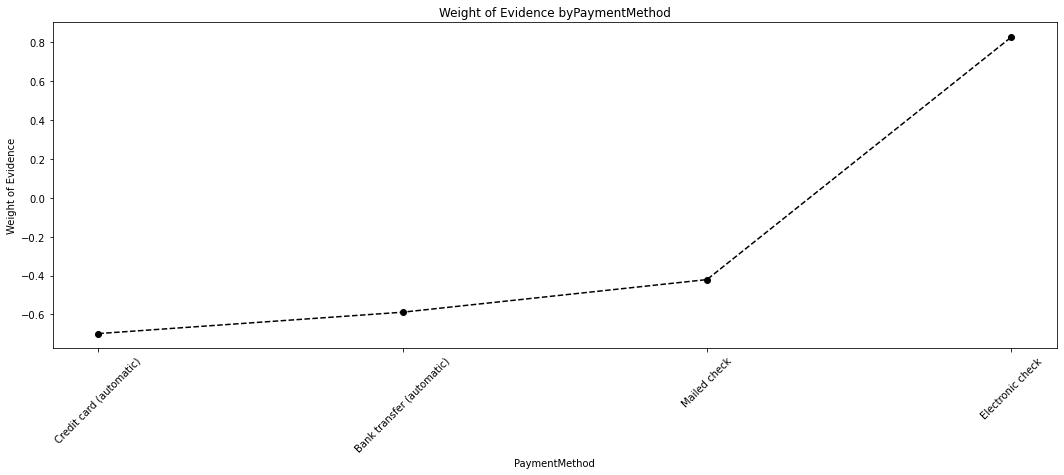

In [79]:
#payment methode
payment_method = woe_discrete(df,'PaymentMethod',df["Churn"])
print(payment_method.iloc[:,[0,1]])
plot_woe(payment_method)

    Tenure Group  n_obs
0  Over 48 Month   2239
1   24-48 Months   1594
2   12-24 Months   1024
3    0-12 Months   2175


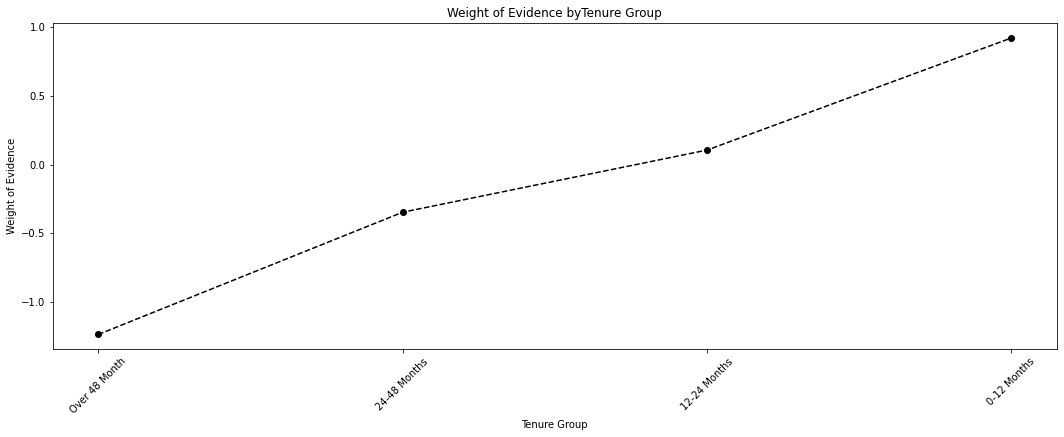

In [80]:
#tenure group
tenure_group = woe_discrete(df,'Tenure Group',df["Churn"])
print(tenure_group.iloc[:,[0,1]])
plot_woe(tenure_group)

In [81]:
 #continuous variable
def woe_continuous(df,discrete_variable_name,churn_yes_no_variable_df):
    df = pd.concat([df[discrete_variable_name],churn_yes_no_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                     df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_churn']
    df['prop_n_obs'] = df["n_obs"]/df["n_obs"].sum()
    df["n_churn_yes"] = df["prop_churn"]*df["n_obs"]
    df["n_churn_no"] = (1-df["prop_churn"])*df["n_obs"]
    df["prop_n_churn_yes"] = df["n_churn_yes"]/df["n_churn_yes"].sum()
    df["prop_n_churn_no"] = df["n_churn_no"]/df["n_churn_no"].sum()
    df["WoE"] = np.log(df["prop_n_churn_yes"]/df["prop_n_churn_no"])
    #df = df.sort_values(["WoE"])
    #df = df.reset_index(drop=True)
    df["diff_prop_churn_yes"] = df["prop_churn"].diff().abs()
    df["diff_woe"] = df["WoE"].diff().abs()
    df["IV"] = (df["prop_n_churn_yes"]-df["prop_n_churn_no"])*df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

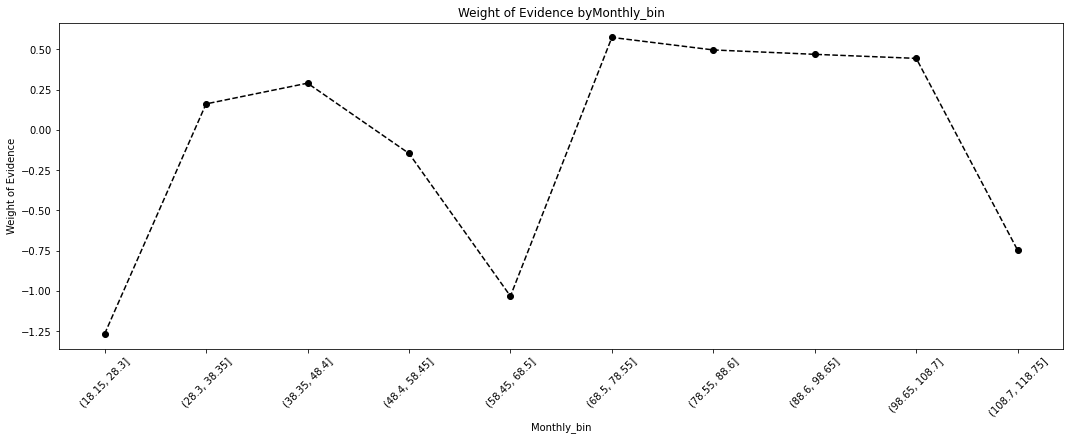

In [82]:
#monhtly Charges
df["Monthly_bin"] = pd.cut(df["MonthlyCharges"],10)

monthly = woe_continuous(df,'Monthly_bin',df["Churn"])
plot_woe(monthly)

In [83]:
monthly

Monthly_bin  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0    (18.15, 28.3]   1600    0.092500    0.227531        148.0      1452.0   
1    (28.3, 38.35]    191    0.298429    0.027162         57.0       134.0   
2    (38.35, 48.4]    365    0.326027    0.051906        119.0       246.0   
3    (48.4, 58.45]    638    0.238245    0.090728        152.0       486.0   
4    (58.45, 68.5]    473    0.114165    0.067264         54.0       419.0   
5    (68.5, 78.55]    892    0.391256    0.126849        349.0       543.0   
6    (78.55, 88.6]    952    0.372899    0.135381        355.0       597.0   
7    (88.6, 98.65]    873    0.366552    0.124147        320.0       553.0   
8   (98.65, 108.7]    754    0.360743    0.107224        272.0       482.0   
9  (108.7, 118.75]    294    0.146259    0.041809         43.0       251.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  diff_prop_churn_yes  diff_woe  \
0          0.079187         0.281232 -1.267371                  NaN       NaN   
1          0.030498         0.025954  0.161326             0.205929  1.428696   
2          0.063670         0.047647  0.289906             0.027598  0.128580   
3          0.081327         0.094131 -0.146214             0.087783  0.436120   
4          0.028892         0.081154 -1.032773             0.124080  0.886559   
5          0.186731         0.105171  0.574077             0.277091  1.606849   
6          0.189941         0.115630  0.496315             0.018356  0.077762   
7          0.171215         0.107108  0.469077             0.006347  0.027238   
8          0.145532         0.093357  0.443972             0.005809  0.025105   
9          0.023007         0.048615 -0.748139             0.214484  1.192111   

         IV  
0  0.473388  
1  0.473388  
2  0.473388  
3  0.473388  
4  0.473388  
5  0.473388  
6  0.473388  
7  0.473388  
8  0.473388  
9  0.473388

In [84]:
df["Monthly_charges : <28.3"] = np.where((df["MonthlyCharges"]<=28.3),1,0)
df["Monhtly_charges: 28.3-48.4"] = np.where((df["MonthlyCharges"]>28.3)&(df["MonthlyCharges"]<=48.4),1,0)
df["Monhtly_charges: 48.4-68.5"] = np.where((df["MonthlyCharges"]>48.4)&(df["MonthlyCharges"]<=68.5),1,0)
df["Monhtly_charges: 68.5-108.7"] = np.where((df["MonthlyCharges"]>68.5)&(df["MonthlyCharges"]<=108.7),1,0)
df["Monhtly_charges:>108.7"] = np.where((df["MonthlyCharges"]>108.7),1,0)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7027           Yes             DSL            Yes           No   
7028           Yes     Fiber optic             No          Yes   
7029            No             DSL            Yes           No   
7030           Yes     Fiber optic             No           No   
7031            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7027              Yes               Mailed check           84.80   
7028              Yes    Credit card (automatic)          103.20   
7029              Yes           Electronic check           29.60   
7030              Yes               Mailed check           74.40   
7031              Yes  Bank transfer (automatic)          105.65   

      TotalCharges  Churn   Tenure Group     Monthly_bin  \
0            29.85      0    0-12 Months   (28.3, 38.35]   
1          1889.50      0   24-48 Months   (48.4, 58.45]   
2           108.15      1    0-12 Months   (48.4, 58.45]   
3          1840.75      0   24-48 Months   (38.35, 48.4]   
4           151.65      1    0-12 Months   (68.5, 78.55]   
...            ...    ...            ...             ...   
7027       1990.50      0   12-24 Months   (78.55, 88.6]   
7028       7362.90      0  Over 48 Month  (98.65, 108.7]   
7029        346.45      0    0

In [85]:
monthly

Monthly_bin  n_obs  prop_churn  prop_n_obs  n_churn_yes  n_churn_no  \
0    (18.15, 28.3]   1600    0.092500    0.227531        148.0      1452.0   
1    (28.3, 38.35]    191    0.298429    0.027162         57.0       134.0   
2    (38.35, 48.4]    365    0.326027    0.051906        119.0       246.0   
3    (48.4, 58.45]    638    0.238245    0.090728        152.0       486.0   
4    (58.45, 68.5]    473    0.114165    0.067264         54.0       419.0   
5    (68.5, 78.55]    892    0.391256    0.126849        349.0       543.0   
6    (78.55, 88.6]    952    0.372899    0.135381        355.0       597.0   
7    (88.6, 98.65]    873    0.366552    0.124147        320.0       553.0   
8   (98.65, 108.7]    754    0.360743    0.107224        272.0       482.0   
9  (108.7, 118.75]    294    0.146259    0.041809         43.0       251.0   

   prop_n_churn_yes  prop_n_churn_no       WoE  diff_prop_churn_yes  diff_woe  \
0          0.079187         0.281232 -1.267371                  NaN       NaN   
1          0.030498         0.025954  0.161326             0.205929  1.428696   
2          0.063670         0.047647  0.289906             0.027598  0.128580   
3          0.081327         0.094131 -0.146214             0.087783  0.436120   
4          0.028892         0.081154 -1.032773             0.124080  0.886559   
5          0.186731         0.105171  0.574077             0.277091  1.606849   
6          0.189941         0.115630  0.496315             0.018356  0.077762   
7          0.171215         0.107108  0.469077             0.006347  0.027238   
8          0.145532         0.093357  0.443972             0.005809  0.025105   
9          0.023007         0.048615 -0.748139             0.214484  1.192111   

         IV  
0  0.473388  
1  0.473388  
2  0.473388  
3  0.473388  
4  0.473388  
5  0.473388  
6  0.473388  
7  0.473388  
8  0.473388  
9  0.473388

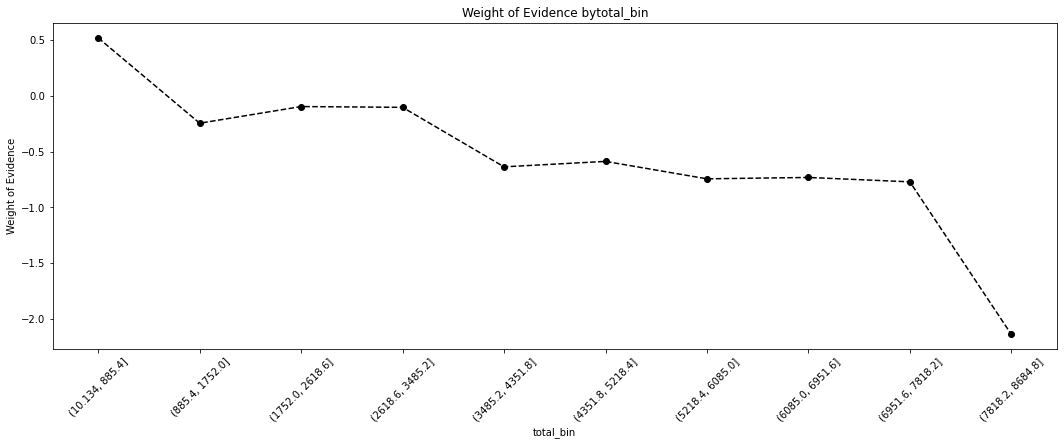

In [86]:
#total charges
df["total_bin"] = pd.cut(df["TotalCharges"],10)

total = woe_continuous(df,'total_bin',df["Churn"])
plot_woe(total)

In [87]:
df["total_charges : <885.4"] = np.where((df["TotalCharges"]<=885.4),1,0)
df["total_charges: 885.4-3485.2"] = np.where((df["TotalCharges"]>885.4)&(df["TotalCharges"]<=3485.2),1,0)
df["total_charges: 3485.2-7818.2"] = np.where((df["TotalCharges"]>3485.2)&(df["TotalCharges"]<=7818.2),1,0)
df["total_charges:>7818.2"] = np.where((df["TotalCharges"]>7818.2),1,0)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   
7031    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7027           Yes             DSL            Yes           No   
7028           Yes     Fiber optic             No          Yes   
7029            No             DSL            Yes           No   
7030           Yes     Fiber optic             No           No   
7031            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7027              Yes               Mailed check           84.80   
7028              Yes    Credit card (automatic)          103.20   
7029              Yes           Electronic check           29.60   
7030              Yes               Mailed check           74.40   
7031              Yes  Bank transfer (automatic)          105.65   

      TotalCharges  Churn   Tenure Group     Monthly_bin  \
0            29.85      0    0-12 Months   (28.3, 38.35]   
1          1889.50      0   24-48 Months   (48.4, 58.45]   
2           108.15      1    0-12 Months   (48.4, 58.45]   
3          1840.75      0   24-48 Months   (38.35, 48.4]   
4           151.65      1    0-12 Months   (68.5, 78.55]   
...            ...    ...            ...             ...   
7027       1990.50      0   12-24 Months   (78.55, 88.6]   
7028       7362.90      0  Over 48 Month  (98.65, 108.7]   
7029        346.45      0    0

In [88]:
df.head(1)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn Tenure Group  \
0  Electronic check           29.85         29.85      0  0-12 Months   

     Monthly_bin  Monthly_charges : <28.3  Monhtly_charges: 28.3-48.4  \
0  (28.3, 38.35]                        0                           1   

   Monhtly_charges: 48.4-68.5  Monhtly_charges: 68.5-108.7  \
0                           0                            0   

   Monhtly_charges:>108.7        total_bin  total_charges : <885.4  \
0                       0  (10.134, 885.4]                       1   

   total_charges: 885.4-3485.2  total_charges: 3485.2-7818.2  \
0                            0                             0   

   total_charges:>7818.2  
0                      0

In [89]:
df["PhoneService"] = df["PhoneService"].apply(lambda x:1 if x =="Yes" else 0)
df["MultipleLines"] = df["MultipleLines"].apply(lambda x:1 if x =="Yes" else 0)
df["OnlineSecurity"] = df["OnlineSecurity"].apply(lambda x:1 if x =="Yes" else 0)
df["OnlineBackup"] = df["OnlineBackup"].apply(lambda x:1 if x =="Yes" else 0)
df["DeviceProtection"] = df["DeviceProtection"].apply(lambda x:1 if x =="Yes" else 0)
df["TechSupport"] = df["TechSupport"].apply(lambda x:1 if x =="Yes" else 0)
df = pd.concat([df,pd.get_dummies(df["InternetService"])],axis=1)
#total service subscribe
df["Total Service"] = df["PhoneService"] + df["MultipleLines"] + df["DSL"] + df["Fiber optic"] + df["OnlineSecurity"] + df["OnlineBackup"] + df["DeviceProtection"] + df["TechSupport"]


df


gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0     Female              0     Yes         No       1             0   
1       Male              0      No         No      34             1   
2       Male              0      No         No       2             1   
3       Male              0      No         No      45             0   
4     Female              0      No         No       2             1   
...      ...            ...     ...        ...     ...           ...   
7027    Male              0     Yes        Yes      24             1   
7028  Female              0     Yes        Yes      72             1   
7029  Female              0     Yes        Yes      11             0   
7030    Male              1     Yes         No       4             1   
7031    Male              0      No         No      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7027              1             DSL               1             0   
7028              1     Fiber optic               0             1   
7029              0             DSL               1             0   
7030              1     Fiber optic               0             0   
7031              0     Fiber optic               1             0   

      DeviceProtection  TechSupport StreamingTV StreamingMovies  \
0                    0            0          No              No   
1                    1            0          No              No   
2                    0            0          No              No   
3                    1            1          No              No   
4                    0            0          No              No   
...                ...          ...         ...             ...   
7027                 1            1         Yes             Yes   
7028                 1            0         Yes             Yes   
7029                 0            0          No              No   
7030                 0            0          No              No   
7031                 1            1         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn   Tenure Group     Monthly_bin  \
0              29.85         29.85      0    0-12 Months   (28.3, 38.35]   
1              56.95       1889.50      0   24-48 Months   (48.4, 58.45]   
2              53.85        108.15      1    0-12 Months   (48.4, 58.45]   
3              42.30       1840.75      0   24-48 Months   (38.35, 48.4]   
4              70.70        151.65      1    0-12 Months   (68.5, 78.55]   
...              ...           ...    ...            ...             ...   
7027           84.80       1990.50      0   12-24 Months   (78.55, 88.6]   
7028          103.20       7362.90      0  Over 48 Month  (98.65, 108.7]   
7029  

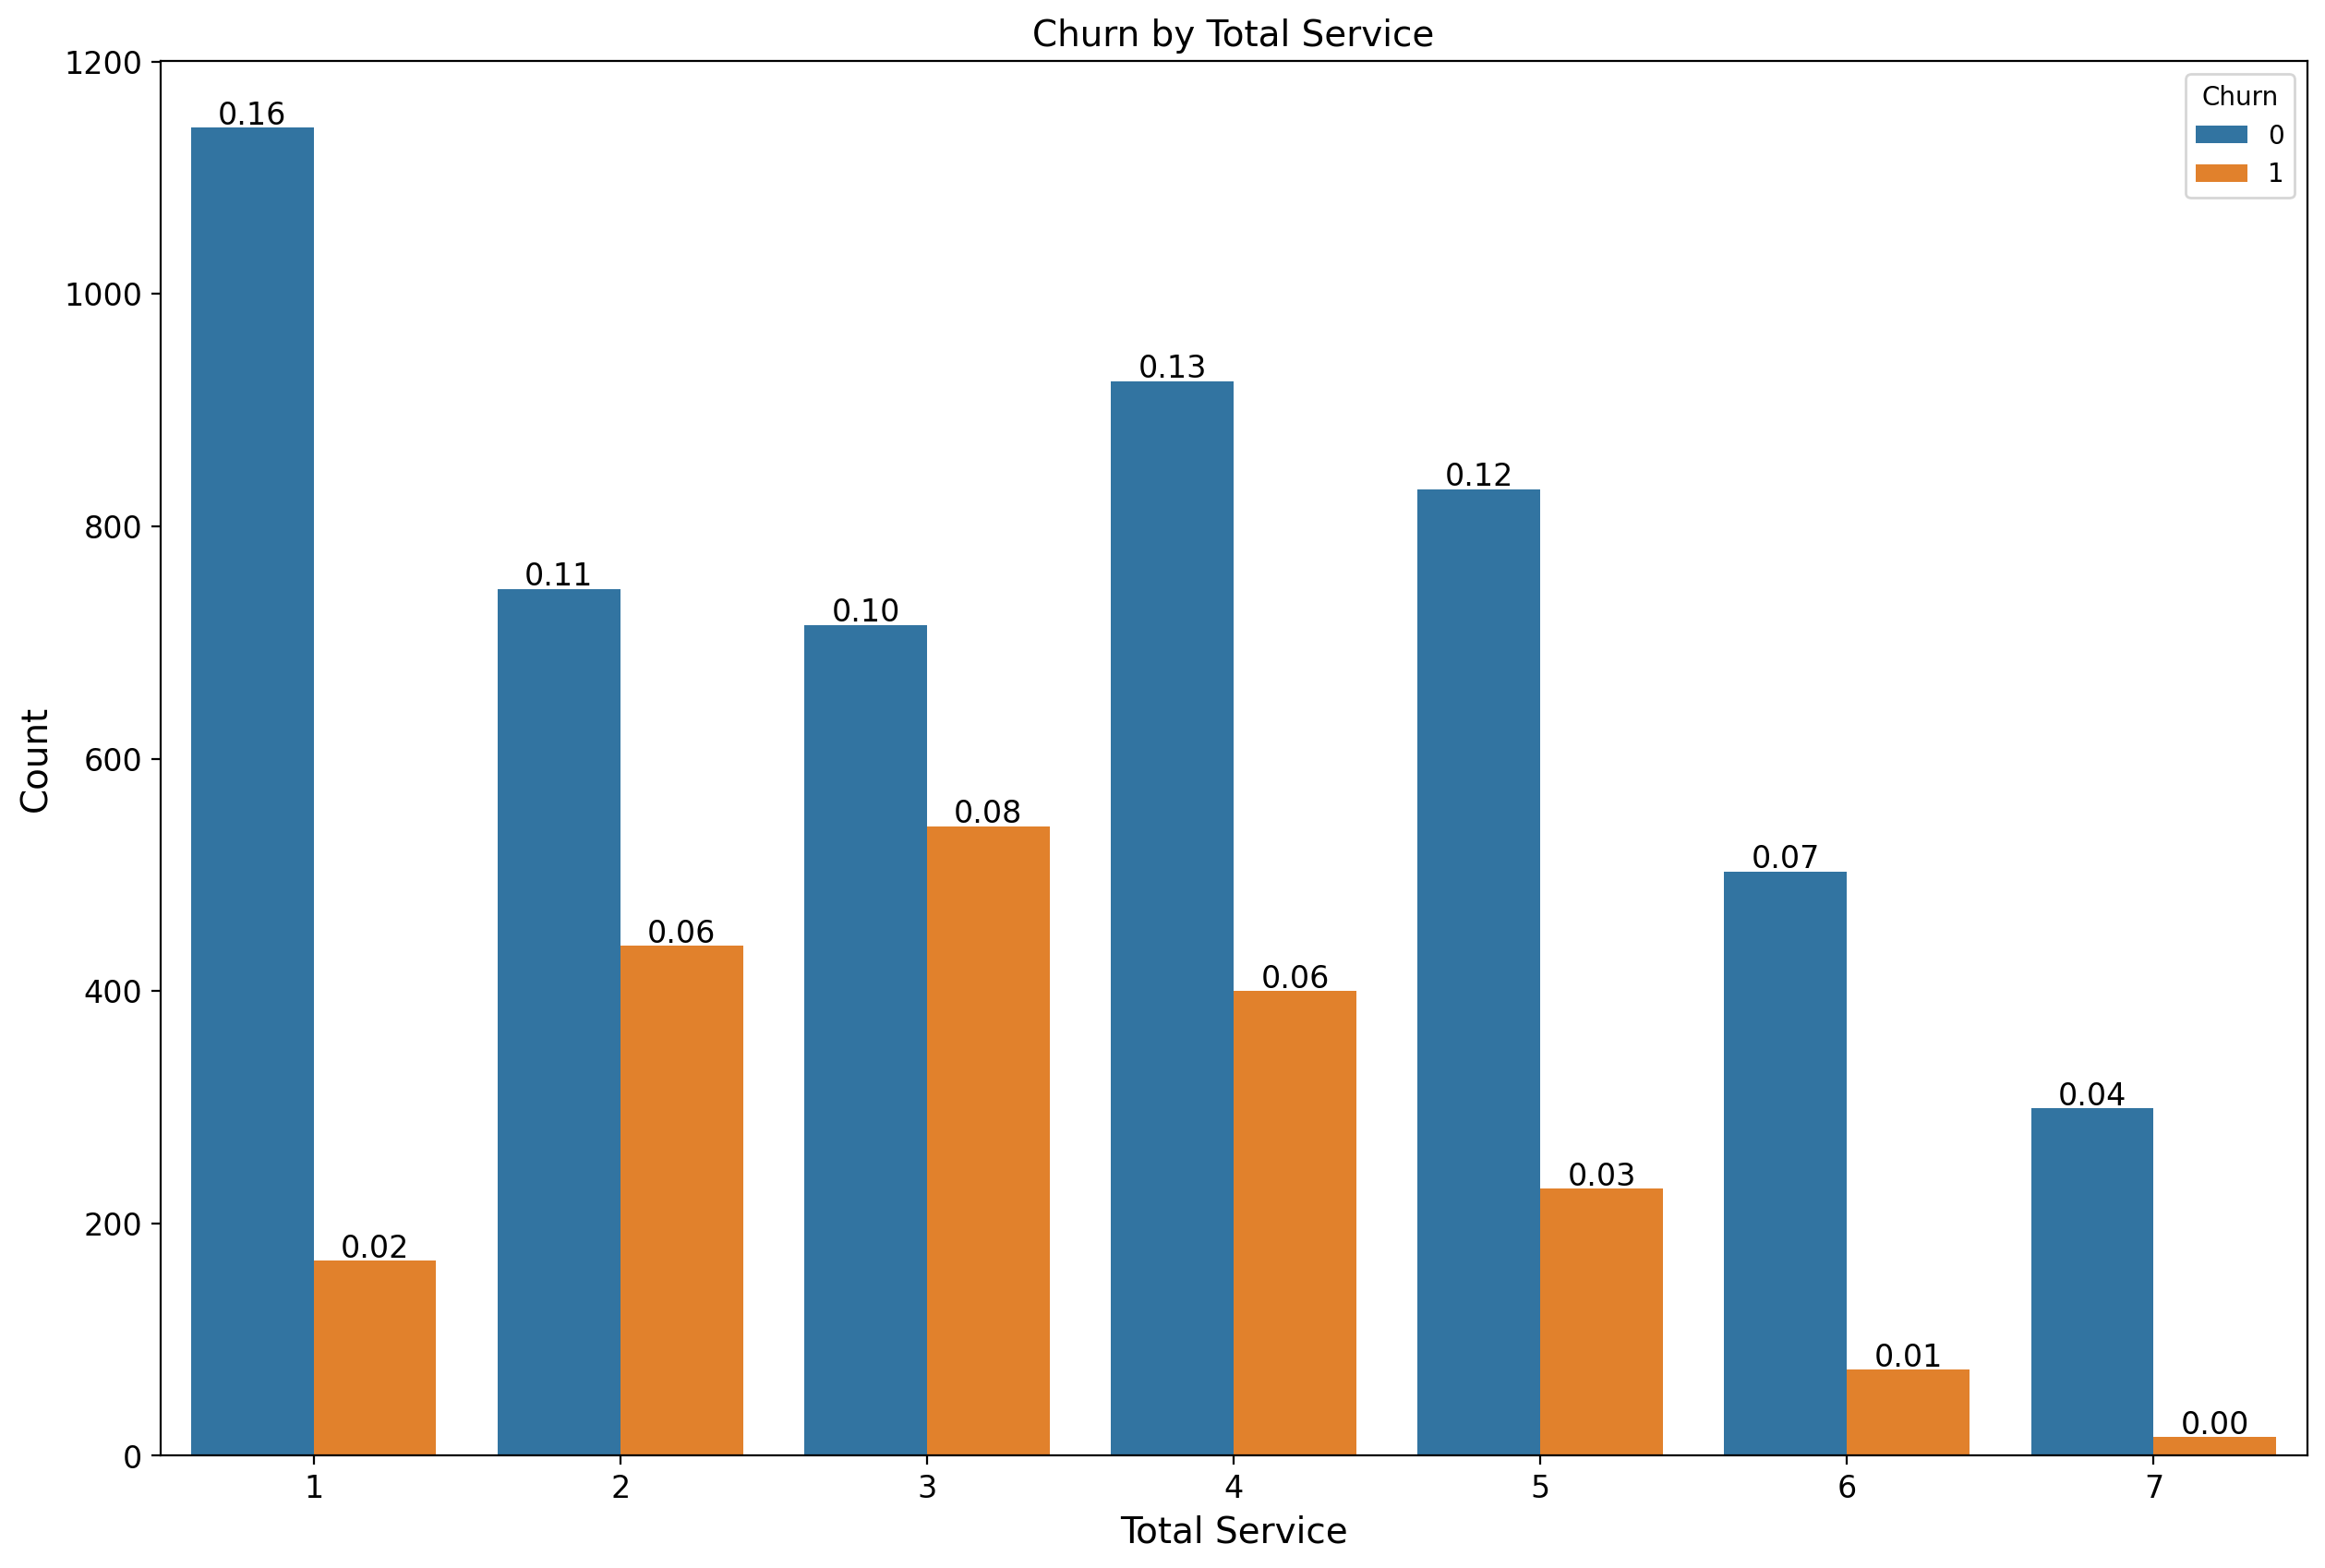

In [90]:
categoric_analysis(df,"Total Service");

<AxesSubplot:xlabel='Total Service', ylabel='MonthlyCharges'>

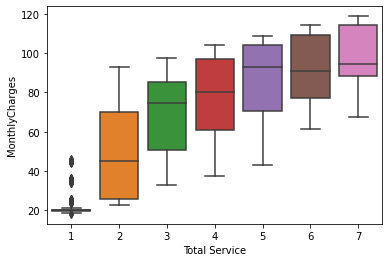

In [91]:
sns.boxplot(data=df,x="Total Service",y="MonthlyCharges")

<AxesSubplot:xlabel='Total Service', ylabel='TotalCharges'>

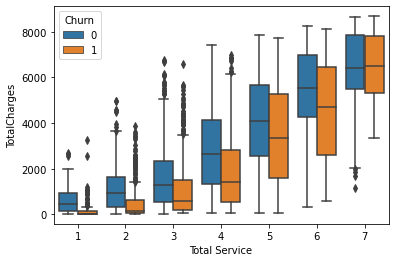

In [92]:
sns.boxplot(data=df,x="Total Service",y="TotalCharges",hue="Churn")

<Figure size 2000x1600 with 0 Axes>

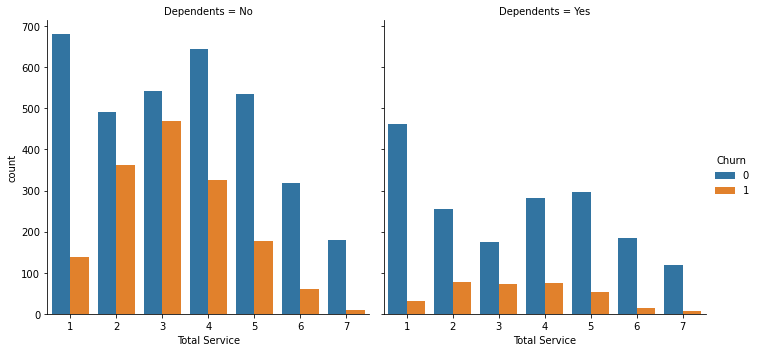

In [93]:
plt.figure(figsize=(10,8),dpi=200)
ax = sns.catplot(data=df,x="Total Service",col="Dependents",hue="Churn",kind="count")

In [94]:
#contigency table
#H0 : There is not have relation between Total Service and churn
#H1 :  There is have relation between Total Service and Churn

service_chi = pd.crosstab(index=df["Total Service"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([service_chi.iloc[0].values,service_chi.iloc[1].values,
                                      service_chi.iloc[2].values,service_chi.iloc[3].values,
                                      service_chi.iloc[4].values,service_chi.iloc[5].values,service_chi.iloc[6].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 1.135111333643968e-109


In [95]:
df["StreamingTV"] = df["StreamingTV"].apply(lambda x:1 if x =="Yes" else 0)
df["StreamingMovies"] = df["StreamingMovies"].apply(lambda x:1 if x =="Yes" else 0)

#total service subscribe
df["Total Streaming"] = df["StreamingTV"] + df["StreamingMovies"]


df

gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0     Female              0     Yes         No       1             0   
1       Male              0      No         No      34             1   
2       Male              0      No         No       2             1   
3       Male              0      No         No      45             0   
4     Female              0      No         No       2             1   
...      ...            ...     ...        ...     ...           ...   
7027    Male              0     Yes        Yes      24             1   
7028  Female              0     Yes        Yes      72             1   
7029  Female              0     Yes        Yes      11             0   
7030    Male              1     Yes         No       4             1   
7031    Male              0      No         No      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7027              1             DSL               1             0   
7028              1     Fiber optic               0             1   
7029              0             DSL               1             0   
7030              1     Fiber optic               0             0   
7031              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7027                 1            1            1                1   
7028                 1            0            1                1   
7029                 0            0            0                0   
7030                 0            0            0                0   
7031                 1            1            1                1   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn   Tenure Group     Monthly_bin  \
0              29.85         29.85      0    0-12 Months   (28.3, 38.35]   
1              56.95       1889.50      0   24-48 Months   (48.4, 58.45]   
2              53.85        108.15      1    0-12 Months   (48.4, 58.45]   
3              42.30       1840.75      0   24-48 Months   (38.35, 48.4]   
4              70.70        151.65      1    0-12 Months   (68.5, 78.55]   
...              ...           ...    ...            ...             ...   
7027           84.80       1990.50      0   12-24 Months   (78.55, 88.6]   
7028          103.20       7362.90      0  Over 48 Month  

<Figure size 2000x1600 with 0 Axes>

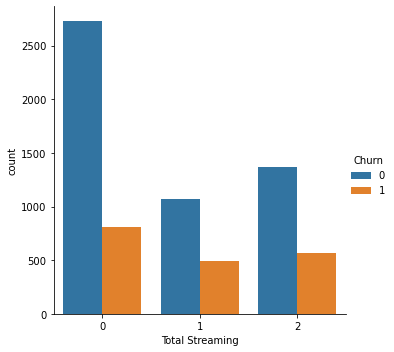

In [96]:
plt.figure(figsize=(10,8),dpi=200)
ax = sns.catplot(data=df,x="Total Streaming",hue="Churn",kind="count")

<Figure size 2000x1600 with 0 Axes>

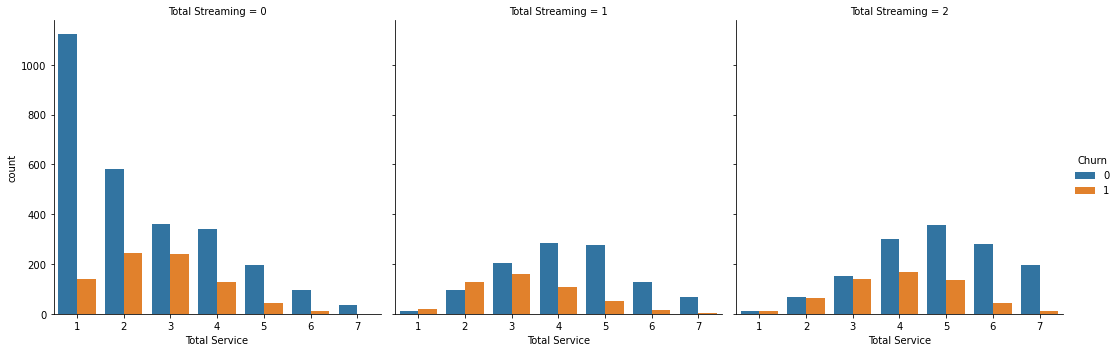

In [97]:
plt.figure(figsize=(10,8),dpi=200)
ax = sns.catplot(data=df,x="Total Service",col="Total Streaming",hue="Churn",kind="count")

In [98]:
#contigency table
#H0 : There is not have relation between Total streaming and churn
#H1 :  There is have relation between Total streaming and Churn

streaming_chi = pd.crosstab(index=df["Total Service"],columns=df["Churn"])

chi2,p,dof,_ = stats.chi2_contingency([streaming_chi.iloc[0].values,streaming_chi.iloc[1].values,
                                      streaming_chi.iloc[2].values])

if p < 0.05 :
    print(f'Reject Hypothesis Null, Because p-value is {p}')
else:
    print(f'Fail to reject Hypothesis Null, Because p-value is {p}')

Reject Hypothesis Null, Because p-value is 2.7405332664068015e-68


<Figure size 2000x1600 with 0 Axes>

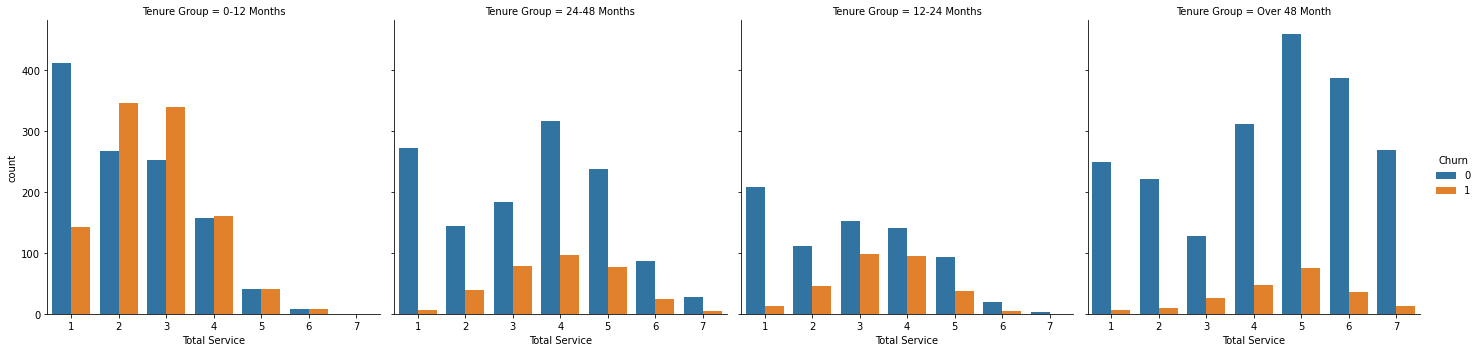

In [99]:
plt.figure(figsize=(10,8),dpi=200)
ax = sns.catplot(data=df,x="Total Service",col="Tenure Group",hue="Churn",kind="count")

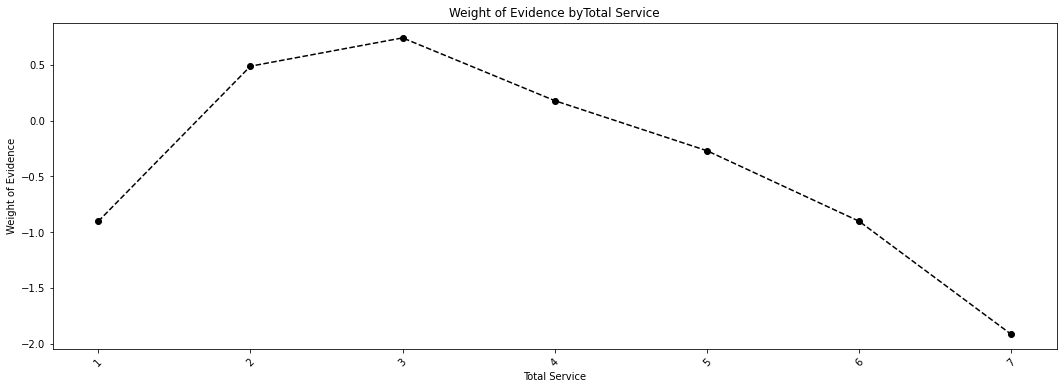

In [100]:
ts = woe_continuous(df,'Total Service',df["Churn"])
plot_woe(ts)

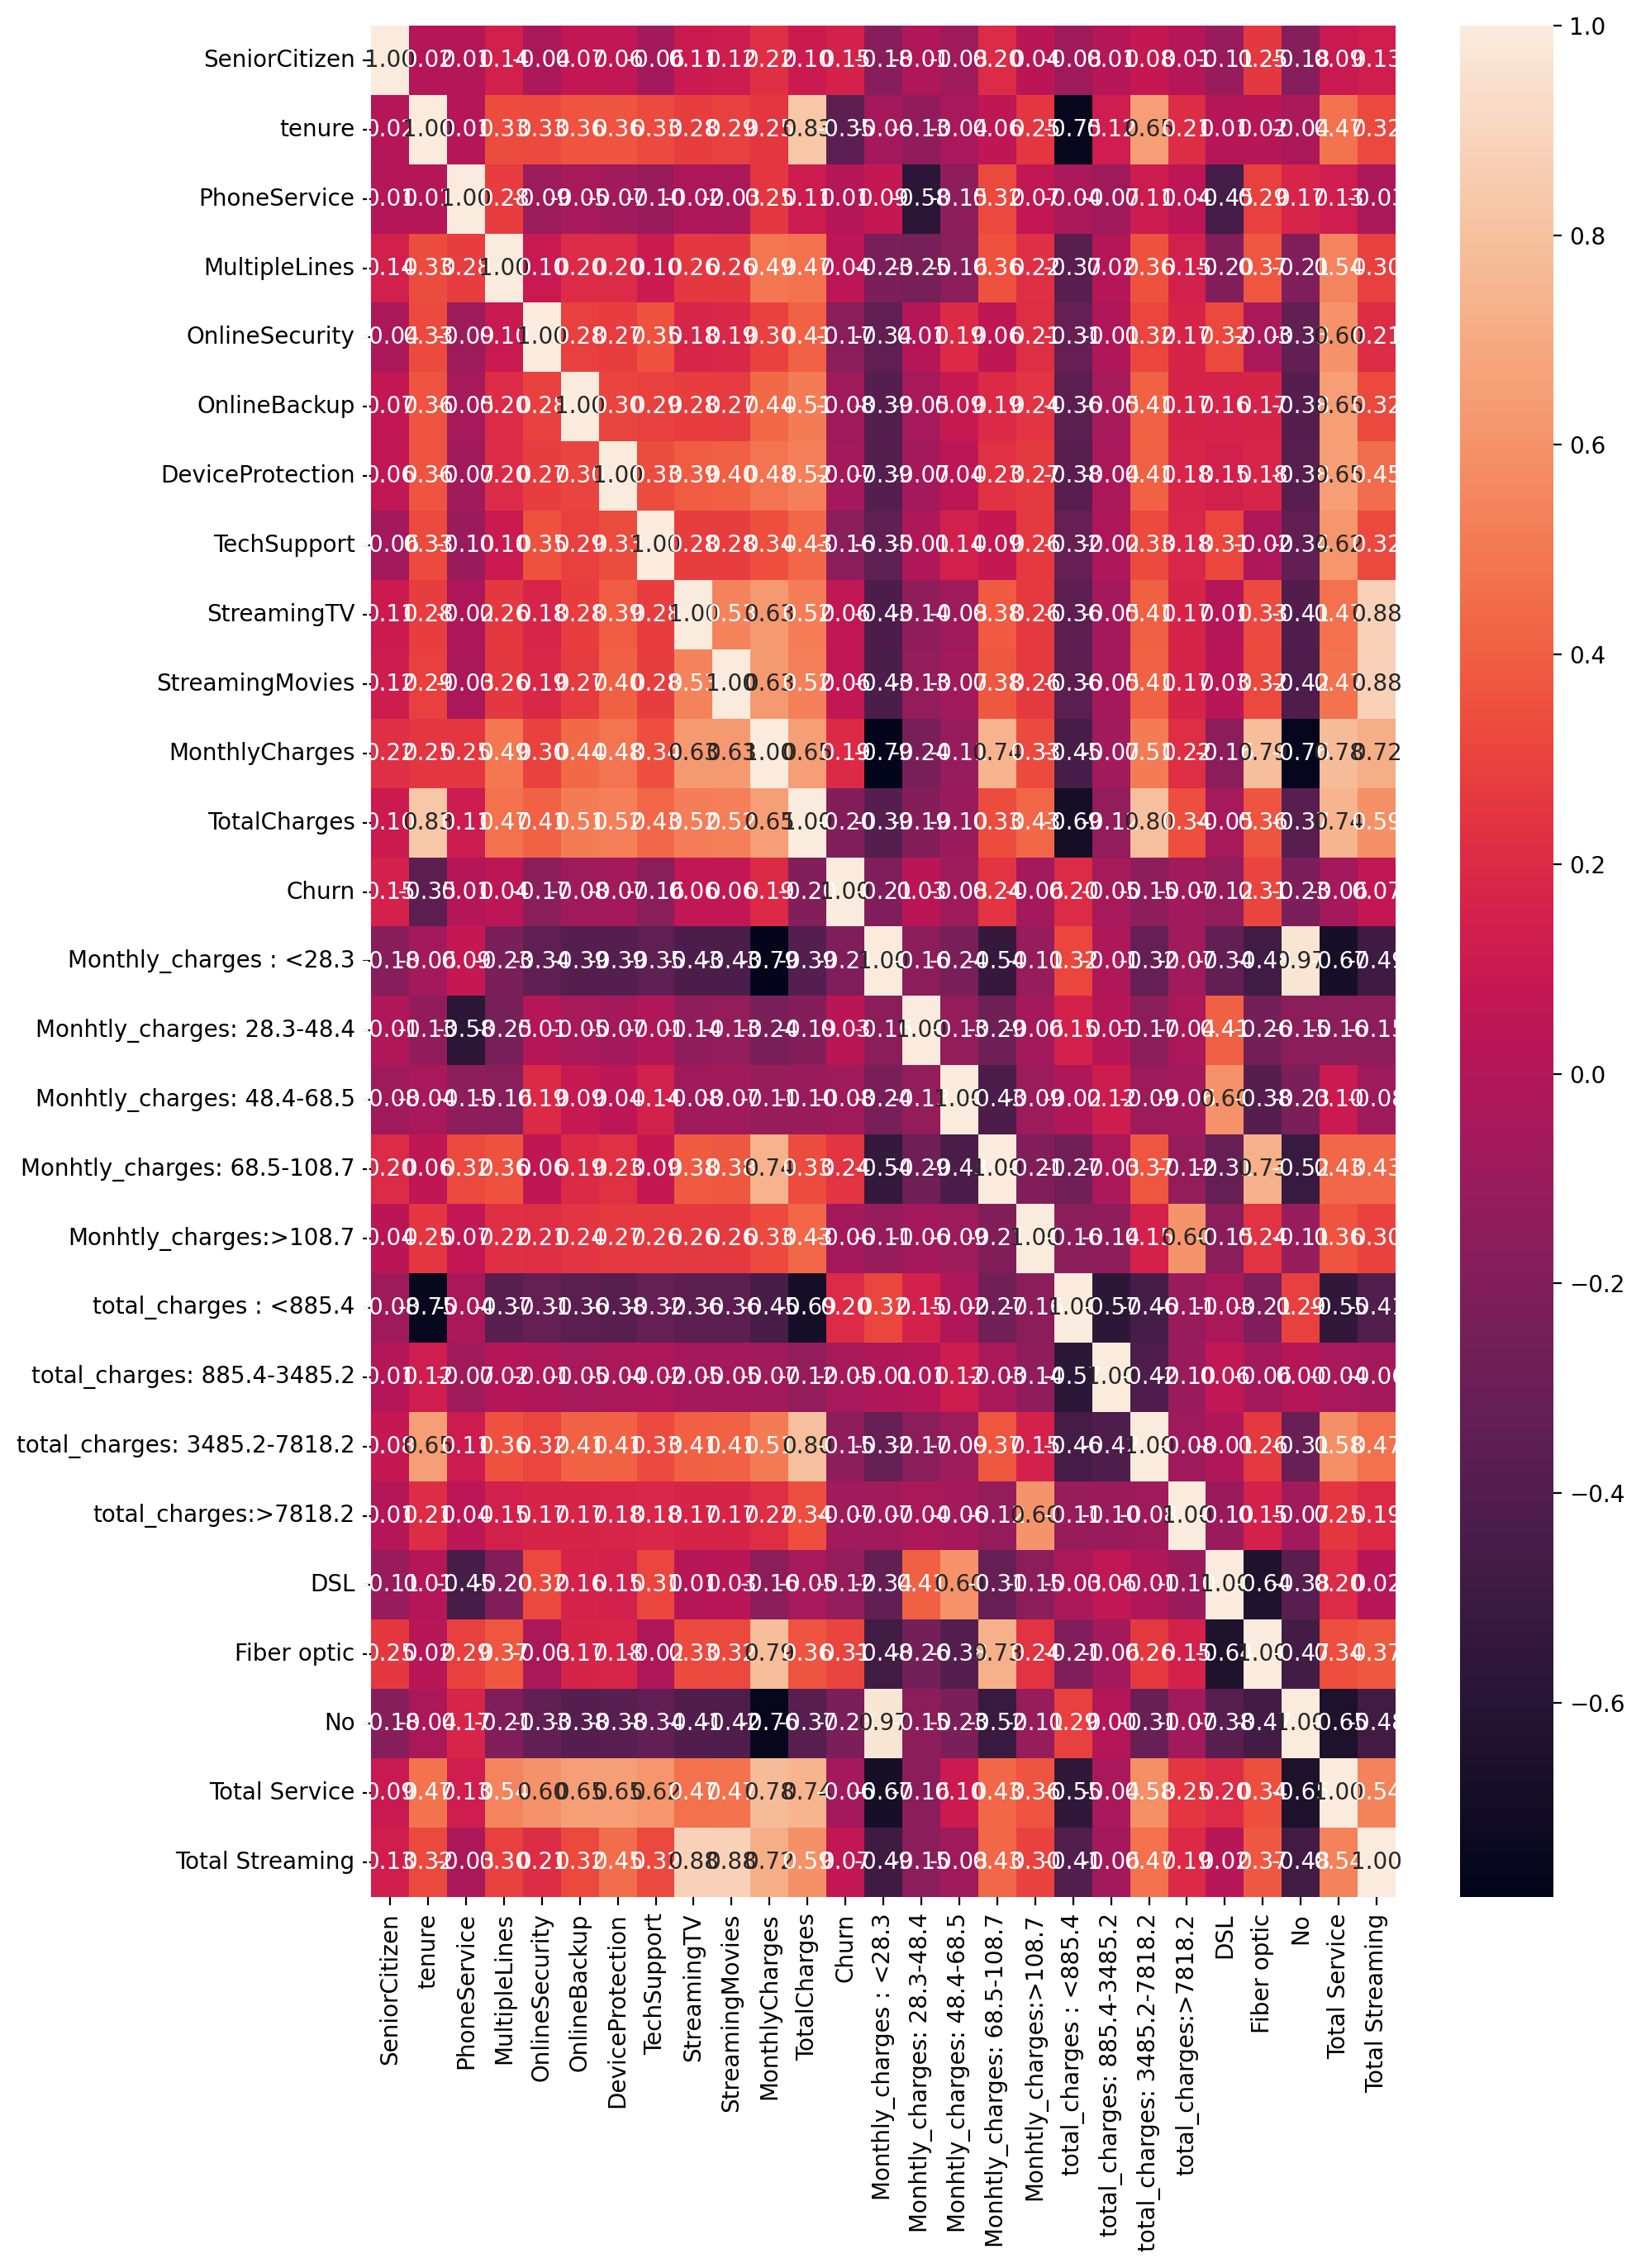

In [101]:
plt.figure(figsize=(10,15),dpi=200)
ax = sns.heatmap(df.corr(),annot=True,fmt=".2f")

# Percobaan Model 

In [102]:
from sklearn.linear_model import LogisticRegression
data = df.copy()

In [103]:
data["Partner"] = data["Partner"].apply(lambda x:1 if x=="Yes" else 0)
data["Dependents"] = data["Dependents"].apply(lambda x:1 if x=="Yes" else 0)
data["PaperlessBilling"] = data["PaperlessBilling"].apply(lambda x:1 if x=="Yes" else 0)

In [104]:
#convert contract to numeric with one and two year = 1 and month-to-month = 0
def contract_numeric(x):
    if x=="One year" or x=="Two year":
        return 1
    else:
        return 0

#convert payment method
def payment_method(x):
    if x=="Bank transfer (automatic)" or x=="Credit card (automatic)" or x=="Mailed check":
        return 0
    else:
        return 1

data["Contract"] = data["Contract"].apply(contract_numeric)
data["PaymentMethod"] = data["PaymentMethod"].apply(payment_method)

In [105]:
dummies = pd.get_dummies(df["Tenure Group"])
data  = pd.concat([data,dummies],axis=1)

In [106]:
data.drop(["gender","tenure","PhoneService","MonthlyCharges","TotalCharges",
          "Tenure Group","Monthly_bin","total_bin","Total Service","Total Streaming","InternetService","No",
           "Monthly_charges : <28.3","total_charges:>7818.2","Over 48 Month","Monhtly_charges:>108.7","DeviceProtection"
          ],axis=1,inplace=True)
data

SeniorCitizen  Partner  Dependents  MultipleLines  OnlineSecurity  \
0                 0        1           0              0               0   
1                 0        0           0              0               1   
2                 0        0           0              0               1   
3                 0        0           0              0               1   
4                 0        0           0              0               0   
...             ...      ...         ...            ...             ...   
7027              0        1           1              1               1   
7028              0        1           1              1               0   
7029              0        1           1              0               1   
7030              1        1           0              1               0   
7031              0        0           0              0               1   

      OnlineBackup  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                1            0            0                0         0   
1                0            0            0                0         1   
2                1            0            0                0         0   
3                0            1            0                0         1   
4                0            0            0                0         0   
...            ...          ...          ...              ...       ...   
7027             0            1            1                1         1   
7028             1            0            1                1         1   
7029             0            0            0                0         0   
7030             0            0            0                0         0   
7031             0            1            1                1         1   

      PaperlessBilling  PaymentMethod  Churn  Monhtly_charges: 28.3-48.4  \
0                    1              1      0                           1   
1                    0              0      0                           0   
2                    1              0      1                           0   
3                    0              0      0                           1   
4                    1              1      1                           0   
...                ...            ...    ...                         ...   
7027                 1              0      0                           0   
7028                 1              0      0                           0   
7029                 1              1      0                           1   
7030                 1              0      1                           0   
7031                 1              0      0                           0   

      Monhtly_charges: 48.4-68.5  Monhtly_charges: 68.5-108.7  \
0                              0                            0   
1                              1                            0   
2                              1                            0   
3                              0                            0   
4                              0                            1   
...                          ...                          ...   
7027                           0                            1   
7028                           0                            1   
7029                           0                            0   
7030                           0                            1   
7031                           0                            1   

      total_charges : <885.4  total_charges: 885.4-3485.2  \
0                          1                            0   
1                          0                            1   
2                          1                            0   
3                          0                            1   
4                          1                            0   
...                      ...                          ...   
7027                       0                            1   
7028                  

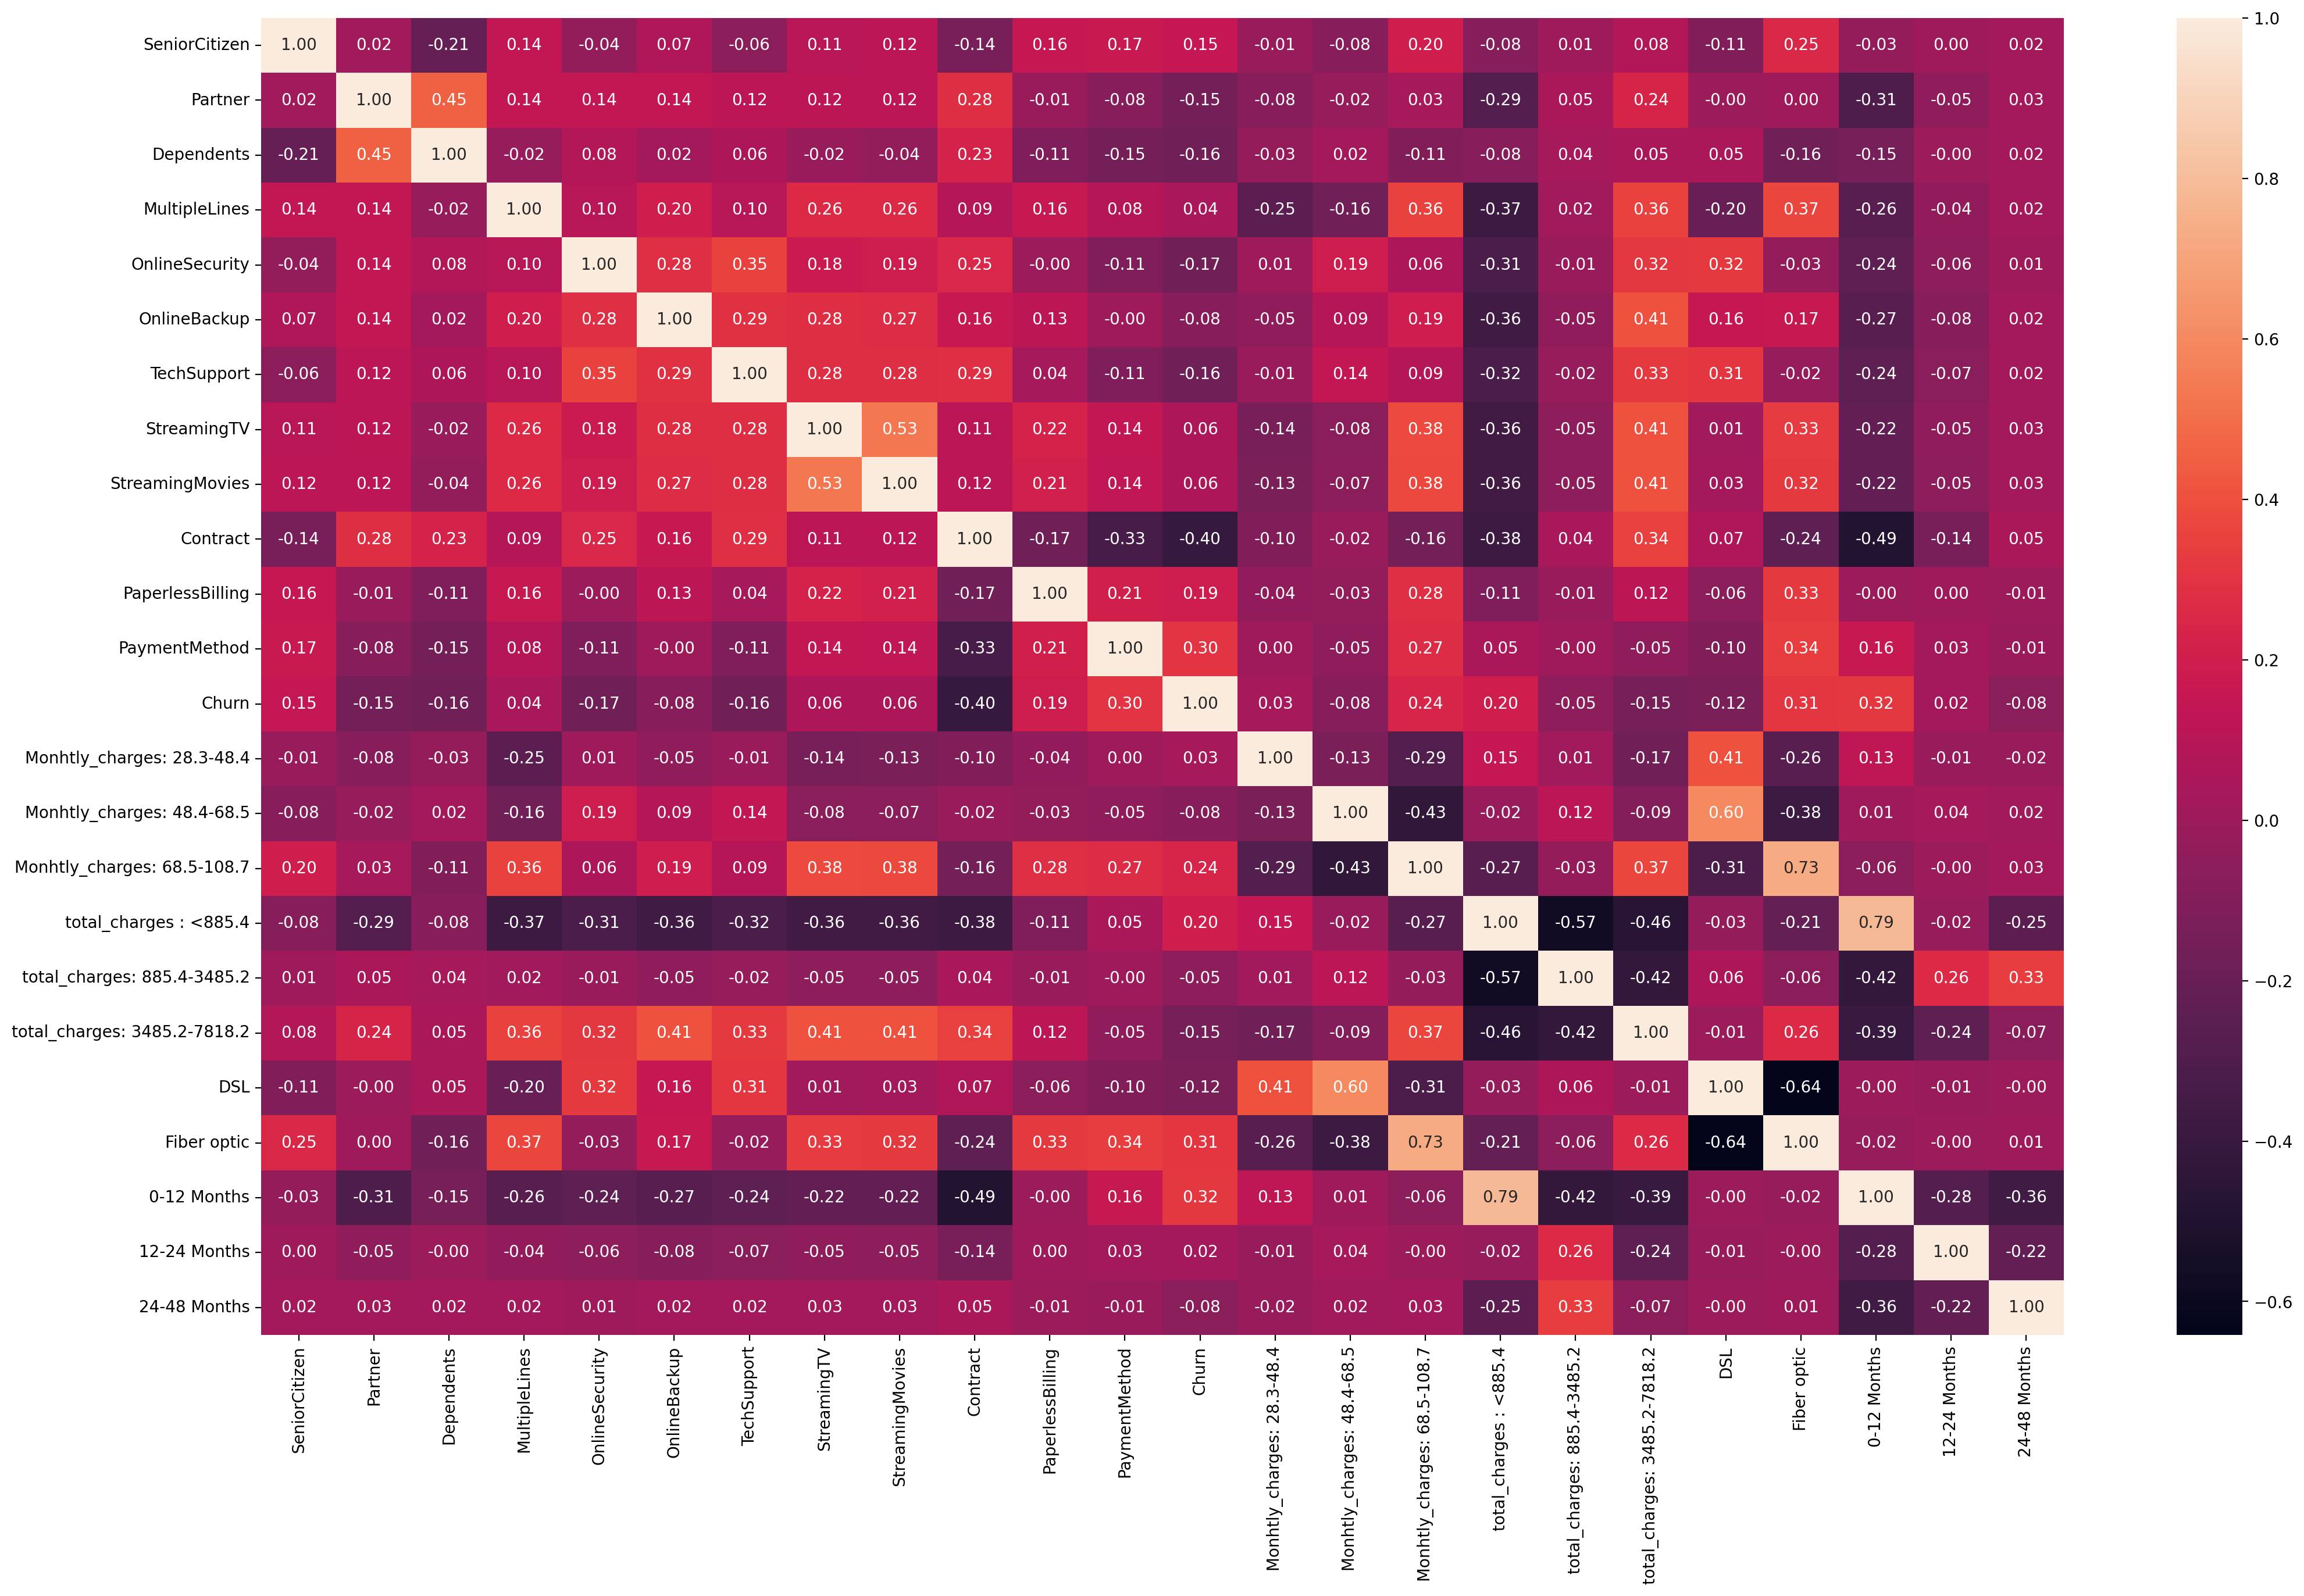

In [107]:
plt.figure(figsize=(25,15),dpi=200)
ax = sns.heatmap(data.corr(),annot=True,fmt=".2f")

In [108]:
#model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [109]:
reg =LogisticRegression()

In [110]:
y = data["Churn"]
X = data.drop(["Churn"],axis=1)

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [112]:
reg.fit(X_train,y_train)

LogisticRegression()

In [113]:
feature_name=X_train.columns.values

summary_table = pd.DataFrame(columns=["feature_name"],data=feature_name)
summary_table["Coefficients"] = np.transpose(reg.coef_)
summary_table.index =summary_table.index+1
summary_table.loc[0] = ["Intercept",reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

feature_name  Coefficients
0                      Intercept     -3.623163
1                  SeniorCitizen      0.248892
2                        Partner      0.082292
3                     Dependents     -0.245655
4                  MultipleLines      0.193524
5                 OnlineSecurity     -0.368771
6                   OnlineBackup     -0.075460
7                    TechSupport     -0.350497
8                    StreamingTV      0.335455
9                StreamingMovies      0.328608
10                      Contract     -1.210695
11              PaperlessBilling      0.220242
12                 PaymentMethod      0.316642
13    Monhtly_charges: 28.3-48.4      0.314320
14    Monhtly_charges: 48.4-68.5     -0.052144
15   Monhtly_charges: 68.5-108.7     -0.062220
16        total_charges : <885.4      0.802530
17   total_charges: 885.4-3485.2      0.745560
18  total_charges: 3485.2-7818.2      0.476730
19                           DSL      0.825459
20                   Fiber optic      1.816067
21                   0-12 Months      1.351245
22                  12-24 Months      0.395241
23                  24-48 Months      0.181027

# Build a Logistic Regression Model with P-Values

In [114]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_value:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stats.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [115]:
reg = LogisticRegression_with_p_value()

In [116]:
reg.fit(X_train,y_train)

In [117]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [118]:
feature_name=X_train.columns.values

summary_table = pd.DataFrame(columns=["feature_name"],data=feature_name)
summary_table["Coefficients"] = np.transpose(reg.coef_)
summary_table.index =summary_table.index+1
summary_table.loc[0] = ["Intercept",reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

feature_name  Coefficients
0                      Intercept     -3.623163
1                  SeniorCitizen      0.248892
2                        Partner      0.082292
3                     Dependents     -0.245655
4                  MultipleLines      0.193524
5                 OnlineSecurity     -0.368771
6                   OnlineBackup     -0.075460
7                    TechSupport     -0.350497
8                    StreamingTV      0.335455
9                StreamingMovies      0.328608
10                      Contract     -1.210695
11              PaperlessBilling      0.220242
12                 PaymentMethod      0.316642
13    Monhtly_charges: 28.3-48.4      0.314320
14    Monhtly_charges: 48.4-68.5     -0.052144
15   Monhtly_charges: 68.5-108.7     -0.062220
16        total_charges : <885.4      0.802530
17   total_charges: 885.4-3485.2      0.745560
18  total_charges: 3485.2-7818.2      0.476730
19                           DSL      0.825459
20                   Fiber optic      1.816067
21                   0-12 Months      1.351245
22                  12-24 Months      0.395241
23                  24-48 Months      0.181027

In [119]:
p_values = reg.p_values

p_values = np.append(np.nan,np.array(p_values))

In [120]:
summary_table['p_values'] = p_values

summary_table

feature_name  Coefficients      p_values
0                      Intercept     -3.623163           NaN
1                  SeniorCitizen      0.248892  1.414812e-02
2                        Partner      0.082292  3.760606e-01
3                     Dependents     -0.245655  2.381265e-02
4                  MultipleLines      0.193524  3.879588e-02
5                 OnlineSecurity     -0.368771  3.012344e-04
6                   OnlineBackup     -0.075460  4.115373e-01
7                    TechSupport     -0.350497  6.706115e-04
8                    StreamingTV      0.335455  4.943642e-04
9                StreamingMovies      0.328608  5.923119e-04
10                      Contract     -1.210695  7.687428e-23
11              PaperlessBilling      0.220242  1.268312e-02
12                 PaymentMethod      0.316642  1.457026e-04
13    Monhtly_charges: 28.3-48.4      0.314320  2.193594e-01
14    Monhtly_charges: 48.4-68.5     -0.052144  8.272531e-01
15   Monhtly_charges: 68.5-108.7     -0.062220  7.493209e-01
16        total_charges : <885.4      0.802530  2.732814e-03
17   total_charges: 885.4-3485.2      0.745560  7.013249e-04
18  total_charges: 3485.2-7818.2      0.476730  1.734574e-02
19                           DSL      0.825459  1.358019e-03
20                   Fiber optic      1.816067  2.837614e-14
21                   0-12 Months      1.351245  1.639740e-07
22                  12-24 Months      0.395241  5.531996e-02
23                  24-48 Months      0.181027  2.724041e-01

In [121]:
# Making predictions on the train set
y_train_pred = reg.model.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3614
           1       0.67      0.52      0.59      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.79      0.80      0.80      4922



In [122]:
#calculation probability
y_hat_train_proba = reg.model.predict_proba(X_train)
y_hat_train_proba

array([[0.6794571 , 0.3205429 ],
       [0.95555422, 0.04444578],
       [0.67170314, 0.32829686],
       ...,
       [0.34387024, 0.65612976],
       [0.98350878, 0.01649122],
       [0.48398228, 0.51601772]])

In [123]:
y_hat_train_proba = y_hat_train_proba[:][:,1]
y_hat_train_proba

array([0.3205429 , 0.04444578, 0.32829686, ..., 0.65612976, 0.01649122,
       0.51601772])

In [124]:
y_train_actual = y_train.copy()
y_train_actual = y_train_actual.reset_index(drop=True)
df_actual_train_predicted_proba = pd.concat([y_train_actual,pd.DataFrame(y_hat_train_proba)],axis=1)
df_actual_train_predicted_proba.columns = ["y_train_actual","y_hat_train_proba"]
df_actual_train_predicted_proba.index = y_train.index
df_actual_train_predicted_proba

y_train_actual  y_hat_train_proba
3939               1           0.320543
3388               0           0.044446
1630               0           0.328297
4081               1           0.688823
1881               0           0.014116
...              ...                ...
3772               0           0.376942
5191               0           0.171853
5226               0           0.656130
5390               0           0.016491
860                1           0.516018

[4922 rows x 2 columns]

In [125]:
tr = 0.40

df_actual_train_predicted_proba["y_hat_train"] = np.where(df_actual_train_predicted_proba["y_hat_train_proba"] > tr,1,0)

In [126]:
pd.crosstab(df_actual_train_predicted_proba["y_train_actual"],df_actual_train_predicted_proba["y_hat_train"],
            rownames=["Actual"],colnames=["Predict"])

Predict     0    1
Actual            
0        3035  579
1         440  868

In [127]:
print(classification_report(df_actual_train_predicted_proba["y_train_actual"],df_actual_train_predicted_proba["y_hat_train"]))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3614
           1       0.60      0.66      0.63      1308

    accuracy                           0.79      4922
   macro avg       0.74      0.75      0.74      4922
weighted avg       0.80      0.79      0.80      4922



In [128]:
y_hat_test = reg.model.predict(X_test)

In [129]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [130]:
#calculation probability
y_hat_test_proba = reg.model.predict_proba(X_test)
y_hat_test_proba

array([[0.97244395, 0.02755605],
       [0.90307504, 0.09692496],
       [0.39374306, 0.60625694],
       ...,
       [0.98030062, 0.01969938],
       [0.68915389, 0.31084611],
       [0.8221026 , 0.1778974 ]])

In [131]:
y_hat_test_proba = y_hat_test_proba[:][:,1]
y_hat_test_proba

array([0.02755605, 0.09692496, 0.60625694, ..., 0.01969938, 0.31084611,
       0.1778974 ])

In [132]:
y_test_actual = y_test.copy()
y_test_actual = y_test_actual.reset_index(drop=True)
df_actual_predicted_proba = pd.concat([y_test_actual,pd.DataFrame(y_hat_test_proba)],axis=1)
df_actual_predicted_proba.columns = ["y_test_actual","y_hat_test_proba"]
df_actual_predicted_proba.index = y_test.index
df_actual_predicted_proba

y_test_actual  y_hat_test_proba
2476              0          0.027556
6773              0          0.096925
6116              1          0.606257
3047              0          0.142342
4092              0          0.332171
...             ...               ...
2758              0          0.156627
6737              0          0.037870
1695              0          0.019699
1095              0          0.310846
4712              0          0.177897

[2110 rows x 2 columns]

In [133]:
tr = 0.40

df_actual_predicted_proba["y_hat_test"] = np.where(df_actual_predicted_proba["y_hat_test_proba"] > tr,1,0)

In [134]:
pd.crosstab(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"],rownames=["Actual"],colnames=["Predict"])

Predict     0    1
Actual            
0        1277  272
1         195  366

In [135]:
(pd.crosstab(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"],
            rownames=["Actual"],colnames=["Predict"])/df_actual_predicted_proba.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"],
            rownames=["Actual"],colnames=["Predict"])/df_actual_predicted_proba.shape[0]).iloc[1,1]

0.7786729857819905

In [136]:
print(classification_report(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"]))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1549
           1       0.57      0.65      0.61       561

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.78      0.78      2110



# Accuracy and Area Under Curve

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score

In [138]:
roc_curve(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test_proba"])

(array([0.00000000e+00, 6.45577792e-04, 6.45577792e-04, 1.93673338e-03,
        1.93673338e-03, 1.93673338e-03, 1.93673338e-03, 1.93673338e-03,
        1.93673338e-03, 1.93673338e-03, 2.58231117e-03, 3.22788896e-03,
        3.87346675e-03, 3.87346675e-03, 4.51904454e-03, 4.51904454e-03,
        4.51904454e-03, 5.16462234e-03, 5.16462234e-03, 5.81020013e-03,
        5.81020013e-03, 5.81020013e-03, 6.45577792e-03, 6.45577792e-03,
        7.10135571e-03, 7.10135571e-03, 7.74693351e-03, 7.74693351e-03,
        7.74693351e-03, 7.74693351e-03, 7.74693351e-03, 8.39251130e-03,
        8.39251130e-03, 9.03808909e-03, 9.03808909e-03, 9.03808909e-03,
        9.68366688e-03, 9.68366688e-03, 9.68366688e-03, 9.68366688e-03,
        1.03292447e-02, 1.09748225e-02, 1.09748225e-02, 1.16204003e-02,
        1.22659781e-02, 1.22659781e-02, 1.29115558e-02, 1.35571336e-02,
        1.35571336e-02, 1.48482892e-02, 1.54938670e-02, 1.54938670e-02,
        1.61394448e-02, 1.61394448e-02, 1.67850226e-02, 1.807617

In [139]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_proba["y_test_actual"],
                               df_actual_predicted_proba["y_hat_test_proba"])

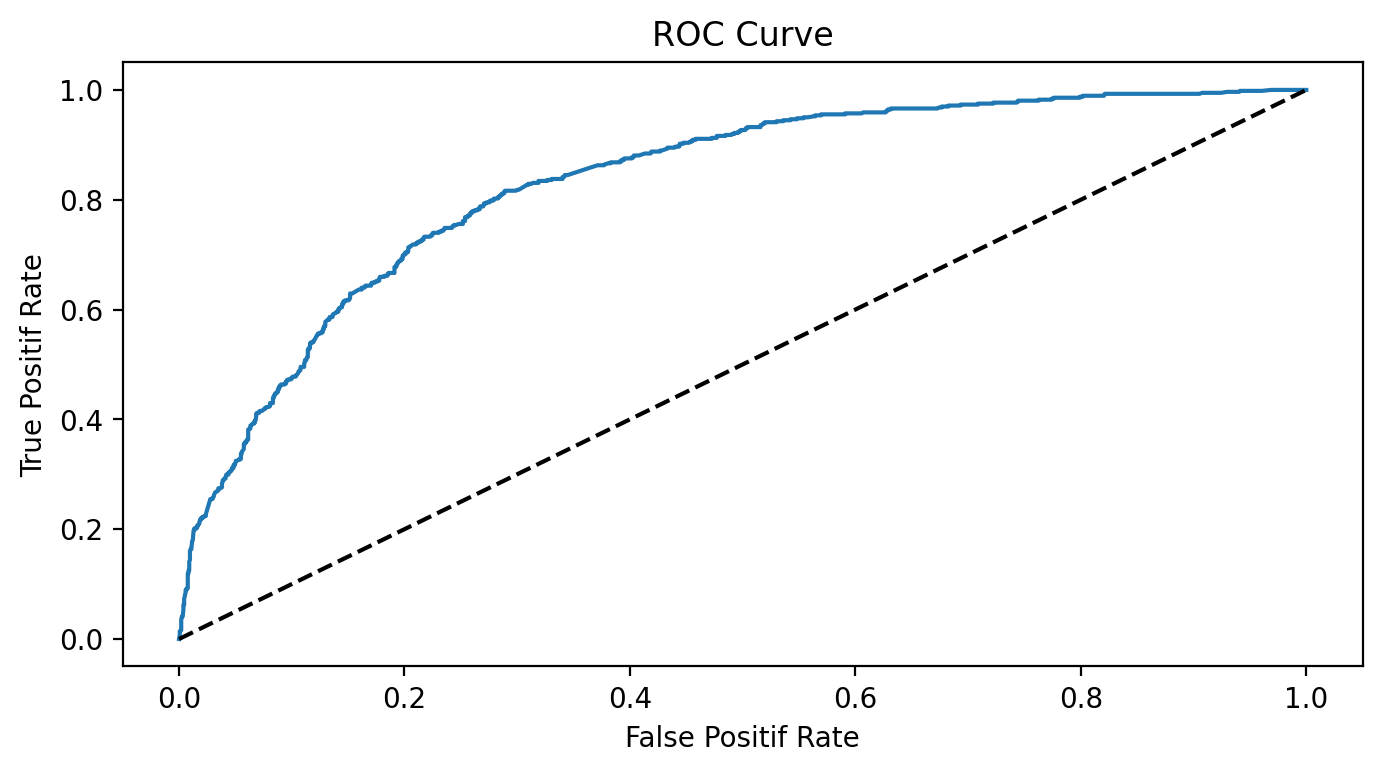

In [140]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(fpr,tpr) #ROC Curve
plt.plot(fpr,fpr,linestyle="--",color='k') #Benchmark (predicting by chance)
plt.xlabel("False Positif Rate")
plt.ylabel("True Positif Rate")
plt.title("ROC Curve");

In [141]:
#calculate area under ROC curve
AUROC = roc_auc_score(df_actual_predicted_proba["y_test_actual"],
                               df_actual_predicted_proba["y_hat_test_proba"])
AUROC

0.8313534463612313

# Gini and Kolmogorov-Smirnov

In [142]:
df_actual_predicted_proba = df_actual_predicted_proba.sort_values("y_hat_test_proba")
df_actual_predicted_proba.head()

y_test_actual  y_hat_test_proba  y_hat_test
5398              0          0.010541           0
5101              0          0.010541           0
611               0          0.012946           0
2794              0          0.012946           0
2519              0          0.012946           0

In [143]:
df_actual_predicted_proba.tail()

y_test_actual  y_hat_test_proba  y_hat_test
6359              1          0.873008           1
1405              1          0.873008           1
1971              1          0.873008           1
994               1          0.873008           1
3154              0          0.873008           1

In [144]:
df_actual_predicted_proba = df_actual_predicted_proba.reset_index(drop=True)
df_actual_predicted_proba.head()

y_test_actual  y_hat_test_proba  y_hat_test
0              0          0.010541           0
1              0          0.010541           0
2              0          0.012946           0
3              0          0.012946           0
4              0          0.012946           0

In [145]:
df_actual_predicted_proba["Cumulative N Population"] = df_actual_predicted_proba.index + 1
df_actual_predicted_proba["Cumulative N Churn Yes"] = df_actual_predicted_proba["y_test_actual"].cumsum()
df_actual_predicted_proba["Cumulative N Churn No"] = df_actual_predicted_proba["Cumulative N Population"] - df_actual_predicted_proba["Cumulative N Churn Yes"].cumsum()

In [146]:
df_actual_predicted_proba.head()

y_test_actual  y_hat_test_proba  y_hat_test  Cumulative N Population  \
0              0          0.010541           0                        1   
1              0          0.010541           0                        2   
2              0          0.012946           0                        3   
3              0          0.012946           0                        4   
4              0          0.012946           0                        5   

   Cumulative N Churn Yes  Cumulative N Churn No  
0                       0                      1  
1                       0                      2  
2                       0                      3  
3                       0                      4  
4                       0                      5

In [147]:
df_actual_predicted_proba["Cumulative Perc Population"] = df_actual_predicted_proba["Cumulative N Population"]/(df_actual_predicted_proba.shape[0])
df_actual_predicted_proba["Cumulative Perc Churn Yes"] = df_actual_predicted_proba["Cumulative N Churn Yes"]/df_actual_predicted_proba["y_test_actual"].sum()
df_actual_predicted_proba["Cumulative Perc Churn No"] = df_actual_predicted_proba["Cumulative N Churn No"]/(df_actual_predicted_proba.shape[0] - df_actual_predicted_proba["Cumulative N Churn Yes"].sum())

In [148]:
df_actual_predicted_proba

y_test_actual  y_hat_test_proba  y_hat_test  Cumulative N Population  \
0                 0          0.010541           0                        1   
1                 0          0.010541           0                        2   
2                 0          0.012946           0                        3   
3                 0          0.012946           0                        4   
4                 0          0.012946           0                        5   
...             ...               ...         ...                      ...   
2105              1          0.873008           1                     2106   
2106              1          0.873008           1                     2107   
2107              1          0.873008           1                     2108   
2108              1          0.873008           1                     2109   
2109              0          0.873008           1                     2110   

      Cumulative N Churn Yes  Cumulative N Churn No  \
0                          0                      1   
1                          0                      2   
2                          0                      3   
3                          0                      4   
4                          0                      5   
...                      ...                    ...   
2105                     558                -299867   
2106                     559                -300425   
2107                     560                -300984   
2108                     561                -301544   
2109                     561                -302104   

      Cumulative Perc Population  Cumulative Perc Churn Yes  \
0                       0.000474                   0.000000   
1                       0.000948                   0.000000   
2                       0.001422                   0.000000   
3                       0.001896                   0.000000   
4                       0.002370                   0.000000   
...                          ...                        ...   
2105                    0.998104                   0.994652   
2106                    0.998578                   0.996435   
2107                    0.999052                   0.998217   
2108                    0.999526                   1.000000   
2109                    1.000000                   1.000000   

      Cumulative Perc Churn No  
0                    -0.000003  
1                    -0.000007  
2                    -0.000010  
3                    -0.000013  
4                    -0.000017  
...                        ...  
2105                  0.992595  
2106                  0.994442  
2107                  0.996293  
2108                  0.998146  
2109                  1.000000  

[2110 rows x 9 columns]

Text(0.5, 1.0, 'Gini')

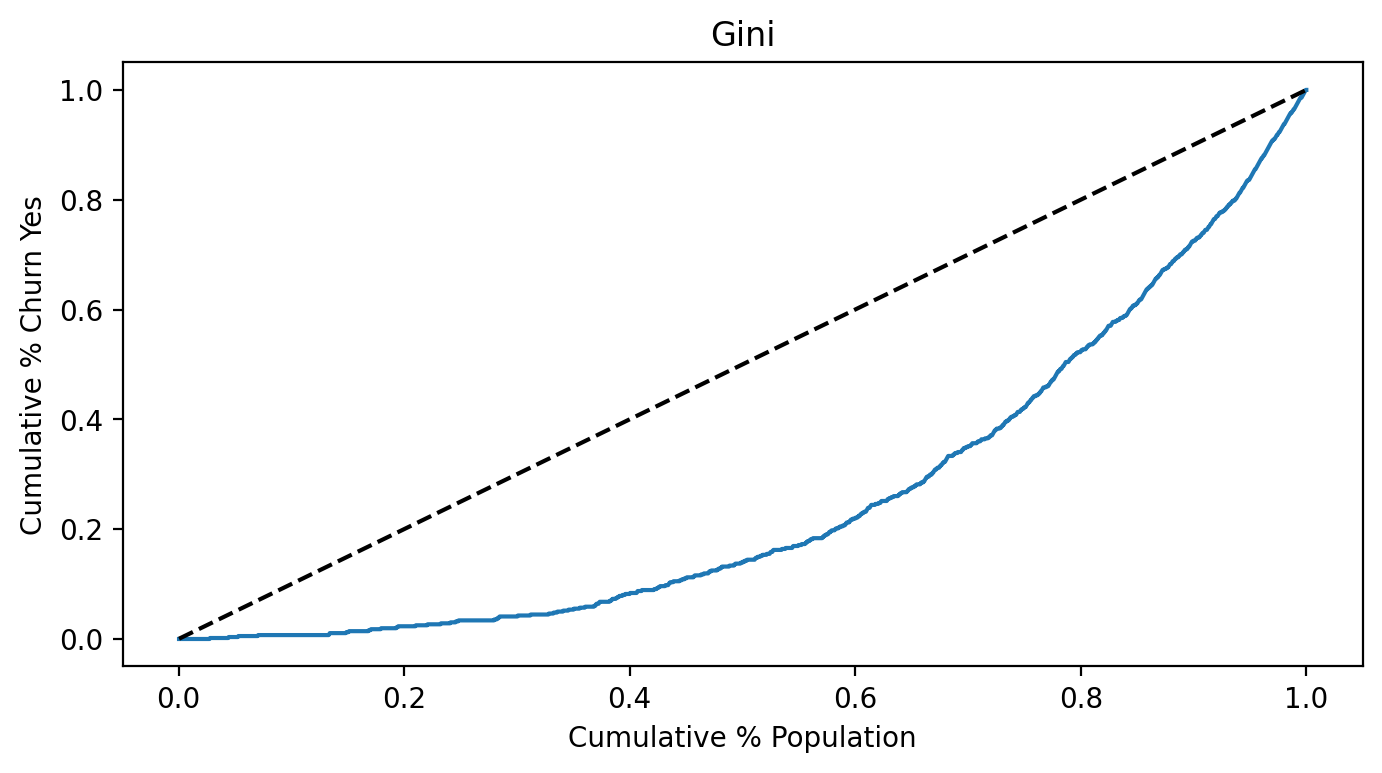

In [149]:
#plot gini coef
plt.figure(figsize=(8,4),dpi=200)
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"],df_actual_predicted_proba["Cumulative Perc Churn Yes"])
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"],df_actual_predicted_proba["Cumulative Perc Population"],
        linestyle='--',color='k')
plt.xlabel("Cumulative % Population")
plt.ylabel("Cumulative % Churn Yes")
plt.title("Gini")

In [150]:
gini = AUROC*2 - 1
gini

0.6627068927224626

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

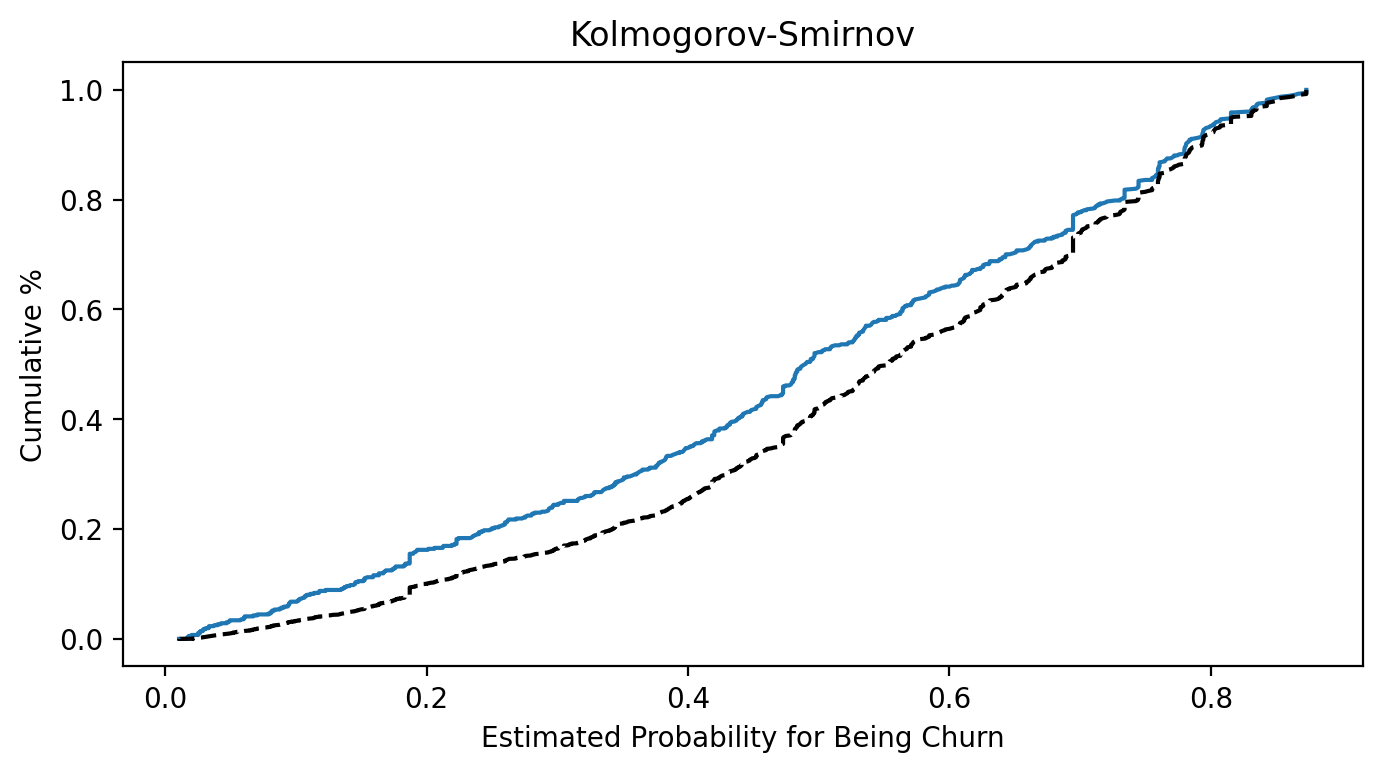

In [151]:
#plot kolmogorov-smirnov
plt.figure(figsize=(8,4),dpi=200)
plt.plot(df_actual_predicted_proba["y_hat_test_proba"],df_actual_predicted_proba["Cumulative Perc Churn Yes"])
plt.plot(df_actual_predicted_proba["y_hat_test_proba"],df_actual_predicted_proba["Cumulative Perc Churn No"],
        linestyle='--',color='k')
plt.xlabel("Estimated Probability for Being Churn")
plt.ylabel("Cumulative %")
plt.title("Kolmogorov-Smirnov")

In [152]:
KS = max(df_actual_predicted_proba["Cumulative Perc Churn Yes"] - df_actual_predicted_proba["Cumulative Perc Churn No"])
KS

0.1054314888574926

In [153]:
df

gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0     Female              0     Yes         No       1             0   
1       Male              0      No         No      34             1   
2       Male              0      No         No       2             1   
3       Male              0      No         No      45             0   
4     Female              0      No         No       2             1   
...      ...            ...     ...        ...     ...           ...   
7027    Male              0     Yes        Yes      24             1   
7028  Female              0     Yes        Yes      72             1   
7029  Female              0     Yes        Yes      11             0   
7030    Male              1     Yes         No       4             1   
7031    Male              0      No         No      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7027              1             DSL               1             0   
7028              1     Fiber optic               0             1   
7029              0             DSL               1             0   
7030              1     Fiber optic               0             0   
7031              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7027                 1            1            1                1   
7028                 1            0            1                1   
7029                 0            0            0                0   
7030                 0            0            0                0   
7031                 1            1            1                1   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn   Tenure Group     Monthly_bin  \
0              29.85         29.85      0    0-12 Months   (28.3, 38.35]   
1              56.95       1889.50      0   24-48 Months   (48.4, 58.45]   
2              53.85        108.15      1    0-12 Months   (48.4, 58.45]   
3              42.30       1840.75      0   24-48 Months   (38.35, 48.4]   
4              70.70        151.65      1    0-12 Months   (68.5, 78.55]   
...              ...           ...    ...            ...             ...   
7027           84.80       1990.50      0   12-24 Months   (78.55, 88.6]   
7028          103.20       7362.90      0  Over 48 Month  

In [154]:
df1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\Personal Project\Churn Prediction\Telco-Customer-Churn.csv")

In [155]:
df1

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7027          Yes               Yes             DSL            Yes   
7028          Yes               Yes     Fiber optic             No   
7029           No  No phone service             DSL            Yes   
7030          Yes               Yes     Fiber optic             No   
7031          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7027           No              Yes         Yes         Yes             Yes   
7028          Yes              Yes          No         Yes             Yes   
7029           No               No          No          No              No   
7030           No               No          No          No              No   
7031           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7027           84.80       1990.50    No  
7028          103.20       7362.90    No  
7029           29.60        346.45    No  
7030           74.40        306.60   Yes  
7031          105.65       6844.50    No  

[7032 rows x 21 columns]

In [156]:
df1 = df1.drop(["customerID","gender","PhoneService"],axis=1)

df1["MultipleLines"] = df1["MultipleLines"].replace("No phone service","No")
df1["OnlineSecurity"] = df1["OnlineSecurity"].replace("No internet service","No")
df1["OnlineBackup"] = df1["OnlineBackup"].replace("No internet service","No")
df1["DeviceProtection"] = df1["DeviceProtection"].replace("No internet service","No")
df1["TechSupport"] = df1["TechSupport"].replace("No internet service","No")
df1["StreamingTV"] = df1["StreamingTV"].replace("No internet service","No")
df1["StreamingMovies"] =df1["StreamingMovies"].replace("No internet service","No")

In [157]:
df1

SeniorCitizen Partner Dependents  tenure MultipleLines InternetService  \
0                 0     Yes         No       1            No             DSL   
1                 0      No         No      34            No             DSL   
2                 0      No         No       2            No             DSL   
3                 0      No         No      45            No             DSL   
4                 0      No         No       2            No     Fiber optic   
...             ...     ...        ...     ...           ...             ...   
7027              0     Yes        Yes      24           Yes             DSL   
7028              0     Yes        Yes      72           Yes     Fiber optic   
7029              0     Yes        Yes      11            No             DSL   
7030              1     Yes         No       4           Yes     Fiber optic   
7031              0      No         No      66            No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7027            Yes           No              Yes         Yes         Yes   
7028             No          Yes              Yes          No         Yes   
7029            Yes           No               No          No          No   
7030             No           No               No          No          No   
7031            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
0                 No  Month-to-month              Yes   
1                 No        One year               No   
2                 No  Month-to-month              Yes   
3                 No        One year               No   
4                 No  Month-to-month              Yes   
...              ...             ...              ...   
7027             Yes        One year              Yes   
7028             Yes        One year              Yes   
7029              No  Month-to-month              Yes   
7030              No  Month-to-month              Yes   
7031             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Electronic check           29.85         29.85    No  
1                  Mailed check           56.95       1889.50    No  
2                  Mailed check           53.85        108.15   Yes  
3     Bank transfer (automatic)           42.30       1840.75    No  
4              Electronic check           70.70        151.65   Yes  
...                         ...             ...           ...   ...  
7027               Mailed check           84.80       1990.50    No  
7028    Credit card (automatic)          103.20       7362.90    No  
7029           Electronic check           29.60        346.45    No  
7030               Mailed check           74.40        306.60   Yes  
7031  Bank transfer (automatic)          105.65       6844.50    No  

[7032 rows x 18 columns]

In [158]:
df1["Partner"] = df1["Partner"].apply(lambda x:1 if x=="Yes" else 0)
df1["Dependents"] = df1["Dependents"].apply(lambda x:1 if x=="Yes" else 0)
df1["PaperlessBilling"] = df1["PaperlessBilling"].apply(lambda x:1 if x=="Yes" else 0)
df1["InternetService"] =df1["InternetService"].apply(lambda x:2 if x=="Fiber optic" else (1 if x=="DSL" else 0))
df1["Contract"] = df1["Contract"].apply(lambda x:2 if x=="Month-to-month" else (1 if x=="One year" else 0))
df1["PaymentMethod"] = df1["PaymentMethod"].apply(lambda x:1 if x=="Electronic check" else 0)
df1["MultipleLines"] = df1["MultipleLines"].apply(lambda x:1 if x=="Yes" else 0)
df1["OnlineSecurity"] = df1["OnlineSecurity"].apply(lambda x:1 if x=="Yes" else 0)
df1["OnlineBackup"] = df1["OnlineBackup"].apply(lambda x :1 if x=="Yes" else 0)
df1["DeviceProtection"] = df1["DeviceProtection"].apply(lambda x:1 if x=="Yes" else 0)
df1["TechSupport"] = df1["TechSupport"].apply(lambda x:1 if x=="Yes" else 0)
df1["StreamingTV"] = df1["StreamingTV"].apply(lambda x:1 if x=="Yes" else 0)
df1["StreamingMovies"] = df1["StreamingMovies"].apply(lambda x:1 if x=="Yes" else 0)
df1["Churn"] =df1["Churn"].apply(lambda x:1 if x == "Yes" else 0)

In [159]:
#remove Total charge because have multicolinearity with Tenure
df1 = df1.drop("TotalCharges",axis=1)
df1

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              0   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              0   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7027              0        1           1      24              1   
7028              0        1           1      72              1   
7029              0        1           1      11              0   
7030              1        1           0       4              1   
7031              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   1               0             1                 0   
1                   1               1             0                 1   
2                   1               1             1                 0   
3                   1               1             0                 1   
4                   2               0             0                 0   
...               ...             ...           ...               ...   
7027                1               1             0                 1   
7028                2               0             1                 1   
7029                1               1             0                 0   
7030                2               0             0                 0   
7031                2               1             0                 1   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         2                 1   
1               0            0                0         1                 0   
2               0            0                0         2                 1   
3               1            0                0         1                 0   
4               0            0                0         2                 1   
...           ...          ...              ...       ...               ...   
7027            1            1                1         1                 1   
7028            0            1                1         1                 1   
7029            0            0                0         2                 1   
7030            0            0                0         2                 1   
7031            1            1                1         0                 1   

      PaymentMethod  MonthlyCharges  Churn  
0                 1           29.85      0  
1                 0           56.95      0  
2                 0           53.85      1  
3                 0           42.30      0  
4                 1           70.70      1  
...             ...             ...    ...  
7027              0           84.80      0  
7028              0          103.20      0  
7029              1           29.60      0  
7030              0           74.40      1  
7031              0          105.65      0  

[7032 rows x 17 columns]

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [161]:
X = df1.drop(["Churn","OnlineBackup","DeviceProtection"],axis=1)
y = df1["Churn"]

In [162]:
X["tenure"] = (X["tenure"] - X["tenure"].min())/(X["tenure"].max()-X["tenure"].min())
X["MonthlyCharges"] = (X["MonthlyCharges"] -X["MonthlyCharges"].min())/(X["MonthlyCharges"].max()-X["MonthlyCharges"].min())
X

SeniorCitizen  Partner  Dependents    tenure  MultipleLines  \
0                 0        1           0  0.000000              0   
1                 0        0           0  0.464789              0   
2                 0        0           0  0.014085              0   
3                 0        0           0  0.619718              0   
4                 0        0           0  0.014085              0   
...             ...      ...         ...       ...            ...   
7027              0        1           1  0.323944              1   
7028              0        1           1  1.000000              1   
7029              0        1           1  0.140845              0   
7030              1        1           0  0.042254              1   
7031              0        0           0  0.915493              0   

      InternetService  OnlineSecurity  TechSupport  StreamingTV  \
0                   1               0            0            0   
1                   1               1            0            0   
2                   1               1            0            0   
3                   1               1            1            0   
4                   2               0            0            0   
...               ...             ...          ...          ...   
7027                1               1            1            1   
7028                2               0            0            1   
7029                1               1            0            0   
7030                2               0            0            0   
7031                2               1            1            1   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0                   0         2                 1              1   
1                   0         1                 0              0   
2                   0         2                 1              0   
3                   0         1                 0              0   
4                   0         2                 1              1   
...               ...       ...               ...            ...   
7027                1         1                 1              0   
7028                1         1                 1              0   
7029                0         2                 1              1   
7030                0         2                 1              0   
7031                1         0                 1              0   

      MonthlyCharges  
0           0.115423  
1           0.385075  
2           0.354229  
3           0.239303  
4           0.521891  
...              ...  
7027        0.662189  
7028        0.845274  
7029        0.112935  
7030        0.558706  
7031        0.869652  

[7032 rows x 14 columns]

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [164]:
reg = LogisticRegression_with_p_value(multi_class="auto", solver="liblinear")

In [165]:
reg.fit(X_train,y_train)

In [166]:
feature_name=X_train.columns.values
feature_name

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype=object)

In [167]:
summary_table = pd.DataFrame(columns=["feature_name"],data=feature_name)
summary_table["Coefficients"] = np.transpose(reg.coef_)
summary_table.index =summary_table.index+1
summary_table.loc[0] = ["Intercept",reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

feature_name  Coefficients
0          Intercept     -2.862570
1      SeniorCitizen      0.228056
2            Partner      0.123797
3         Dependents     -0.280235
4             tenure     -2.385665
5      MultipleLines      0.274683
6    InternetService      1.149029
7     OnlineSecurity     -0.334131
8        TechSupport     -0.291874
9        StreamingTV      0.399743
10   StreamingMovies      0.408273
11          Contract      0.704860
12  PaperlessBilling      0.199773
13     PaymentMethod      0.289799
14    MonthlyCharges     -1.096955

In [168]:
p_values = reg.p_values

p_values = np.append(np.nan,np.array(p_values))

In [169]:
summary_table['p_values'] = p_values

summary_table

feature_name  Coefficients      p_values
0          Intercept     -2.862570           NaN
1      SeniorCitizen      0.228056  2.429879e-02
2            Partner      0.123797  1.829557e-01
3         Dependents     -0.280235  8.946856e-03
4             tenure     -2.385665  2.237765e-43
5      MultipleLines      0.274683  8.015255e-03
6    InternetService      1.149029  8.880057e-10
7     OnlineSecurity     -0.334131  1.125891e-03
8        TechSupport     -0.291874  4.874238e-03
9        StreamingTV      0.399743  3.559838e-04
10   StreamingMovies      0.408273  2.234070e-04
11          Contract      0.704860  1.545171e-44
12  PaperlessBilling      0.199773  2.189162e-02
13     PaymentMethod      0.289799  4.573726e-04
14    MonthlyCharges     -1.096955  7.966778e-02

In [170]:
# Making predictions on the train set
y_train_pred = reg.model.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3614
           1       0.66      0.55      0.60      1308

    accuracy                           0.81      4922
   macro avg       0.75      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922



In [171]:
X_test = X_test[X_train.columns]

In [172]:
X_test

SeniorCitizen  Partner  Dependents    tenure  MultipleLines  \
2476              1        1           0  0.845070              1   
6773              0        0           0  0.253521              1   
6116              0        1           0  0.169014              1   
3047              0        1           0  0.507042              1   
4092              0        0           0  0.070423              0   
...             ...      ...         ...       ...            ...   
2758              0        1           1  0.887324              0   
6737              0        1           0  0.718310              0   
1695              0        0           0  0.647887              0   
1095              0        1           1  0.056338              1   
4712              1        0           0  0.887324              1   

      InternetService  OnlineSecurity  TechSupport  StreamingTV  \
2476                0               0            0            0   
6773                0               0            0            0   
6116                2               0            0            1   
3047                1               1            0            0   
4092                1               1            0            0   
...               ...             ...          ...          ...   
2758                2               1            0            0   
6737                1               1            0            0   
1695                0               0            0            0   
1095                1               0            1            0   
4712                2               0            1            1   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
2476                0         0                 0              0   
6773                0         2                 0              0   
6116                1         2                 1              0   
3047                0         2                 1              0   
4092                0         2                 0              0   
...               ...       ...               ...            ...   
2758                0         2                 0              1   
6737                0         1                 0              0   
1695                0         0                 0              0   
1095                0         2                 1              0   
4712                1         1                 0              1   

      MonthlyCharges  
2476        0.067164  
6773        0.064179  
6116        0.835821  
3047        0.366169  
4092        0.111443  
...              ...  
2758        0.624876  
6737        0.171144  
1695        0.021891  
1095        0.372637  
4712        0.834328  

[2110 rows x 14 columns]

In [173]:
y_hat_test = reg.model.predict(X_test)

In [174]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



In [175]:
#calculation probability
y_hat_test_proba = reg.model.predict_proba(X_test)
y_hat_test_proba

array([[0.98694915, 0.01305085],
       [0.86452394, 0.13547606],
       [0.28263903, 0.71736097],
       ...,
       [0.98825165, 0.01174835],
       [0.69441594, 0.30558406],
       [0.82963629, 0.17036371]])

In [176]:
y_hat_test_proba = y_hat_test_proba[:][:,1]
y_hat_test_proba

array([0.01305085, 0.13547606, 0.71736097, ..., 0.01174835, 0.30558406,
       0.17036371])

In [177]:
y_test_actual = y_test.copy()
y_test_actual = y_test_actual.reset_index(drop=True)
df_actual_predicted_proba = pd.concat([y_test_actual,pd.DataFrame(y_hat_test_proba)],axis=1)
df_actual_predicted_proba.columns = ["y_test_actual","y_hat_test_proba"]
df_actual_predicted_proba.index = y_test.index
df_actual_predicted_proba

y_test_actual  y_hat_test_proba
2476              0          0.013051
6773              0          0.135476
6116              1          0.717361
3047              0          0.160974
4092              0          0.283289
...             ...               ...
2758              0          0.103597
6737              0          0.042274
1695              0          0.011748
1095              0          0.305584
4712              0          0.170364

[2110 rows x 2 columns]

In [185]:
tr = 0.40

df_actual_predicted_proba["y_hat_test"] = np.where(df_actual_predicted_proba["y_hat_test_proba"] > tr,1,0)

In [186]:
pd.crosstab(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"],rownames=["Actual"],colnames=["Predict"])

Predict     0    1
Actual            
0        1294  255
1         195  366

In [187]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_proba["y_test_actual"],
                               df_actual_predicted_proba["y_hat_test_proba"])

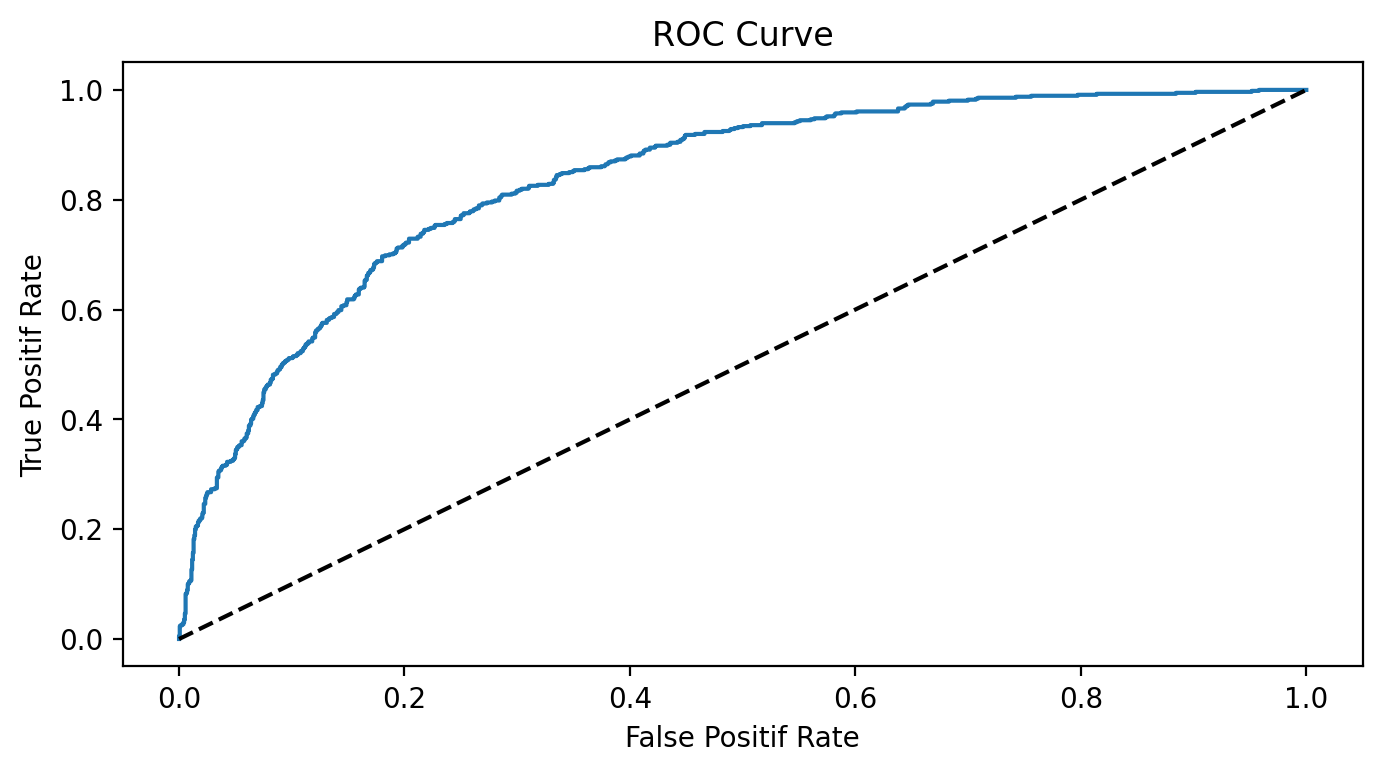

In [188]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(fpr,tpr) #ROC Curve
plt.plot(fpr,fpr,linestyle="--",color='k') #Benchmark (predicting by chance)
plt.xlabel("False Positif Rate")
plt.ylabel("True Positif Rate")
plt.title("ROC Curve");

In [189]:
#calculate area under ROC curve
AUROC = roc_auc_score(df_actual_predicted_proba["y_test_actual"],
                               df_actual_predicted_proba["y_hat_test_proba"])
AUROC

0.8368414329755612

In [ ]:
df_actual_predicted_proba = df_actual_predicted_proba.sort_values("y_hat_test_proba")
df_actual_predicted_proba.head()

In [ ]:
df_actual_predicted_proba = df_actual_predicted_proba.reset_index(drop=True)
df_actual_predicted_proba.head()

In [ ]:
df_actual_predicted_proba["Cumulative N Population"] = df_actual_predicted_proba.index + 1
df_actual_predicted_proba["Cumulative N Churn Yes"] = df_actual_predicted_proba["y_test_actual"].cumsum()
df_actual_predicted_proba["Cumulative N Churn No"] = df_actual_predicted_proba["Cumulative N Population"] - df_actual_predicted_proba["Cumulative N Churn Yes"].cumsum()

In [ ]:
df_actual_predicted_proba["Cumulative Perc Population"] = df_actual_predicted_proba["Cumulative N Population"]/(df_actual_predicted_proba.shape[0])
df_actual_predicted_proba["Cumulative Perc Churn Yes"] = df_actual_predicted_proba["Cumulative N Churn Yes"]/df_actual_predicted_proba["y_test_actual"].sum()
df_actual_predicted_proba["Cumulative Perc Churn No"] = df_actual_predicted_proba["Cumulative N Churn No"]/(df_actual_predicted_proba.shape[0] - df_actual_predicted_proba["Cumulative N Churn Yes"].sum())

In [ ]:
#plot gini coef
plt.figure(figsize=(8,4),dpi=200)
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"],df_actual_predicted_proba["Cumulative Perc Churn Yes"])
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"],df_actual_predicted_proba["Cumulative Perc Population"],
        linestyle='--',color='k')
plt.xlabel("Cumulative % Population")
plt.ylabel("Cumulative % Churn Yes")
plt.title("Gini")

In [ ]:
gini = AUROC*2 - 1
gini

In [ ]:
#plot kolmogorov-smirnov
plt.figure(figsize=(8,4),dpi=200)
plt.plot(df_actual_predicted_proba["y_hat_test_proba"],df_actual_predicted_proba["Cumulative Perc Churn Yes"])
plt.plot(df_actual_predicted_proba["y_hat_test_proba"],df_actual_predicted_proba["Cumulative Perc Churn No"],
        linestyle='--',color='k')
plt.xlabel("Estimated Probability for Being Churn")
plt.ylabel("Cumulative %")
plt.title("Kolmogorov-Smirnov")

# Implementing Recursive Feature Elimination and Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV


model =LogisticRegression()
rfecv = RFECV(model,step=1,min_features_to_select=10,n_jobs=-1)
rfecv.fit(X_train,y_train)

In [ ]:
rfecv.support_

In [ ]:
rfecv.ranking_

In [ ]:
selected_feature = np.where(rfecv.support_)[0]
X_train = X_train.iloc[:,selected_feature]
X_test = X_test.iloc[:,selected_feature]

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"penalty": ["l2"],
             'C' : [1.0,2.0,3.0],
             'max_iter':[100,200,300,500],
             'solver' : ['newton-cg','lbfgs','sag','saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model,param_grid)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_test,y_test)

In [ ]:
y_hat_test = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat_test))

# Over Sampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_resample,y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [ ]:
pd.Series(y_resample).value_counts()

In [ ]:
#train test split again
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3,random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
param_grid = {"penalty": ["l1","l2","elasticnet"],
             'C' : [1.0,2.0,3.0],
             'max_iter':[100,200,300,500],
             'solver' : ['newton-cg','lbfgs','sag','saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model,param_grid)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_test,y_test)

In [ ]:
y_hat_test = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat_test))

In [ ]:
#calculation probability
y_hat_test_proba = grid_search.predict_proba(X_test)
y_hat_test_proba

In [ ]:
y_hat_test_proba = y_hat_test_proba[:][:,1]


In [ ]:
y_hat_test_proba = pd.DataFrame(y_hat_test_proba)
y_hat_test_proba.columns = ["y_hat_test_proba"]
y_hat_test_proba

In [ ]:
y_test_actual = y_test.copy()
df_actual_predicted_proba = y_test
df_actual_predicted_proba =pd.DataFrame(df_actual_predicted_proba)
df_actual_predicted_proba.columns = ["y_test_actual"]
df_actual_predicted_proba = pd.concat([df_actual_predicted_proba,y_hat_test_proba],axis=1)
df_actual_predicted_proba

In [ ]:
tr = 0.45

df_actual_predicted_proba["y_hat_test"] = np.where(df_actual_predicted_proba["y_hat_test_proba"] > tr,1,0)
pd.crosstab(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"],rownames=["Actual"],colnames=["Predict"])

In [ ]:
print(classification_report(df_actual_predicted_proba["y_test_actual"],df_actual_predicted_proba["y_hat_test"]))